In [1]:
import pandas as pd
df = pd.read_excel('result_.xlsx')
df = df.dropna()
df

,C1,B2,B1,A2,C2,A1,T(K),Time (s),S1,S2
0,0.242219,2.470929,1.832329,14509.601990,0.044194,40766.670243,85.104240,0,17483.402299,1135.418715
1,0.241965,2.470952,1.832378,14486.294089,0.044161,40765.317953,85.104240,4,17464.649682,1132.762399
2,0.242217,2.470942,1.832334,14496.217101,0.044291,40794.652516,85.104240,8,17495.252298,1136.836732
3,0.242280,2.470983,1.832385,14463.009040,0.044350,40678.371378,85.104240,12,17449.797492,1135.726527
4,0.242048,2.470996,1.832345,14506.833678,0.044172,40731.071106,85.104240,15,17455.873084,1134.641048
...,...,...,...,...,...,...,...,...,...,...
1647,0.241379,2.440709,1.790132,11114.191445,0.045244,24926.327872,270.296102,8479,10659.424862,885.629894
1648,0.241126,2.440620,1.790082,11103.743798,0.045114,24894.259970,270.399369,8491,10634.609690,882.332762
1649,0.241124,2.440697,1.790125,11080.880038,0.045130,24869.270418,270.476820,8497,10623.841038,880.843765
1650,0.241050,2.440639,1.790119,11096.126366,0.045074,24848.426161,270.528453,8503,10611.720005,880.986730


In [2]:
df_ = pd.read_excel('Extra.xlsx')
df_

,temp,B1,B2,S1
0,85.10424,1.840289,2.473104,18688.01
1,85.10424,1.853860,2.475371,18705.20
2,85.10424,1.834188,2.473104,18669.21
3,85.13006,1.841514,2.473104,18666.26
4,85.13006,1.841514,2.470841,18648.62
...,...,...,...,...
161,268.10000,1.785719,2.439611,11805.32
162,268.71240,1.796127,2.439611,11763.07
163,269.29930,1.796127,2.437411,11711.47
164,269.91170,1.794965,2.437411,11675.82


In [14]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from deap import base, creator, tools, algorithms

# Load your DataFrame
# Assuming df contains 'T(K)' and 'B2' columns

# Define the objective function
def equation(T, E_0, a, theta):
    return E_0 - 2 * a / (np.exp(theta / T) - 1)

def objective_function(params):
    E_0, a, theta = params
    y_pred = equation(df['T(K)'], E_0, a, theta)
    return r2_score(df['B2'], y_pred),

# Define the genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -10, 10)  # Adjust the range as needed
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", objective_function)

# Define genetic algorithm parameters
population_size = 1000
crossover_probability = 0.5
mutation_probability = 0.2
number_of_generations = 100

# Create initial population
population = toolbox.population(n=population_size)

# Run the genetic algorithm
for generation in range(number_of_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual

# Evaluate the best individual
best_score = objective_function(best_params)[0]

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)


C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Best Parameters: [2.4960139191034028, -0.0022446549295265664, -22.43361936912587]
Best R^2 Score: 0.9122200792027192


In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from deap import base, creator, tools, algorithms

# Load your DataFrame
# Assuming df contains 'T(K)' and 'B2' columns

# Define the objective function
def equation(T, E_0, a, theta):
    return E_0 - 2 * a * (np.exp(theta / T) - 1)**(-1)

def objective_function(params):
    E_0, a, theta = params
    y_pred = equation(df_['temp'], E_0, a, theta)
    return r2_score(df_['B1'], y_pred),

# Define the logging function
def log_generation_results(gen, population):
    best_ind = tools.selBest(population, k=1)[0]
    best_params = best_ind
    best_score = objective_function(best_params)[0]
    print(f"Generation {gen}: Best Parameters - {best_params}, Best R^2 Score - {best_score}")

# Define genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -10, 400)  # Adjust the range as needed
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", objective_function)

population_size = 150
crossover_probability = 0.5
mutation_probability = 0.2
number_of_generations = 100

# Create initial population
population = toolbox.population(n=population_size)

# Run the genetic algorithm
for generation in range(number_of_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    log_generation_results(generation, population)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual

# Evaluate the best individual
best_score = objective_function(best_params)[0]

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)


Generation 0: Best Parameters - [47.374421706357, 181.55058700596368, 424.04643109667234], Best R^2 Score - -2515879.289964215
Generation 1: Best Parameters - [47.374421706357, 181.55058700596368, 424.04643109667234], Best R^2 Score - -2515879.289964215
Generation 2: Best Parameters - [-25.7070321640306, 4.941671931018837, 362.2883559053803], Best R^2 Score - -2040830.8003495561
Generation 3: Best Parameters - [12.009548921320324, 8.512816630322462, 387.46682434159845], Best R^2 Score - -154856.33921556218
Generation 4: Best Parameters - [18.24367314579965, 36.2532539369871, 273.6984508426643], Best R^2 Score - -453985.9610641995
Generation 5: Best Parameters - [2.776391123523527, 28.47170330026584, 381.2563104225502], Best R^2 Score - -215252.7784894965
Generation 6: Best Parameters - [7.230813462530259, 5.863557738422364, 359.07385640357654], Best R^2 Score - -33956.86420230647
Generation 7: Best Parameters - [7.230813462530259, 5.863557738422364, 359.07385640357654], Best R^2 Score 

Generation 64: Best Parameters - [1.8373059638646965, 0.10761907156557113, 419.72295988298936], Best R^2 Score - 0.8722095898931627
Generation 65: Best Parameters - [1.8373059638646965, 0.10761907156557113, 419.72295988298936], Best R^2 Score - 0.8722095898931627
Generation 66: Best Parameters - [1.8373318688087776, 0.10759586514979541, 419.69583125342854], Best R^2 Score - 0.8722174987879873
Generation 67: Best Parameters - [1.8373358010328114, 0.10758162283833782, 419.6588287704145], Best R^2 Score - 0.8722226571250223
Generation 68: Best Parameters - [1.8373279102738107, 0.10757329233935886, 419.6773173720479], Best R^2 Score - 0.8722245886646992
Generation 69: Best Parameters - [1.83731179130682, 0.10756213427321767, 419.7016673372143], Best R^2 Score - 0.8722270889907995
Generation 70: Best Parameters - [1.83731179130682, 0.10756213427321767, 419.7016673372143], Best R^2 Score - 0.8722270889907995
Generation 71: Best Parameters - [1.8373142593758174, 0.10755478410654593, 419.72620

In [8]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from deap import base, creator, tools, algorithms

# Load your DataFrame
# Assuming df contains 'T(K)' and 'B2' columns
# For example, df_ = pd.read_csv('your_data.csv')

# Define the objective function
def equation(T, E_0, a, theta):
    return E_0 - 2 * a * (np.exp(theta / T) - 1)**(-1)

def objective_function(params):
    E_0, a, theta = params
    y_pred = equation(df_['temp'], E_0, a, theta)
    return r2_score(df_['B2'], y_pred),

# Define the logging function
def log_generation_results(gen, population, history_df):
    best_ind = tools.selBest(population, k=1)[0]
    best_params = best_ind
    best_score = objective_function(best_params)[0]
    print(f"Generation {gen}: Best Parameters - {best_params}, Best R^2 Score - {best_score}")
    history_df.loc[gen] = list(best_params) + [best_score]

# Define genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -10, 400)  # Adjust the range as needed
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", objective_function)

population_size = 150
crossover_probability = 0.5
mutation_probability = 0.2
number_of_generations = 100

# Create initial population
population = toolbox.population(n=population_size)

# DataFrame to store results
history_df = pd.DataFrame(columns=['E_0', 'a', 'theta', 'R^2'])

# Run the genetic algorithm
for generation in range(number_of_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    log_generation_results(generation, population, history_df)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual

# Evaluate the best individual
best_score = objective_function(best_params)[0]

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

# Save the entire history DataFrame to a CSV file (optional)
history_df.to_csv('parameters_history_Fan_B2.csv', index_label='Generation')

# Display the DataFrame
print(history_df)

C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generation 0: Best Parameters - [-8.480174522094494, 33.36272490715924, 332.56837763931696], Best R^2 Score - -4271827.153822388
Generation 1: Best Parameters - [-8.480174522094494, 33.36272490715924, 332.56837763931696], Best R^2 Score - -4271827.153822388
Generation 2: Best Parameters - [31.679273950045292, 35.82761103914206, 240.0325621385289], Best R^2 Score - -1719105.9775073153
Generation 3: Best Parameters - [4.924195256315073, 9.603178182965166, 240.17045580814255], Best R^2 Score - -240332.61069892033
Generation 4: Best Parameters - [4.924195256315073, 9.603178182965166, 240.17045580814255], Best R^2 Score - -240332.61069892033
Generation 5: Best Parameters - [10.518214201164474, 8.288457388315207, 248.88171349037097], Best R^2 Score - -121049.65029332273
Generation 6: Best Parameters - [1.449370422052739, 1.6337192511438268, 475.99583571287695], Best R^2 Score - -11316.118351928235
Generation 7: Best Parameters - [2.754205070575035, 4.3937525395896335, 593.2023820085511], Bes

Generation 63: Best Parameters - [2.473382817724705, 0.09762349507252452, 501.70161817541964], Best R^2 Score - 0.9770629528039763
Generation 64: Best Parameters - [2.4733863866966628, 0.0976166231159977, 501.7261767693417], Best R^2 Score - 0.9770643179928237
Generation 65: Best Parameters - [2.4733863866966628, 0.0976166231159977, 501.7261767693417], Best R^2 Score - 0.9770643179928237
Generation 66: Best Parameters - [2.4733863866966628, 0.0976166231159977, 501.7261767693417], Best R^2 Score - 0.9770643179928237
Generation 67: Best Parameters - [2.473387869861677, 0.0976139754172172, 501.7118521252204], Best R^2 Score - 0.9770648845835822
Generation 68: Best Parameters - [2.473386586002647, 0.09761375926558807, 501.7120583536619], Best R^2 Score - 0.9770649416078154
Generation 69: Best Parameters - [2.4733866241497586, 0.09761267789820507, 501.7209314246078], Best R^2 Score - 0.9770650803373644
Generation 70: Best Parameters - [2.4733867171926587, 0.09760966177560537, 501.7061977335

In [47]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from deap import base, creator, tools, algorithms

# Load your DataFrame
# Assuming df contains 'T(K)' and 'B2' columns

# Define the objective function
def equation2(T, E_0, a1, a2):
    return E_0 - a1*T**2/(a2+T)

def objective_function(params):
    E_0, a1, a2 = params
    y_pred = equation2(df['T(K)'], E_0, a1, a2)
    return r2_score(df['B1'], y_pred),

# Define the logging function
def log_generation_results(gen, population):
    best_ind = tools.selBest(population, k=1)[0]
    best_params = best_ind
    best_score = objective_function(best_params)[0]
    print(f"Generation {gen}: Best Parameters - {best_params}, Best R^2 Score - {best_score}")

# Define genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -10, 20)  # Adjust the range as needed
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", objective_function)

population_size = 150
crossover_probability = 0.5
mutation_probability = 0.2
number_of_generations = 100

# Create initial population
population = toolbox.population(n=population_size)

# Run the genetic algorithm
for generation in range(number_of_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    log_generation_results(generation, population)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual

# Evaluate the best individual
best_score = objective_function(best_params)[0]

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)


C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generation 0: Best Parameters - [13.233018054527985, 0.13343546233342884, 16.513418546971426], Best R^2 Score - -557398.2656821111
Generation 1: Best Parameters - [0.9304154449713256, -0.05867152457745112, 20.29482709577389], Best R^2 Score - -274475.3218889775
Generation 2: Best Parameters - [7.93763874413888, -0.00785688495441035, -3.1648809571567345], Best R^2 Score - -187766.13886935255
Generation 3: Best Parameters - [9.583445771949147, 0.048590269762855215, 13.7342677769789], Best R^2 Score - -30592.803153553632
Generation 4: Best Parameters - [9.061899272693545, 0.032849238201445155, 12.291323738734954], Best R^2 Score - -25497.649584361363
Generation 5: Best Parameters - [4.287605789593071, 0.018315182265425743, 16.295410852437975], Best R^2 Score - -4927.188320239183
Generation 6: Best Parameters - [2.569392141092173, 0.00558050076087481, 10.228934822025842], Best R^2 Score - -455.6374455841701
Generation 7: Best Parameters - [2.244858024256937, 0.003793924932749994, 3.8287510

Generation 62: Best Parameters - [1.8536290329658054, 0.00026897966519767085, 0.2855205502484373], Best R^2 Score - 0.9597024715469715
Generation 63: Best Parameters - [1.8536289999495335, 0.0002690026755286666, 0.2866194674412884], Best R^2 Score - 0.9597024988552136
Generation 64: Best Parameters - [1.8536289999495335, 0.0002690026755286666, 0.2866194674412884], Best R^2 Score - 0.9597024988552136
Generation 65: Best Parameters - [1.8536290792670638, 0.00026901156239076004, 0.29381161383153587], Best R^2 Score - 0.9597025041293931
Generation 66: Best Parameters - [1.8536290792670638, 0.00026901156239076004, 0.29381161383153587], Best R^2 Score - 0.9597025041293931
Generation 67: Best Parameters - [1.8536290711797492, 0.0002690224961893425, 0.30534909597830145], Best R^2 Score - 0.959702504834417
Generation 68: Best Parameters - [1.8536290711797492, 0.0002690224961893425, 0.30534909597830145], Best R^2 Score - 0.959702504834417
Generation 69: Best Parameters - [1.8536299782175218, 0.0

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from deap import base, creator, tools, algorithms

# Load your DataFrame
# Assuming df contains 'T(K)' and 'B2' columns
# For example, df = pd.read_csv('your_data.csv')

# Define the objective function
def equation2(T, E_0, a1, a2):
    return E_0 - a1 * T**2 / (a2 + T)

def objective_function(params):
    E_0, a1, a2 = params
    y_pred = equation2(df['T(K)'], E_0, a1, a2)
    return r2_score(df['B1'], y_pred),

# Define the logging function
def log_generation_results(gen, population, results_df):
    best_ind = tools.selBest(population, k=1)[0]
    best_params = best_ind
    best_score = objective_function(best_params)[0]
    print(f"Generation {gen}: Best Parameters - {best_params}, Best R^2 Score - {best_score}")
    results_df.loc[gen] = list(best_params) + [best_score]

# Define genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -10, 20)  # Adjust the range as needed
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", objective_function)

population_size = 150
crossover_probability = 0.5
mutation_probability = 0.2
number_of_generations = 100

# Create initial population
population = toolbox.population(n=population_size)

# DataFrame to store results
results_df = pd.DataFrame(columns=['E_0', 'a1', 'a2', 'R^2'])

# Run the genetic algorithm
for generation in range(number_of_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    log_generation_results(generation, population, results_df)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual

# Evaluate the best individual
best_score = objective_function(best_params)[0]

# Print best parameters and R^2 score
print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

# Save to a CSV file (optional)
results_df.to_csv('parameters_over_generations_Varshni_B1.csv', index=False)

# Display the DataFrame
print(results_df)


C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Generation 0: Best Parameters - [16.347159629180016, -0.023231001664013817, 1.9442757019053865], Best R^2 Score - -1142563.412942829
Generation 1: Best Parameters - [1.0856954826267269, 0.020784119722182637, 7.401087875162911], Best R^2 Score - -64067.257553733216
Generation 2: Best Parameters - [1.0856954826267269, 0.020784119722182637, 7.401087875162911], Best R^2 Score - -64067.257553733216
Generation 3: Best Parameters - [-1.46826724045704, -0.03358743986465375, -4.778808604112126], Best R^2 Score - -40512.325841746635
Generation 4: Best Parameters - [8.361172725255802, 0.02738342022600758, -4.620523877973459], Best R^2 Score - -18451.92612808732
Generation 5: Best Parameters - [4.888596367757961, 0.014376602771176292, 0.7518274744414755], Best R^2 Score - -3724.935534628032
Generation 6: Best Parameters - [4.888596367757961, 0.014376602771176292, 0.7518274744414755], Best R^2 Score - -3724.935534628032
Generation 7: Best Parameters - [2.2777169215736564, 0.002450638187644543, 2.53

Generation 63: Best Parameters - [1.853740217568338, 0.0002690693411717077, -0.07405028164475874], Best R^2 Score - 0.9597027349921923
Generation 64: Best Parameters - [1.8537415689722776, 0.00026906782689643664, -0.08253793230496143], Best R^2 Score - 0.9597027329749415
Generation 65: Best Parameters - [1.8537413474683724, 0.00026906589381652305, -0.08341297838586653], Best R^2 Score - 0.9597027332948228
Generation 66: Best Parameters - [1.85374129719174, 0.00026906407629450236, -0.08405151671633104], Best R^2 Score - 0.9597027339274935
Generation 67: Best Parameters - [1.8537409592080374, 0.00026906877640057964, -0.07903192531972308], Best R^2 Score - 0.9597027340787724
Generation 68: Best Parameters - [1.853741048774674, 0.0002690635706682759, -0.08186520689125176], Best R^2 Score - 0.9597027350444409
Generation 69: Best Parameters - [1.853741048774674, 0.0002690635706682759, -0.08186520689125176], Best R^2 Score - 0.9597027350444409
Generation 70: Best Parameters - [1.8537406532214

In [ ]:
import matplotlib.pyplot as plt

temp = np.arange(0,270, 1)
# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual

# Calculate predicted values using the best parameters
E_0, a, theta = [1.8537191226101633, 0.0002690501205018012, -0.009938792474521757]

predict= equation(temp, E_0, a, theta)

predict2= equation2(temp, E_0, a1, a2)


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df_['temp'], df_['B1'], label='Actual')
#plt.plot(df_['temp'], predicted_values, color='red', label='Predicted')
plt.plot(temp, predict, color='green', label='Fen')
plt.plot(temp, predict2, color='red', label='Varshni')
plt.xlabel('Temperature (K)')
plt.ylabel('B2')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ivan\AppData\Local\Temp\ipykernel_11292\2015113049.py:12: RuntimeWarning: divide by zero encountered in divide
  return E_0 - 2 * a * (np.exp(theta / T) - 1)**(-1)


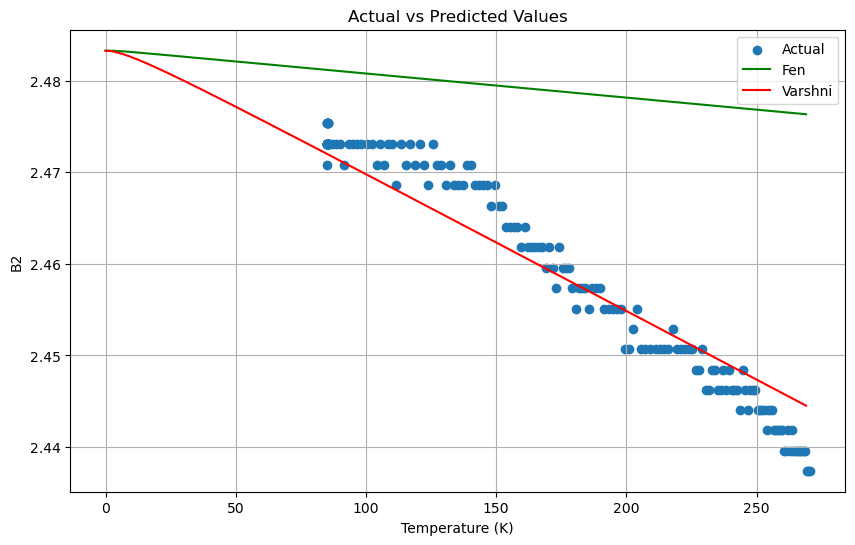

In [35]:
import matplotlib.pyplot as plt

temp = np.arange(0,270, 1)
# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual

# Calculate predicted values using the best parameters
E_0, a, theta = best_params
predicted_values = equation(df_['temp'], E_0, a, theta)

E_0, a1, a2 = [2.483277179179585, 0.00015020318274801443, 11.404708949055259]

predict= equation(temp, E_0, a, theta)

predict2= equation2(temp, E_0, a1, a2)


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df_['temp'], df_['B2'], label='Actual')
#plt.plot(df_['temp'], predicted_values, color='red', label='Predicted')
plt.plot(temp, predict, color='green', label='Fen')
plt.plot(temp, predict2, color='red', label='Varshni')
plt.xlabel('Temperature (K)')
plt.ylabel('B2')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ivan\AppData\Local\Temp\ipykernel_11292\2015113049.py:12: RuntimeWarning: divide by zero encountered in divide
  return E_0 - 2 * a * (np.exp(theta / T) - 1)**(-1)


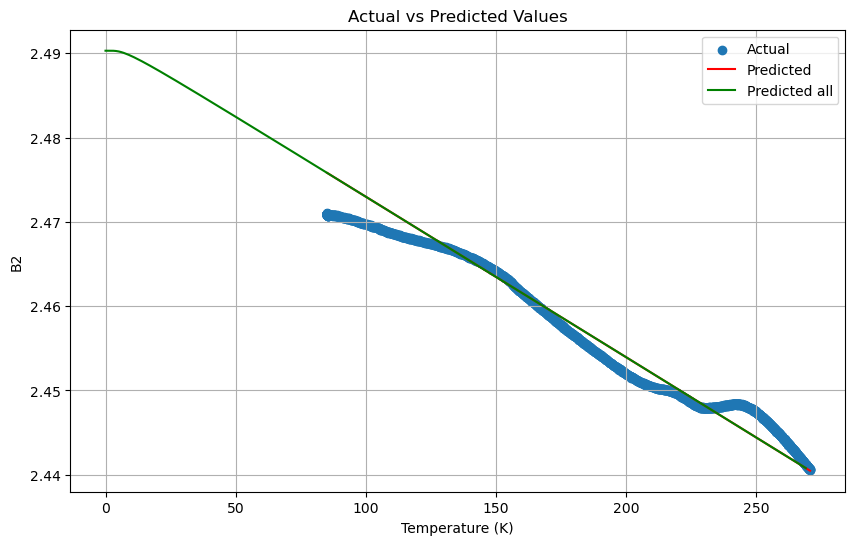

In [26]:
import matplotlib.pyplot as plt

temp = np.arange(0,270, 1)
# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual

# Calculate predicted values using the best parameters
E_0, a, theta = best_params
predicted_values = equation(df['T(K)'], E_0, a, theta)

predict= equation(temp, E_0, a, theta)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df['T(K)'], df['B2'], label='Actual')
plt.plot(df['T(K)'], predicted_values, color='red', label='Predicted')
plt.plot(temp, predict, color='green', label='Predicted all')

plt.xlabel('Temperature (K)')
plt.ylabel('B2')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
df['T(K)']

0        85.104240
1        85.104240
2        85.104240
3        85.104240
4        85.104240
           ...    
1647    270.296102
1648    270.399369
1649    270.476820
1650    270.528453
1651    270.605904
Name: T(K), Length: 1642, dtype: float64

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from deap import base, creator, tools, algorithms

# Load your DataFrame
# Assuming df contains 'T(K)' and 'B2' columns
df_ = pd.read_excel('Integral_Intensity_all_Temp.xlsx')

# Define the objective function
k_b = 8,617e-5
E_LO = 25e-3
I_0 = max(df_['S'])

#def equation(T, I_0, A, B, E_a, E_LO, m):
#    return I_0/(1+A*np.exp(-E_a/(k_b*T))+B*(np.exp(E_LO/(k_b*T)-1)**(-m)))

#def equation(T, A, B, E_a, m):
#    return 18688/(1+A*np.exp(-E_a/(8.617e-5*T))+B*(np.exp(290/T)-1)**(-m))

#def equation(T, A, B, E_a, m):
#    return 18385/(1+A*np.exp(-11605*E_a/T)+B*(np.exp(290/T)-1)**(-m))

#def equation(T, A, B, E_a, m):
#    return 18385/(1+A*np.exp(-11605*E_a*T)+B*(np.exp(290*T)-1)**(-m))

def equation(T, I_0, dE, A, B, E_a, m):
    return (18385+I_0*np.exp(-dE*8,617e-5*T))/(1+A*np.exp(-11605*E_a*T)+B*(np.exp(290*T)-1)**(-m))


#def equation(T1, A, B, E_a, m):
#    return 18688/(1+A*np.exp(-E_a*T1/(8.617e-5))+B*(np.exp(290/T)-1)**(-m))

#E_a = 12e-3
#m = 3.4

def objective_function(params):
    print(params)
    I_0, dE, A, B, E_a, m = params
    y_pred = equation(1/df_['Temp'], I_0, dE, A, B, E_a, m)
    return r2_score(df_['S'], y_pred),


# Define the logging function
def log_generation_results(gen, population, history_df):
    best_ind = tools.selBest(population, k=1)[0]
    best_params = best_ind
    best_score = objective_function(best_params)
    print(f"Generation {gen}: Best Parameters - {best_params}, Best R^2 Score - {best_score[0]}")
    history_df.loc[gen] = best_params + [best_score[0]]



# Define genetic algorithm parameters
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform)  # Adjust the range as needed
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=6)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", objective_function)

population_size = 150
crossover_probability = 0.5
mutation_probability = 0.2
number_of_generations = 100

# Create initial population
population = toolbox.population(n=population_size)

# DataFrame to store results
history_df = pd.DataFrame(columns=['I_0', 'dE', 'A', 'B', 'E_a', 'm', 'R2'])

# Run the genetic algorithm
for generation in range(number_of_generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
    log_generation_results(generation, population, history_df)

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_params = best_individual

# Evaluate the best individual
best_score = objective_function(best_params)[0]

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)

# Save the entire history DataFrame to a CSV file (optional)
history_df.to_csv('parameters_history_I+.csv', index_label='Generation')


C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\ivan\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


[0.56258526042618, 0.6070063391612304, 0.09939554189322831, 0.13045768555531148, 0.161603361218617, 0.19764938439392984]
[0.7828551188440973, 0.4008799000151618, 0.43729932200949195, 0.1265500701219766, 0.3188203981040561, 0.810699362995847]
[0.2867351634378068, 0.7080730408561254, 0.1542355508467283, 0.2660126760344255, 0.7780876181439144, 0.46962113697576513]
[0.40948858019818646, 0.6704928727386075, 0.6761312922361361, 0.9463266931113229, 0.1583134769672579, 0.501496098915438]
[0.5663786872558728, 0.11484699869149824, 0.7079728987855272, 1.0391046761733673, 0.543971315115617, 0.06924114341572374]
[0.6188479693358708, 0.078414139005523, 0.8616764348739478, 0.5424901632546044, 0.31054043087925953, 0.6368364292255025]
[0.36651726412496544, 0.06821878874188082, 0.2098861960804469, 0.4192532455165588, 0.47329243264688464, 0.9767602584137827]
[0.17997109000177933, 0.9356172568660179, 0.317539274915024, 0.3670715003387301, 0.4077012460582861, 0.9681721212837058]
[0.36640265187898124, 0.158

[-0.3155300227086191, 0.516835966861952, 0.37149814825035554, 0.93473842293421, 1.0085914801111302, -0.4120249096529744]
[0.9624706543254704, 0.7014839043506566, 0.7507030930427704, 0.7966532054195018, 0.27963168646279113, 0.9144329669386925]
[0.32454266090875816, 0.16666250978250297, 0.7394204707786668, 0.2717319782540879, 0.047126541647828035, 0.08844503656323999]
[0.2664424182312819, 0.4539680033454133, 0.9565570551904953, -1.038716689706689, 0.634237683459222, 0.1982001526759114]
[0.30562084710538495, 0.8663946088839818, 0.7583795162729032, 0.7514774780455288, 0.3744661771016885, 0.8542681852894847]
[0.8754131581113115, 0.6796043173841587, 0.4798446157965077, 0.41731707452205546, 0.6180707795191104, 0.49195873814044333]
[0.29383349317253227, 0.681542428829595, 0.6531154959118357, 0.3304356099626281, 0.27906246053290473, 0.9293052483947081]
[0.07074233728479933, 0.46017667570401577, 0.1597377734511476, 0.22584770082754874, 0.4889429571999882, 0.5158472012352291]
[0.03545534347230457

[-0.439518906371255, 1.117198783730225, -0.30564373129626743, 0.11200818969649051, -0.0010133987391898192, 0.4063350714517402]
[0.33047742280294085, 0.20374577085670253, 0.6450171584599192, 0.7976104898061521, 0.6146538599334344, 0.5865980017198322]
[0.8751663897723966, 0.24106851493103726, 0.46171404786744136, 0.7351474331149144, 0.7538374508923198, 0.4606794270216823]
[0.8234776599393852, 0.2560617292341486, 0.39951996223467834, 0.12318199476100311, 0.48725250323493363, 0.2733169369288433]
[0.5928240955419649, 1.0472374770311328, 0.49058887576800936, 1.0842388407280337, 0.9038540565863635, -0.24080584158161966]
[0.647544277109452, 0.07225306519765606, 0.8878258412086627, 0.44159218329389766, 0.773567874873966, 0.5156088744347654]
[0.8754131581113115, 0.6796043173841587, 0.4798446157965077, 0.41731707452205546, 0.6180707795191104, 0.49195873814044333]
[0.9258860790159799, 0.41668155781938754, 1.5780070820718293, 0.5127327265768077, 0.0908503928709844, 0.9438657448378991]
[0.2125345575

[0.1338260394033669, 0.6755354662802666, 0.6331808109873245, 0.2900722252890113, 0.4646153149422162, 0.02780011004396861]
[2.0783472701889147, 0.896073158536462, 0.8221440331894194, 0.10564325720344525, 0.20620203530032544, 0.41237035924148246]
[0.7906074154585103, 0.07203262436829636, 0.2577712673955241, 0.8078761944820921, 0.39547886745395433, 0.7499957018894945]
[0.752664411298423, 1.364940188358152, 0.05886186349340618, 0.5935414195569195, 0.5295151833888985, 0.8180567355491718]
[0.9550400191242543, 0.22656270309216875, 0.1649282823185544, 0.879987006662414, 0.4590682679155562, 0.9736162219173369]
[0.8243249088253963, 0.8510214492419371, 0.4133970336728301, 0.7766397453682384, 0.1955877268130799, 0.7333612335316906]
[0.8569165129798313, 0.5899233061166929, 0.6237950805281316, 0.5227306985533471, 0.19608925452812853, 0.594134229850194]
[0.695339168299514, 0.19931751815911783, 0.83077496427009, 0.39897768422457874, 1.1074782291957685, 0.1837692166550194]
[0.30562084710538495, 0.86639

[0.7906074154585103, 0.07203262436829636, 0.2577712673955241, 0.8078761944820921, 0.39547886745395433, 0.7499957018894945]
[0.5458969648277928, 0.4222720370898587, 0.4633363887415044, 0.11491186362462724, 0.5810511350043492, 0.6435245106024248]
[0.8243249088253963, 0.8510214492419371, 0.4133970336728301, 0.7766397453682384, 0.1955877268130799, 0.7333612335316906]
[0.7620689359970838, 3.0600968217607467, 0.30882125415181294, 0.7434692131109253, 0.29039873815696265, 0.6434602690949196]
[0.7828432017389672, 0.9711588590785045, 0.11388770441073692, 0.8869300650872955, 0.36409382501840293, 0.6532414784576139]
[0.3235349343809264, 0.10637804087359681, 0.56730017143884, 0.6382602125583419, 0.8459666459869429, 0.2821373373023657]
[0.7279573848685855, 0.09429421306363683, 0.7214275206336269, 0.694571496174514, 0.1376769469145763, 0.6906791598335329]
[0.9899372799909437, 0.7903758961668143, 1.0512471656206146, 0.2805990758262824, 0.3918475325866948, 0.10038892035714668]
[0.8919841138087631, -0.3

[0.7906074154585103, 0.07203262436829636, 0.2577712673955241, 0.8078761944820921, 0.8932340138659441, 0.7499957018894945]
[0.7906074154585103, 0.07203262436829636, 0.2577712673955241, 0.8078761944820921, 0.34121737956117587, 0.7499957018894945]
[0.4832369134279633, 0.13479022854591, 0.5767457270141247, 0.5832944597418094, 1.4795855832265676, 0.611408917214401]
[0.2709086165463729, 1.124453044583147, 0.0959215519388171, 0.7810093325238756, 0.8850219651691591, 0.6544893540576745]
[0.27463211043136054, 0.5998203735720065, 0.5400788728849236, 0.7345455328458775, 0.7242934012671808, 0.7497392577830004]
[0.2682530690090181, 0.26128725775330197, 0.07750796408097257, 0.7492173004884816, 0.2113148797542101, 0.7503526874641364]
[0.7450180172139408, 0.9178382137641095, 0.4771781609729133, 0.3855853291525596, 0.24696294372220162, 0.6199081528453048]
[0.9508994437767803, 1.046074782129411, 0.416624825794897, 0.7393576790947471, 0.6957509084163265, 0.7783512682353756]
[0.4832369134279633, 0.13479022

[0.30562084710538495, 0.8663946088839818, 0.7583795162729032, 0.7514774780455287, 0.3744661771016885, 0.8542681852894847]
[0.9312846312655978, 0.07203262436829636, 0.2577712673955241, 0.8078761944820921, 0.39547886745395433, 0.7499957018894945]
[0.8569165129798313, 0.5899233061166929, 0.6237950805281316, 0.5227306985533471, 0.19608925452812853, 0.594134229850194]
[0.2655361551348411, 1.1643753806834127, 0.550311733436902, 0.8781788482717946, 0.15938926819488197, 0.9035164781572387]
[0.5690940875565902, -0.4879876634648368, 0.43990714710628775, 0.6820527266568861, 0.3228209481065071, 0.7417025738240298]
[-0.030571570061115737, 0.745940562700547, 0.418325036209537, 0.7433477576528285, 0.44095098286634826, 0.7528198271934088]
[0.7828432017389672, 0.9711588590785045, 0.11388770441073692, 0.8869300650872955, 0.36409382501840293, 0.6532414784576139]
[0.3601377832965955, 1.995015139370707, 0.08664089340520298, 0.9226764038492561, 0.05485429567514699, 0.8536026237093631]
[0.2872660606218638, 0

[-0.3840657241897609, 0.5572795754416013, 0.7839238686413128, 0.42793515599477366, 0.5738001015658446, 0.9462854738969532]
[3.3704248690945717, 0.6073457648740597, 0.14684223279055258, 1.1581171855470394, 0.2960241847377014, 0.5972010895789737]
[0.8676704550089651, 0.8738302590498401, 0.5849213964530331, 0.8062193556067623, 0.22039761657182289, 0.6715572171057683]
[0.826675083203757, 0.8571613529868916, 0.36343971529774133, 0.8439206063450957, 0.21098161870406099, 0.9761820554227905]
[0.5770856647456895, 0.2939357625213231, 0.271706324264951, 0.7677711908093958, 0.8869099809153753, 0.8650188827113299]
[0.7179272733388071, 0.046474857924599954, 0.2657686450242987, 0.8200625222365265, 0.9492229145034353, 0.7320050330950222]
[1.0337680748295275, 0.2000490686597193, -0.5795620601160423, 0.8252076309366574, 0.36244870707054594, 0.9830102956895004]
[0.2900683605057066, 0.22702175192872648, 0.3098062860328909, 0.826947947031792, 0.4468963344122679, 0.718989279608717]
[0.6305878768236266, 0.29

[0.2655361551348411, 0.6694423464905596, 0.550311733436902, 0.8781788482717946, 0.15938926819488197, 2.3925893467929495]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.4485761779255404, 0.2736965320972792, 1.2592217014655587, 0.8745833747096399, 0.4410866118316889, 0.8316789608452352]
[0.6067765115985143, 1.0481342296185772, 0.7899137131577265, 0.7514528626258463, 0.26075872429313035, 1.054814607674743]
[1.0434718239751248, 0.8383229265653199, 0.6505855394118756, 0.8922697364710203, 0.5241845171392685, 0.9378709939729294]
[1.608208412989329, 0.5565108493026489, 0.3526504510321529, 0.9461745232206623, 0.5179699029786486, 0.8613954266630053]
[0.5340690361156855, 0.7819497043454169, 1.4243897817494968, 0.9526644837956312, 0.14588273917093716, 0.9193286365911222]
[0.21283936163898765, 0.7798268993018365, 0.7037776076630181, 0.9058054891455557, 0.15911444439126765, 0.9169587459760542]
[0.2655361551348411, 0.6694

[0.9294628613279727, 0.3515677686471773, 0.5812966571782986, 0.8810769067429267, 0.41349764983348763, 0.990271982182686]
[0.8955977871836074, 0.754965097239786, 0.11859570321820012, 0.872410316503107, 0.2813621265448725, 0.8977222787315191]
[0.2827837668058456, 0.8381149346851646, 0.41846210718669236, 0.81692989394067, 0.7468476826237994, 0.9242096959690805]
[-0.05994170978331878, 0.4722661402985369, 0.4709401532812427, 0.6119553231875098, 0.0330831983167475, 0.7887264123220175]
[0.9506528922214404, 0.6392447991492326, 0.5432505931738186, 0.8738165606077066, 0.2198145438395808, 0.9078587276921104]
[2.1142994480527086, 0.5780396328025378, -0.2620643044868981, 0.9410681785181092, 0.661745646129201, 0.8698810174828693]
[0.7209315848844777, 0.6686263578515858, 0.19242787084769886, 0.9394064936784273, 0.7477730559423879, 0.8861941467661032]
[2.883977192802815, 0.6243218412120664, 0.09397856869078478, 0.9315210401296945, 0.1250493237882091, 0.8872942531956269]
[0.28520524047668266, 0.4645155

[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.37532435881662957, 1.1221238813528815, 0.7222331751368448, 0.8955123609396836, 0.2183063543654486, 0.9050189963755617]
[0.006575771879684611, 0.46528061183528635, 0.873223436996573, 0.9420256866812325, 0.11273172276223087, 0.7702186882898654]
[0.5695639239917603, 0.8414763851581375, 0.5760926148188344, -0.1967307566710509, 0.06831513819165626, 3.4883040341399756]
[1.2054949679430815, 0.6760488694389231, 0.5436196969933117, 0.8710796692612628, 0.19430856756287723, 0.9053619876357357]
[0.9344114851227092, 0.6347851661957885, 0.5452651386767593, 0.8826832347819369, 0.20716749551890679, 0.9069702950991634]
[0.9342883287618517, -0.017120041361727067, 0.8544365681793898, 0.8804165887924764, 0.5527020014445474, 0.9761523597904678]
[1.0642235143375274, 1.0820056710192156, -0.03892274644895985, 0.8918401543409579, 0.4305507836102773, 0.9353348560997985]
[0.2435392380906

[0.11567447844824101, 0.6579584661453394, 0.5383556100769487, 0.9084140133310158, 0.48982946824599366, 0.8999941621655672]
[0.26004292780705357, 2.0955332961833446, 0.5825763156292153, 0.9449015901532698, 0.3052335213004057, 0.904921218840466]
[0.043326692769786214, 0.5883074872444849, 0.4115557443645687, 0.5155823690736476, 0.1827725378333769, 0.8454216264982963]
[0.12884789030261382, 0.7595939434878771, 0.5056959030906529, 0.872680683450541, 0.021495206545956935, 0.7996622164896058]
[1.1226895991193893, 0.29023663600768923, 0.3999618631403914, 0.8429141273028355, 0.23684245288429673, 0.883191124148296]
[0.2534958200494232, 0.7269843887615034, 0.26799880270307386, 0.8816105387865181, 0.2727206413531004, 1.0055471794824924]
[2.883977192802815, 0.6243218412120664, 0.09397856869078478, 0.9315210401296945, 0.1250493237882091, 0.8872942531956269]
[0.3513795783377518, -0.07588978088908878, 0.8836572577712316, 0.8735776204449177, 0.683456718196337, 0.8475058626085719]
[0.8700206293873258, 0.

[0.22630059161148075, -0.9309791399313663, 0.6153653421646549, 0.5709416886992157, 0.10689353486436158, 0.7911535765200203]
[0.9550400191242543, 0.22656270309216875, 0.1649282823185544, 0.879987006662414, 0.4590682679155562, 0.9736162219173369]
[0.7209315848844777, 0.6686263578515858, 0.19242787084769886, 0.9394064936784273, 0.7477730559423879, 0.8861941467661032]
[0.4278037172970339, 0.6709898744337588, 0.4605992647991293, 0.9300193424744534, 0.23847009661941465, 0.8882228424845678]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.5393572879562394, 0.9585158614361531, 0.41740021174739017, 0.8267642606202088, 0.6347883194203199, 0.8731351756406411]
[0.021734236204213275, 0.9682364202197491, 0.1177749737765067, 0.8719437762417486, 0.35208410226320186, 0.9183424508597154]
[0.41537014809381184, 0.46870467569774377, 0.5619615687081498, 1.0344392502065507, 0.04123830725069859, 0.7382563263936817]
[0.15947190362093

[0.2655361551348411, 0.6694423464905596, 0.550311733436902, 0.8781788482717946, 0.15938926819488197, 0.9035164781572387]
[1.128118083216429, 0.7504273560500013, -0.14542795734397093, 0.8954508744269825, 0.17356108640939644, 0.9055706904924445]
[-0.01968093439383406, 0.7843646404916211, 0.9678012682251891, 0.8827649312216803, 0.26691548452674374, 0.9091103342151288]
[0.2655361551348411, 0.6694423464905596, 0.550311733436902, 0.8781788482717946, 0.15938926819488197, 0.9035164781572387]
[-0.12595768366822074, 0.8769564117787215, 0.08528178881385903, 0.8177638607193461, 0.7637505512360672, 0.854171463475706]
[0.262958766563602, 0.41669999495426313, -0.6420263660704959, 0.5736264590745255, 0.11226096015402218, 0.7719326941372152]
[-0.008048745168854878, 0.8879341969955802, 0.6713715589228163, 0.927852661048453, 0.08201760602019545, 0.9542726904223844]
[0.8975652501382553, 0.5799045657275068, 0.5616390769497702, 0.8743180356713325, 0.3026702499948821, 0.9105345238515661]
[0.9324440221680613,

[0.2655361551348411, 0.6694423464905596, 0.550311733436902, 0.8781788482717946, 0.15938926819488197, 0.9035164781572387]
[0.02693548651193106, 0.6370979091543133, 0.5479280841144683, 0.8720490654440083, 0.19754229279225957, 0.9069016508065604]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835453]
[-0.001113522272696947, 0.6470159756746431, 0.5493955943985819, 0.8807843032446461, 0.16873125604081388, 0.9041735672815245]
[0.2655361551348411, 0.6694423464905596, 0.550311733436902, 0.8781788482717946, 0.15938926819488197, 0.9035164781572387]
[0.3712111291526896, 0.5256262137421128, 0.36216865707279366, 0.8411086282639001, 0.7862840178892283, 0.8831871177374441]
[0.4278037172970339, 0.6709898744337588, 0.4605992647991293, 0.9300193424744534, 0.23847009661941465, 0.8882228424845678]
[0.20441722025477235, 1.1435378105118406, 0.5364799981433697, 0.8287665662003755, 0.48109981268328456, 0.8884791358052363]
[0.3986462959763408

[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835453]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835453]
[0.20199777453921197, 0.9077836286056395, 0.4851528942301386, 0.871334206045136, 0.7133175161475339, 0.8434739095126759]
[-0.062419303072591636, 0.6386151296636415, 0.15044062802062247, 0.8246085029460047, 0.2253643050666096, 0.9142140321202687]
[0.20343205840177755, 0.4524340473390425, 0.6228280712979604, 0.8026572490147561, 0.05933195803353054, 0.8285270411462007]
[0.447691536368359, 0.8148327159215409, 0.621223382183755, 0.6723596827690956, 0.18783284833494318, 0.88730715837665]
[0.10857948318188076, 0.8033555764470407, 0.368147496226789, 0.6538573042858954, -0.30178574725213014, 0.8005798981476927]
[0.45586676805348714, 0.4479230010594019, 0.3621803348799375, 0.7972202044487989, 1.1376507317533961, 0.8604745974185771]
[0.25149472470412354

[0.5283303040958229, 0.7588419402994716, -0.1954214192895765, 0.9368190819464468, 0.19319611306542206, 0.7839021029496792]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[-0.001113522272696947, 0.6470159756746431, 0.5493955943985819, 0.8807843032446461, 0.16873125604081388, 0.9041735672815245]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.7583038523074769, 0.7039462021452125, 0.5135812106379736, 0.8196808166459679, 0.10416839147475279, 0.8943667755127023]
[0.32123343196738385, -1.2526657112796136, 0.11532027516919716, 0.8691627133346409, 0.8694327291073859, 0.8651666755987395]
[-0.47585302351109127, 0.6623153542413064, -0.3437188415988246, 0.5559644366992136, 0.11649821877045706, 0.8223023888295071]
[0.023426

[0.2702734982252089, 0.7083873843704158, 0.5749120543645679, 0.6857221290362627, 0.10728614968187762, 0.8554690404495993]
[0.24472340087144073, 0.03448128615694606, 0.6295969981274046, 0.7939367735416528, 0.08680647084110829, 0.8576639480108468]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.5697515848397372, 0.5778564757316388, 0.563801196979789, 0.7503140997892171, 0.3920573267634587, 0.9304199098240895]
[0.26553615513

[0.18461669489496513, 0.4365288682472928, 0.6216752697329886, 0.8343250875769841, 0.17649549246116467, 0.870560959680243]
[-0.5661266598955035, 0.26739476440021276, 0.558233461831318, 0.8377905342364633, 0.06970024657482561, 0.8906194664878424]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[-0.001113522272696947, 0.6470159756746431, 0.5493955943985819, 0.8807843032446461, 0.16873125604081388, 0.9041735672815245]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 1.454592461062159, 0.035164121782949975, 0.8092466385835452]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.048128083274594086, 0.5166017325224785, 0.6007619548252561, 0.8485524004639117, 0.2571689125805493, 0.8356793435039633]
[-1.0804090887928268, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.6644295200566184, 0.8092466385835453]
[0.016980912584

[0.07129219581457133, 0.5486228249765849, 2.22050262429985, 0.6222228385686441, 0.03482612885799164, 0.8291024104364201]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.009687769463146093, -0.29015103489004973, 0.6236050593946301, 0.595463584722775, 0.0346407745494023, 0.8092705087182193]
[-0.07994053749633129, 0.1040030407141706, 0.6540295754189742, 0.6034227523713849, 0.034592720997685754, 0.8096019973750243]
[0.23056995001074163, 0.6778183359957485, 0.6544699608771718, 0.6727341559533124, 0.08802967491942879, 0.9029020831400935]
[0.0138839492574752, 0.8780730086261017, 0.5380626470544333, 0.7571306271896947, 0.428039919512826, 0.7952536115762352]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.4175099569205884]
[0.040036679013

[0.03506528118492188, 0.5692550037926809, 0.6115665120636813, 0.5958861424797091, 0.03455054098103246, 0.8093608211792691]
[0.02707120436096943, -1.1610022951289618, 0.6163746521230414, 0.5957357564214485, 0.035018834447906655, 0.8092503880491482]
[0.009692592743025459, 1.0779202164552235, 0.6169054779747466, 0.5957520087156665, 0.034669719912338165, 0.8092602036991088]
[0.34794002135986923, -0.08387855275756703, 0.6541678616237344, 0.5941896888938043, 0.03469782663543871, 0.8095621396413228]
[0.34794002135986923, -0.08387855275756703, 0.6541678616237344, 0.5941896888938043, 0.03469782663543871, 0.8095621396413228]
[0.04003667901344445, 0.41235353411000963, 0.6560526097882354, 0.6010982169426315, 0.034969781748970266, 0.8096765589110924]
[0.042070659755759465, -0.2872997633135954, 0.6163860286311083, 0.5956736309774229, 0.035164121782949975, 0.8092466385835452]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 1.3830094562807698, 0.035164121782949975, 0.8092466385835451]
[0

[0.03755488201709986, -0.19394609067082802, 0.6054952150796756, 0.5955849891623808, 0.03432815667316132, 0.8094838432785362]
[0.035725423298577905, 0.5435319112477981, 0.6149515009668797, 0.6000241497182206, 0.03487978301336913, 0.8092734492864863]
[0.167963416129469, 0.6128567702591304, 0.6220778214876063, 0.5979648681121802, 0.035431819973601605, 0.8095817003336877]
[0.011858904911448212, -0.6652956150032185, 0.6164759038495852, 0.5957987754468098, 0.034485435979720605, 0.8092601317372358]
[0.04293986801638883, -0.24369357454541102, 0.6239798505096564, 0.5954129694899845, 0.0346890381763474, 0.809271505205689]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.042070659755759465, 0.524807292648007, 0.6163860286311083, 0.5956736309774228, 0.035164121782949975, 0.8092466385835452]
[0.04207

[0.5297314215227565, 1.5183854226898204, 0.6180005996811585, 0.5949816078096951, 0.034912758283243805, 0.8092342913577847]
[0.17113752295968737, 0.6934629183654797, 0.6214612857148255, 0.5940935993970103, 0.03486516380592554, 0.8093103678329228]
[0.3574179490007986, 0.5258436107174846, 0.6680387151560523, 0.5946812800918755, 0.03534556556036093, 0.8092698650433344]
[0.34794002135986923, -0.08387855275756703, 0.6541678616237344, 0.5941896888938043, 0.03469782663543871, 0.8095621396413228]
[0.04437682361812178, -0.8388429040604769, 0.5953784265625812, 0.595350067703844, 0.034634739441436094, 0.8092698181440249]
[0.05193277318536353, -0.07298347235359504, 0.6307352663806192, 0.595410698231824, 0.03468424597114573, 0.8092846566983879]
[0.2832053582935707, 0.45936254289954787, 0.6208592945102807, 0.6039464807350114, 0.0347749033260928, 0.8095532528258429]
[0.02395610263877521, 0.2631204424163498, 0.6268117610966666, 0.594261266824934, 0.034471215103037536, 0.8092683831776701]
[0.04293986801

[0.39442056464186126, 0.0411856565247333, 0.6237620765347458, 0.5970335751756831, 0.03452643108505029, 0.809476680139474]
[0.01912779011474759, 0.26852726608898847, 0.6171836274734731, 0.5994592884434324, 0.035161461542940725, 0.8096286109796913]
[-0.026887222885686766, 0.296135100691749, 0.6564168738087289, 0.5926712932593009, 0.034484363875901064, -0.14018237950708645]
[0.4544024757639087, -0.12791851310195246, 0.6410673786227306, 0.5946950364093683, 0.0347149548802696, 0.8092442973642217]
[0.013523136494395096, -0.2805992399776651, 0.6309070282460484, 0.59537137032795, 0.034669683163498874, 0.8092756831015413]
[0.34794002135986923, -0.08387855275756703, 0.6541678616237344, 0.5941896888938043, 0.03469782663543871, 0.8095621396413228]
[0.34794002135986923, -0.08387855275756703, 0.6541678616237344, 0.5941896888938043, 0.03469782663543871, 0.8095621396413228]
[0.008326045423997327, -0.8218193922397059, 0.6497240531758981, -0.08246480584499905, 0.0350925707849611, 0.8093098960609096]
[0.

[0.03736725115824674, 0.3615239472454581, 0.6418881949195189, 0.5954533084912272, 0.03444104380298739, 0.8092399045223706]
[0.03381341844345677, 0.08989443847515108, 0.6630493332534149, 0.5954202106852198, 0.035471494016815076, 0.8092908736716236]
[0.4294487854083188, 0.4624503991468502, 0.6123514554153022, 0.601004759176752, 0.035211248080074614, 0.8092830287466575]
[-0.09869792363679099, -0.19507624427514858, 0.6734185788337362, -0.013974812805918946, 0.034698072759512096, -0.12714667962091242]
[0.044983112822135844, 0.4397782315554156, 0.65657126201045, 0.5922834337501827, 0.035295765280406656, 0.8092578180520259]
[0.35880310318978303, 0.4219473547933908, 0.6565451334193748, 0.5960518105852292, 0.0353106267716449, 0.8092241789836823]
[0.047133699105677024, 0.12121670980742975, 0.6196070151454248, 0.595776170362785, 0.03444698207916326, 0.8092991911212891]
[0.10309961287771371, -0.29713851005859865, 0.6235955379654354, 0.6005051280272029, 0.03474895492758021, 0.8093427601454062]
[0.0

[0.3000522091443995, -0.34473431249572095, 0.697249227501594, 0.5935357580479119, 0.03519432783782068, 0.8094471737738604]
[0.00943261113364644, 0.44648250503966624, 0.6466232745835142, 0.5967342556357704, 0.03506686636842551, 0.8091864459200948]
[0.0037711057393427687, 0.28177379482273196, 0.6651184687148114, 0.5926865041993278, 0.9445038768315129, 0.8093008085529724]
[-0.08440260903983016, 0.34345269243959964, 0.6573496421591405, 0.5951472137927317, 0.03517005234321397, 0.8095731247769463]
[0.016875664857708885, 0.22283126537296893, 0.6508996184595893, 0.5955167045527552, 0.035228171753861684, 0.8092771879937062]
[0.29304113180939095, 0.47731371722235977, 0.6235231187068253, 0.594602531968677, 0.03517099176595888, 0.8094703234242286]
[0.36318199839714, 0.41136319164832297, 0.6598857513585126, 0.5946546162898655, 0.034312481672622144, 0.8094759609432284]
[0.008326045423997327, 0.13887107378526137, 0.6497240531758981, 0.5932072045485323, 0.0350925707849611, 0.8093098960609096]
[0.03106

[-0.3190687059319648, -0.22328301319473937, 0.6450707616447361, 0.5939659520757907, 0.0346193773212298, 0.8096315094329971]
[0.0464388761277531, 0.17852373972421656, 0.644652111055928, 0.597016704568049, 0.03482857195353631, 0.8096095599963062]
[-0.01285091321614246, -0.22304677669717943, 0.6422424755132905, 0.5963223976170442, 0.03458807418187546, 0.8096699666211462]
[0.15021992416914448, -0.38085806132345645, 0.6200832267260513, 0.5957397228518155, 0.03486496267572889, 0.8092741705641867]
[0.1794296409521696, 0.026858769086731456, 0.6573213013393395, 0.5942583874107641, 0.035049895500302033, 0.8094732496125912]
[0.09939002339779751, -0.08417880842696594, 0.6550575197524764, -0.004041334541970643, 0.03507434362895545, 0.8092647589971473]
[0.350930026726875, 0.5289084682925942, 0.6501593518959544, 0.594410012337043, 0.03510021070094188, 0.8092481949657246]
[0.3544279436337928, -0.08694341033267651, 0.6720472248838323, 0.5944609566486367, 0.03494318149485776, 0.8095838097189326]
[0.0057

[0.2537693572977899, -0.23667341808549214, 0.6569669488893292, 0.5909609457013425, 0.035357473842795535, 0.8092159020920555]
[0.13673717930551516, -0.2540847555460284, 0.6383046910977852, 0.5961543066977768, 0.034735125909901084, 0.8092982129967614]
[0.29591610109325117, 0.2310336879166075, 0.6327255264282617, 0.5965318660697381, 0.03517566701600972, 0.8096155234439227]
[0.010883351431753275, 0.8864667918236196, 0.6640843755142505, 0.5925461461302407, 0.03537055805128202, 0.8093012928830534]
[0.044983112822135844, 0.4397782315554156, 0.65657126201045, 0.5922834337501827, 0.035295765280406656, 0.8092578180520259]
[0.43769201941152525, 1.0331464486189341, 0.6622873147780952, 0.5949840270157365, 0.03545673851980472, 0.8092726528049308]
[-0.08440260903983016, 0.34345269243959964, 0.6573496421591405, 0.5951472137927317, 0.03517005234321397, 0.8095731247769463]
[0.34726717303966714, 0.23938343765137612, 0.6593176512474632, 0.596287227050996, 0.03506085368607536, 0.809273365014036]
[-0.026072

[0.11078821249403716, 0.13775671336466686, 0.6750289045086546, 0.5965799620826377, 0.03441308592515824, 0.8092785018373244]
[0.4757227446460472, 0.6356877832149681, 0.6755945294549915, 0.5945394771650965, 0.03533629672226723, 0.8093269144352107]
[0.21124704493307356, 0.5946123875227571, 0.6605961835060183, 0.5948218172385089, 0.035333404854139605, 0.8091929773607721]
[0.13826597964178683, -0.6829273114617619, 0.6188136426060777, 0.5953379699203506, 0.034634433180207175, 0.8092720942938346]
[1.452198431628923, -0.710097053758068, 0.6492927971952946, 0.5962609982891796, 1.537554810287389, 0.8092167825278294]
[-1.0291031223465041, -0.09796992240588792, 1.0932200389927875, 0.5950189406087384, 0.03537440220376002, 0.8092570923389324]
[0.04588757729512011, 0.5834451392395293, 0.6665502420941697, 0.5953233133362483, 0.03536742819967891, 0.8092639109813541]
[0.08242478783802164, 0.9691210059554044, 0.666746911856885, 0.5945797924665845, 0.035360970212254046, 0.8093048992495886]
[0.148587515513

[0.09878009033765406, 0.8376966139807981, 0.6746280313210221, 0.5944740418077898, 0.03463077960214813, 0.8092729498950485]
[0.43660812428245516, 1.1346669969680485, 0.6623960518333193, 0.5940638023987124, 0.03535339022666787, 0.8095950327936644]
[0.3224987339816566, -0.7093977256154451, 0.6594453946660954, 0.5937485640405904, 0.03490587342995385, 0.8093602547000182]
[0.13688382156668777, 1.089963041886257, 0.6111541819340366, 0.5950570494805484, 0.03514476451735988, 0.8091355779462854]
[0.18081558946408838, -1.2671663288994668, 0.6635518974569224, 0.5970828803116874, 0.03485914488701714, 0.8092624449437001]
[0.13826597964178683, -0.6829273114617619, 0.6188136426060777, 0.5953379699203506, 0.034634433180207175, 0.8092720942938346]
[0.01175213965005971, 0.5817763721855823, 0.6674178012510538, 0.59407498967895, 0.03537310121468232, 0.8093145107034209]
[0.4364392712382616, -0.4237719510973329, 0.6561137130099945, 0.5943642583989549, 0.034971928558137785, 0.8092665808295139]
[-0.20600154843

[0.010883351431753275, 0.8864667918236196, 0.6640843755142505, 0.5925461461302407, 0.03537055805128202, 0.8093012928830534]
[-0.06212580635184828, 0.6094506279211649, 0.6636786977168188, 0.5943727713207849, 0.035388891657514854, 0.809299367183627]
[0.31665833162056684, 0.4458016150384397, 0.66289132028291, 0.5943879074058661, -0.03964656110766897, 0.9933230636012346]
[0.1197082297526208, -0.01399344792489532, 0.6291823028611236, 0.5947896721440515, 0.03462808362444503, 0.8091827272757244]
[0.22980479482223964, -0.07432147601410943, 0.6502275232509724, 0.595370115014808, 0.03533975440990175, 0.8092823443788824]
[0.11084764066543751, -0.6702943747058008, 0.629074953675222, 0.5959038073286066, 0.034723002374962404, 0.8093258676350822]
[0.4391587514583863, -0.519511398732004, 0.6407646430668498, 0.5960456861528187, 0.035017003894112886, 0.8092431742008255]
[0.010883351431753275, 0.7415297548365806, 0.6640843755142505, 0.5925461461302407, 0.03537055805128202, 0.8093012928830534]
[0.09931871

[0.42362960662375043, -0.8786154087478169, 0.657054341641869, 0.5933640112553324, 0.034964444486699275, 0.8092772100386104]
[0.3389308582714784, 1.0645355671720507, 0.6579656058279414, 0.5937376714590932, 0.03500122151232344, 0.8092896507514964]
[0.4364392712382616, -0.4237719510973329, 0.6561137130099945, 0.5943642583989549, 0.034971928558137785, 0.8092665808295139]
[0.2773383505525817, -0.7102929993801513, 0.6707494741112809, 0.592766047353525, 0.03512478866521583, 0.8092377611839252]
[0.21165822582335622, 0.6814270607026219, 0.6586398952387106, 0.5936760212557367, 0.03507179137110271, 0.8093752604362457]
[0.20852858004730962, 0.05894688672157865, 0.6570628835349743, 0.5926625963385295, 0.035019490662044905, 0.8093282418778329]
[0.06441768359142927, -0.45798765668728003, 0.6647190249763635, 0.5953494744197608, 0.03448595429747976, 0.8092286018058776]
[0.14263976074771662, -0.7116041038804112, 0.6299205661401961, 0.595542224854131, 0.034848085191524686, 0.8093116207554747]
[0.00716657

[0.4430353500006407, 1.507098009356434, 0.612862810806786, 0.5951450091319936, 0.03586314402671477, 0.8092722686669895]
[0.14263976074771662, -0.7116041038804112, 0.6299205661401961, 0.595542224854131, 0.034848085191524686, 0.8093116207554747]
[0.010883351431753275, 0.6484520410280955, 0.6640843755142505, 0.5925461461302407, 0.03537055805128202, 0.8093012928830534]
[0.4364392712382616, -0.4237719510973329, 0.6561137130099945, 0.5943642583989549, 0.034971928558137785, 0.8092665808295139]
[0.06508317535965691, -0.6003631096589959, 0.6661008852514749, 0.5934873400518123, 0.035444191517973074, 0.8093136625779236]
[0.28405808977281993, -0.7339736447754222, 0.6301318139573846, 0.5929280893686927, 0.035316930073718826, 0.8093643083199024]
[0.08153539169979368, -0.4623945246291877, 0.6603297620402584, 0.5927621186427326, 0.035387827587678236, 0.8092300535730889]
[0.06441768359142927, -0.45798765668728003, 0.6647190249763635, 0.5953494744197608, 0.03448595429747976, 0.8092286018058776]
[0.01088

[0.06144676729897681, -0.6578641725480261, 0.6843274108066311, 0.5916272287690596, 0.03506148491780455, 0.8092016298825153]
[0.7125226980378743, 0.11710341831786072, 0.6670265266981732, 0.5948512385610052, 0.0350451711379131, 0.8092876618262959]
[0.6556768362888693, -0.25776847282169835, 0.6527414587198486, 0.5920870439985557, 0.03533580904073, 0.8093527310590902]
[0.13826597964178683, -0.6829273114617619, 0.6188136426060777, 0.5953379699203506, 0.034634433180207175, 0.8092720942938346]
[0.043074342239122244, -0.757036091117006, 0.6676563901441978, 0.593875424484326, 0.03518452881641565, 0.8093590487724753]
[0.621506003851644, -0.310082420297795, 0.6761902383837362, 0.5930845179973728, 0.03561948230355586, 0.8093971539693112]
[0.45289401998455475, -0.11841478698912095, 0.6173846001644874, 0.5950317310173641, 0.03463765450847413, 0.8092882788420356]
[0.08153539169979368, -0.4623945246291877, 0.6603297620402584, 0.5927621186427326, 0.035387827587678236, -0.08987709143796263]
[0.244908133

[0.06582879462028264, -1.0952241693002036, 0.6665795334717091, 0.593836376841463, 0.03546885253861515, 0.8092983678528632]
[0.010137732171127534, 1.1433131006693031, 0.6636057272940163, 0.59219710934059, 0.03534589703063994, 0.8093165876081139]
[0.04345065889073454, -1.0568582918384273, 0.6618142906968153, 0.5939990548390759, 0.03476621012072541, 0.8092785821538067]
[0.4364392712382616, -0.4237719510973329, 0.6561137130099945, 0.5943642583989549, 0.034971928558137785, 0.8092665808295139]
[0.01043577572968656, 0.9600663473687789, 0.6645258736499402, 0.5919575180081843, 0.035199501532629386, 0.8093131574334067]
[0.2843895348388583, -1.1137009998275018, 0.6643337292091771, 0.5947101981720901, 0.03540081889840904, 0.8092573225327658]
[0.3006973330899065, -0.655423759585855, -0.8801429928014499, 0.595383291408701, 0.034603130872446285, 0.8092720495997355]
[0.2249839836186431, -0.7338730598899946, 0.6689441207266985, 1.788012878973524, 0.03551565763796174, 0.8093023594290076]
[-0.02522720936

[0.2831181016130953, -0.8241006884307858, 0.6674130351626332, 0.5883847759420691, 0.03528108404558742, 0.809205562164925]
[0.35909100796729077, 0.008048645350702432, 0.6630881405889435, 0.5946612103997083, 0.034742472062869706, 0.8092785270474798]
[0.04345065889073454, -1.0568582918384273, 0.6618142906968153, 0.5939990548390759, 0.03476621012072541, 0.8092785821538067]
[0.2773383505525817, -0.7102929993801513, 0.6707494741112809, 0.592766047353525, 0.03512478866521583, 0.8092377611839252]
[0.260000781045571, -0.6594620861108245, 0.6655161589643379, 0.5936539513770678, 0.035502534746108795, 0.8093351541267051]
[0.12758112829574253, -0.6502987491636165, 0.6600301209532324, 0.593581952715335, 0.034847530201818126, 0.8093387631512365]
[0.04345065889073454, -1.0568582918384273, 0.6618142906968153, 0.5939990548390759, 0.03476621012072541, 0.8092785821538067]
[0.2773383505525817, -0.7102929993801513, 0.6707494741112809, 0.592766047353525, 0.03512478866521583, 0.8092377611839252]
[0.1101870014

[0.3232795132667147, -0.7636715371775907, 0.6691558208009888, 0.5939539781660959, 0.03478071602947812, 0.809272010071205]
[0.21835512210722757, -0.015420473319091355, 0.657892945725233, 0.5920957914499065, 0.03513713697899205, 0.8092341843695088]
[0.212876721480023, -0.3094680538056108, 0.6661531756084198, 0.5935216076051084, 0.0351005023509361, 0.8094945946763852]
[0.15364659970958694, -0.7218611838918534, 0.6676379092194008, 0.5930216861695561, 0.03502696715090668, 0.8094072070277312]
[0.17309590700618196, -0.763747134730969, 0.6660386096798767, 0.12284503926746598, 0.03500153205268511, 0.8091961414421216]
[0.4391587514583863, -0.519511398732004, 0.6407646430668498, 0.5960456861528187, 0.035017003894112886, 0.8092431742008255]
[0.4391587514583863, -0.519511398732004, 0.6407646430668498, 0.5960456861528187, 0.035017003894112886, 0.8092431742008255]
[0.3539053168555917, -0.6580301522973145, 0.6411894684477192, 0.5967860746510105, 0.03484206639246566, 0.8093722441927182]
[0.440037499075

[0.252977645095148, -0.5264203048237832, 0.6723379438259686, 0.5934055907638357, 0.03516409461141184, 0.8092419917485877]
[0.2773383505525817, -0.7102929993801513, 0.6707494741112809, 0.592766047353525, 0.03512478866521583, 0.8092377611839252]
[0.301450114045277, -0.6570878951092002, 0.6667329068761996, 0.5955359776093221, 0.03504465345411235, 0.8092689931122178]
[0.09683994660774767, -0.8845305344657011, 0.6640886855820061, 0.594081169803993, 0.03535270990139851, 0.8093238046917896]
[0.3232795132667147, -0.7636715371775907, 0.6691558208009888, 0.5939539781660959, 0.03478071602947812, 0.809272010071205]
[0.2773383505525817, -0.7102929993801513, 0.6707494741112809, 0.592766047353525, 0.03512478866521583, 0.8092377611839252]
[0.3151467396934194, -0.6594123205877103, 0.667239445528177, 0.5923435352206619, 0.035212508219301254, 0.8093129897280855]
[0.24490813336913878, -0.6988257313206141, 0.6657604052126522, 0.5935336790809608, 0.03549485434598403, 0.8093379946410767]
[0.41670061778006184

[0.19939304180349127, -0.7508995704648471, 0.6682913179337098, 0.5975740184070006, 0.03501029621361743, 0.8092379041702948]
[0.31423872506998185, -1.743390419657776, 0.6669014628379821, 0.5938345764605377, 0.03450397671334287, 0.8092951974128594]
[0.30352170024332736, -0.6578089577524068, 0.6894406131337933, 0.5933315713642457, 0.03483122085182572, 0.8092810626638669]
[0.3101508082254169, -0.7040028487071285, 0.7057605213060978, 0.5937586150362268, 0.034970502931534635, 0.8092705974054244]
[0.37113645971332737, -0.7620348243067082, 0.659241332062138, 0.5938572043814986, 0.03475705740768832, 0.8092916407315057]
[0.2271760235635788, -0.7019835932485315, 0.6710164731562125, 0.5929843200205529, 0.03490005465464667, 0.8093024248360652]
[0.4382764548208016, -0.7015126620101036, 0.6681355141017866, 0.595581054271056, 0.035066872440115276, 0.8093146309589323]
[0.37708566966422047, -0.7244519585017646, 0.6640578615043485, 0.592934167974038, 1.967062300506585, 0.8092427209422595]
[0.354761687809

[0.14306023222417608, -0.7148669123277498, 0.6652574684036551, 0.5938353848720509, 0.034921031207800095, 0.8093539460918724]
[0.253546216185747, -0.7239261800233566, 0.6646533366891625, 0.5921420505254432, 0.03492479509185012, 0.8092425701817778]
[0.31448848136104735, -0.7110560044070177, 0.6751505178613512, 0.5948642557771711, 0.034792109061410004, 0.8092449396364074]
[0.30423739318025983, -0.7664696848517943, 0.6691831652072143, 0.5931411636913706, 0.034813582123764245, 0.809260433708082]
[0.30002998332389286, -0.7337772294817968, 0.2716985742363129, 0.5937241943614777, 1.7659429587696374, 0.8092892700813422]
[0.19939304180349127, -0.7508995704648471, 0.6682913179337098, 0.5975740184070006, 0.03501029621361743, 0.8092379041702948]
[0.33144782233809666, -0.7318428744317764, 0.6629881166848599, 0.5922456407519049, 0.034662762628669214, 0.8092620509413532]
[0.28723622306758406, -0.7101029487638608, 0.6668407213205141, 0.5928017697623619, 0.03496654103511859, 0.8092813086518551]
[0.35012

[0.5064258935746279, -0.7141381455259138, 0.6718756034454119, 0.5990730027969571, 0.03524490352067322, 0.8092463926157546]
[0.23328390729194726, -0.7213240929341476, 0.6626645726593667, 0.5906968316089611, 0.03471672551832483, 0.8092540914324002]
[0.3366921307470866, -0.7331809515635079, 0.6587499165909831, 0.5937949923785952, 0.03482938529615874, 0.8092986114094968]
[0.41670061778006184, -0.7196972155662714, 0.664425799586046, 0.5940045941071315, 0.03484266114490616, 0.8092645296002755]
[0.3309627355862164, -0.7172646268398091, 0.692049665213007, 0.593790464720057, 0.034745627107010874, 0.8092348560952977]
[0.35394115412553, -0.7790037353680859, 0.6713258454286646, 0.5929470326230666, 0.0350374488537268, 1.0478358573106246]
[0.41670061778006184, -0.7196972155662714, 0.664425799586046, 0.5940045941071315, 0.03484266114490616, 0.8092645296002755]
[0.202743667531797, -0.7240746840087595, 0.6690169661372461, 0.5957183426446285, 0.03480517670800626, 0.809270720557208]
[0.29626900911135917,

[0.41281392540923056, -0.7260699462591984, 0.6691732784753628, 0.5942530734930231, 0.03482195864750469, 0.8093225168345708]
[0.26079089673512734, -0.7348815844505348, 0.6800896963351257, 0.5956234776503624, 0.03481768723670531, 0.8093047451804186]
[0.41000717506365986, -0.696096743249282, 0.6685913799690999, 0.5967297066994945, 0.03459646315498998, 0.8093174657222975]
[0.3102226578675157, -0.7125969316140446, 0.6700875522901526, 0.5970204629636404, 0.03481180547110715, 0.8092718536641107]
[0.27335496544282145, -0.7657800282740578, 0.6703127944265344, 0.5938612254207872, 0.03491375944048131, 0.8093155405932796]
[0.2822061482732583, -0.7887314441815023, 0.6726796594692265, 0.5938832186985634, 0.03477933881570404, 0.8091743534907038]
[0.37670695844086766, -0.7227143310189751, 0.6758675607858047, 0.5931994355430094, 0.0347733006520549, 0.8093140899998694]
[0.28156130004176705, -0.7641615297850146, 0.6722649034268044, 0.5928739051574363, 0.03504422934541204, 0.8092889024219841]
[0.331447822

[0.012566128962150286, -1.0640749609906475, 0.6758467147509495, 0.5932307846164031, 0.03485811457585455, 0.8092985342496553]
[0.3779309276159583, -0.7280987570274062, 0.6702295317583844, 0.596264167700995, 0.03482413298893004, 0.8093469110814481]
[0.33304065246687514, -0.7416652902269474, 0.6729971379997749, 0.5939121799258755, 0.03479366560914256, 0.8092726253098672]
[0.3969060770186018, -0.69080599765358, 0.6685865098367119, 0.13289695828364173, 0.034507370783267224, 0.8093026811322607]
[0.3865603966894974, -0.6908364444134415, 0.6685101601668044, 0.5917255639913304, 0.03483774069185707, 0.8092921927839495]
[0.25990995513713333, -0.6780773129918202, 0.6700436515996397, 0.5936267920521299, 0.034817050432561655, 0.8092889801070964]
[0.4507349899356798, -0.7492010303381098, 0.677272849060977, 0.5934984501751353, 0.03481735615446955, 0.8092943393396965]
[0.4000275825532613, -0.7614454215337647, 0.6711988740170999, 0.6000256694762482, 0.035142494194720326, 0.8092405215628682]
[-1.00146154

[0.3779309276159583, -0.7280987570274062, 0.6702295317583844, 0.596264167700995, 0.03482413298893004, 0.8093469110814481]
[0.14597694766080305, -0.9255901209730948, 0.6764410612046156, 0.5932119653133964, 0.034808478557912866, 0.8092872212949236]
[0.2049879108764262, -0.845403424223971, 0.6733080005967598, 0.5932290523994301, 0.034521674811628066, 0.8093037568234243]
[0.1875589675998022, -0.7890821149886416, 0.6721232424518545, 0.594099747501527, 0.0350320326096505, 0.8092664428893038]
[0.3857404474815002, -0.7028550059035293, 0.672166348419684, 0.5931498437398397, 0.8895986369427029, 0.8091991331072107]
[0.40714401275936013, -0.6907734786792689, 0.6666864056928604, 0.5976743890632281, 0.03453184199452429, 0.8092631270360778]
[0.3309627355862164, -0.7172646268398091, 0.692049665213007, 0.593790464720057, 0.034745627107010874, 0.8092348560952977]
[0.3215597099455266, -0.7157861119188716, 0.6606804700836565, 0.5943215121718552, 0.034936372604728795, 0.8093241808123973]
[0.322790459362844

[0.3381577717783714, -0.7184077651651944, 0.6712690091692812, 0.5936840513002535, 0.03482715409308949, 0.8092623049527975]
[0.3270427626535929, -0.744301306417003, 0.6804596713235618, 0.5939206172467326, 0.034982898523374044, 0.8092612180083945]
[0.3299490683010334, -0.7247696059596405, 0.6793855702276739, 0.5939096974740021, 0.03479421435933601, 0.8093194504378272]
[0.41281392540923056, -0.7260699462591984, 0.6691732784753628, 0.5942530734930231, 0.03482195864750469, 0.8093225168345708]
[0.3243126862737047, -0.7412204770826084, 0.6668969616618163, 0.5934907466726126, 0.03470288045494348, 0.8092696332772236]
[0.3779309276159583, -0.7280987570274062, 0.6702295317583844, 0.596264167700995, 0.03482413298893004, 0.8093469110814481]
[0.3584164913611479, -0.7167405190647189, 0.6669480655361261, 0.5927468595927554, 0.03438065514853787, 0.8092433422195424]
[0.32599394753772604, -0.7856713365701734, 0.760491735802452, 0.5939441152463137, 0.03474666250173671, 0.8092772111857428]
Generation 24: B

[0.05073601203665186, -1.0080639923895611, 0.9951313618306307, 0.5294363133852935, 0.034538110079849194, 0.8093012906820078]
[0.32585981681111886, -0.7147706769401245, 0.6937080255172355, 0.5937496433271259, 0.03507235383483374, 0.8092748214777732]
[0.3309627355862164, -0.7172646268398091, 0.692049665213007, 0.4577869750069704, 0.034745627107010874, 3.445641969607819]
[0.33401085332577074, -0.7082651389134305, 0.684696668380251, 0.593878519959417, 0.03477157006113346, 0.8092285970695435]
[0.3299925347273208, -0.750664778153326, 0.6803501348325309, 0.5938241246865157, 0.03476772265501997, 0.8092788843356213]
[0.35387548359850496, -0.7172717293182134, 0.6680481541904912, 0.5920862637213555, 0.034264613087544915, 0.8092403349106589]
[0.3255708263211425, -0.747318879711323, 0.6729111280509366, 0.5943742850644201, 0.03463061910537661, 0.8092889618121193]
[0.32292982388354047, -0.7056129896462611, 0.6913868403186082, 0.5939066772775559, 0.034678629986552856, 0.8092234988852327]
[0.4151769244

[0.30022884650057735, -0.7629295528075046, 0.6740274189494325, 0.5942566083172162, 0.03479204328969174, 0.80928968743634]
[0.30022884650057735, -0.7629295528075046, 0.6740274189494325, 0.5942566083172162, 0.03479204328969174, 0.80928968743634]
[0.4117490043389887, -0.7518847273847247, 0.7052312183805486, 0.5937627495934631, 0.034466145035830204, 0.8093011987132982]
Generation 25: Best Parameters - [0.4117490043389887, -0.7518847273847247, 0.7052312183805486, 0.5937627495934631, 0.034466145035830204, 0.8093011987132982], Best R^2 Score - 0.9529036093612413
[0.36899782223827, -0.7235194397934557, 0.6684583498088328, 0.5958554553783986, 0.03448085067450585, 0.8092151596626349]
[0.3364780749110843, -0.7328599119479772, 0.6993101081665409, 0.5940233224381324, 0.03475359068918136, 0.8092568501803722]
[0.40920380213835156, -0.7216638628200231, 0.7008797936475096, 0.5952402673622272, 0.03468730252145792, 0.809276869891274]
[0.3042996010345186, -0.7770134064220814, 0.7095960995105777, 0.5937798

[0.39901058500299896, -0.7087106211796248, 0.6773967396714808, 0.59217911855441, 0.034511659131072556, 0.8092940649893698]
[0.3368883545508152, -0.7233092146429145, 0.6901681647082994, 0.5961279185714402, 0.034804961445337956, 0.8093323042140779]
[0.3269200413907041, -0.7997271760940627, 0.6900176596759405, 0.5937907749650497, 0.03474794093355053, 0.8092394057791116]
[0.32675430222614843, -0.7680383497543416, 0.6867716267990209, 1.8645351361279885, 0.034754817167156976, 0.8092389163894286]
[0.3334343955002186, -0.7510888853606761, 0.676611986822385, 0.5935827491285366, 0.03462860805542305, 0.8092756265791075]
[0.40920380213835156, -0.7216638628200231, 0.7008797936475096, 0.5952402673622272, 0.03468730252145792, 0.809276869891274]
[0.2522941860124319, -0.76570891740646, 0.6798554721162886, 0.5935707264689151, 0.034688302973022216, 0.809262475842218]
[0.48304190233514377, -0.7218878437177495, 0.673243920422399, 0.5940977820415424, 0.03461305514167224, 0.8092985783266216]
[0.3421153027429

[0.3202361599893781, -0.7748994652962514, 0.7036887675020085, 0.5938427585890509, 0.03472837603667475, 0.8092439579503443]
[0.363106471218936, -0.7248273801570717, 0.6914434765124792, 0.5953544682735465, 0.03492898386529288, 0.8093079009608484]
[0.40920380213835156, -0.7216638628200231, 0.7008797936475096, 0.5952402673622272, 0.03468730252145792, 0.809276869891274]
[0.3042996010345186, -0.7770134064220814, 0.7095960995105777, 0.5937798711222444, 0.03502776329068022, 0.8092379173034296]
[-0.4793157625180901, -0.7748994652962514, 0.7036887675020085, 0.5938427585890509, 0.03472837603667475, 0.8092439579503443]
[0.3828381705165483, -0.7158241758172968, 0.6980727352187772, 0.5944879475491645, 0.03479010036601719, 0.8092787264789351]
[0.3563581663491241, -0.7565044651560524, 0.6831571932612633, 0.5945764444995785, 0.0346649248104607, 0.8092770277479603]
[0.3614149027647252, -0.7687567330753704, 0.6755280200662184, 0.5939943220203576, 0.03474822392530252, 0.8092755678268841]
[0.43347437393386

[0.3535430301941671, -0.7505572207267426, 0.6832524906157698, 0.5938608223955075, 0.03508884282544804, 0.8092507689313221]
[0.4351072418469982, -0.7246672083167047, 0.679071973589255, 0.5934119001932413, 0.03450931482500272, 0.8092713667324994]
[0.31954393317234764, -0.7592165639512052, 0.7124356760794436, 0.593854542505286, 0.03472541398724836, 0.8092455596808203]
[0.3139923606336028, -0.7454548102361607, 0.6960138680546465, 0.5935145291777975, 0.0351248587464259, 0.8092427013907668]
[0.3299925347273208, -0.750664778153326, 0.6803501348325309, 0.956320988362608, 0.03476772265501997, 0.8092788843356213]
[0.36995023187137566, -0.9091737951221572, 0.6948315921907029, 0.20025330130654873, 0.03468763422487973, 0.8092616557132815]
[0.3013904807884305, -0.7740955420812656, 0.7112856919756232, 0.5938189704003164, 0.03468674390585706, 0.8092442006164217]
[0.3231452802354662, -0.7778173296370672, 0.701999175036963, 0.5938036593109789, 0.03506939542149791, 0.8092376746373523]
[0.3932538608599087

[0.3202361599893781, -0.7748994652962514, 0.7036887675020085, 0.5938427585890509, 0.03472837603667475, 0.8092439579503443]
[0.37768713087254857, -0.7350482879168556, 0.7076521278265644, 0.5937996599402448, 0.03509211298373692, 0.8092599395234443]
[0.377305862367716, -0.7166912208999914, 0.6899931296264357, 0.5935410163213045, 0.03363835740730666, 0.809250604744572]
[0.2872890631265797, -0.7663771949025371, 0.6906986782705977, 0.5938120866008707, 0.03469649587182093, 0.8092663014360425]
[0.39402278238810345, -0.7319597623124141, 0.7077665829546118, 0.5938224450520213, 0.034656764580867076, 0.8092899396376688]
[0.3394381179634642, -0.7787752947507789, 0.6985629334961113, 0.5946160025374965, 0.03473443648469871, 0.809318951768669]
[0.31954393317234764, -0.7592165639512052, 0.7124356760794436, 0.593854542505286, 0.03472541398724836, 0.8092455596808203]
[0.38852356046477937, -0.7020792016997146, 0.6744089683487584, 0.5966442071549222, 0.03469206760786895, 0.8092452127914866]
[0.414576191177

[0.3013904807884305, -0.7740955420812656, 0.7112856919756232, 0.5938189704003164, 0.03468674390585706, 0.8092442006164217]
[0.4481787230154398, -0.7229425201038773, 0.7041173175689437, 0.5938886400041216, 0.03474672822576517, 0.8092621812599713]
[0.39389594950432055, -0.7675871067129045, 0.6795001329705882, 0.5962126644579226, 0.0344140576815508, 0.8092232916122684]
[0.39747567406641116, -0.7507071273284548, 0.6758654213367167, 0.5936387025514394, 0.03454979801616802, 0.809274421409984]
[0.433474373933867, -0.7272369551767509, 0.6973584156518342, 0.5940767716849088, 0.03455637491599593, 0.8094158547870227]
[0.3589798904055245, -0.7316422011368439, 0.6780333126145611, 0.5932863525411646, 0.03487249741743104, 0.8092704294760803]
[0.4448219702268131, -0.725735913917129, 0.6939725277260366, 0.593870419183437, 0.03440867229443184, 0.8092796929928178]
[0.4275459664493148, -0.7650523476894795, 0.714607497493468, 0.594690972990952, 0.03463346457777206, 0.8092173233213933]
[0.2677404638434362, 

[0.3642734714279572, -0.7669470797488638, 0.6969715722917899, 0.5937818488760224, 0.03472601866770081, 0.8092438208159572]
[0.1075660565412849, -0.9251534489729085, 0.6956357047333237, 0.5959620564699544, 0.03469474342885838, 0.8092378489599162]
[0.39389594950432055, -0.7675871067129045, 0.6795001329705882, 0.5962126644579226, 0.0344140576815508, 0.8092232916122684]
[0.3742022262659189, -0.7389637632166604, 0.6817027885621452, 0.5939699508480712, 0.03450449805305052, 0.809280431991791]
[0.4263360408131586, -0.7443720620680225, 0.6950382352212071, 0.593462706024431, 0.03443346067455971, 0.8092769978891416]
[1.4948636207287533, -0.7684421360850653, 0.7025948229692942, 0.5938177047529509, 0.8264345652994365, 0.8092393408925587]
[0.4481787230154398, -0.7229425201038773, 0.7041173175689437, 0.5938886400041216, 0.03474672822576517, 0.8092621812599713]
[0.31954393317234764, -0.7592165639512052, 0.7124356760794436, 0.593854542505286, 0.03472541398724836, 0.8092455596808203]
[0.3328147047015634

[0.3347400999610123, -0.7831551334700986, 0.7080592775590677, 0.5938574888011633, 0.034729373728897624, 0.8093124703466261]
[0.36112634538721516, -0.7558099740169779, 0.7020267905268209, 0.5952176827612207, 0.034719611469782634, 0.8093151945598681]
[0.4308685303353955, -0.774391895205209, 0.682412282304721, 0.5961311119684621, 0.03440357578922471, 0.8093125725962339]
[0.24774933623192485, -0.7735420195575173, 0.680212587362077, 0.5955885528517009, 0.03460578561243291, 0.809233496852387]
[0.4464696186063939, -0.7374428926680423, 0.697360390812616, 0.593985161793996, 0.03479113604255571, 0.8093801406072336]
[0.41829103568718007, -0.7512424051563376, 0.6993681598564285, 0.5941845032677602, 0.034740984914062856, 0.8092943849528068]
[0.31954393317234764, -0.7592165639512052, 0.7124356760794436, -0.2168002064145199, 0.03472541398724836, 0.8092455596808203]
[0.3347400999610123, -0.7831551334700986, 0.7080592775590677, 0.5938574888011633, 0.034729373728897624, 0.8093124703466261]
[0.3967995882

[0.3236827632232512, -0.7738046810404279, 0.704114358889246, 0.5938731076449322, 0.03456003410165629, 0.8092412053784235]
[0.37445364778234147, -0.7706983934797873, 0.6860264993843765, 0.5948667566595269, 0.034305931922248054, 0.8092542673716784]
[0.41457619117789274, -0.7871717678332131, 0.7059709582693394, 0.5948087246652278, 0.03440929259513977, 0.8092549487120557]
[0.3358526664510926, -0.7832302811670312, 0.6960394547671918, 0.5940217158818055, 0.03453197609596633, 0.8092691292925676]
[0.3202361599893781, -0.7748994652962514, 0.7036887675020085, 0.5938427585890509, 0.03472837603667475, 0.8092439579503443]
[0.4745471979102695, -0.7549720706939373, 0.7103104826357866, 0.5939608823852569, 0.034501300559105254, 0.8092741847542864]
[0.39389594950432055, -0.7675871067129045, 0.6795001329705882, 0.5962126644579226, 0.0344140576815508, 0.8092232916122684]
[0.1075660565412849, -0.9251534489729085, 0.6956357047333237, 0.5959620564699544, 0.03469474342885838, 0.8092378489599162]
[0.3358526664

[0.3598729100704586, -0.7779242245426117, 0.7050336237517958, 0.5938697768890485, 0.03482024264896855, 0.8092439761799143]
[0.3873401033480156, -0.7646227674071675, 0.7208456103789112, 0.5934739205121401, 0.03448709970561911, 0.8092482887059955]
[0.42394507491324823, -0.7540375448712083, 0.7273036746776835, 0.5936223903984242, 0.03455356296612991, 0.809317762008583]
[-0.8683382353083311, -0.7418451376797213, 0.6901745426906698, 0.5957176215911607, 0.034628856587151854, 0.8093623837040766]
[0.2651044471306095, -0.776768580920373, 0.6923660172661321, 0.5903339395109701, 0.03472028808968296, 0.8092231837867655]
[0.3672244728919909, -0.7697444034156133, 0.707518236605173, 0.5962832682107713, 0.034454857567757936, 0.8093643460515471]
[0.3394381179634642, -0.7787752947507789, 0.6985629334961113, 0.5946160025374965, 0.03473443648469871, 0.809318951768669]
[0.2951702592674824, -0.7768648451623208, 0.6780321616655173, 0.5961591766834039, 0.03476075995711025, 0.8092487210861206]
[0.4030305406591

[0.37445364778234147, -0.7706983934797873, 0.6860264993843765, 0.5948667566595269, 0.034305931922248054, 0.8092542673716784]
[0.33946873919386883, -0.7746525494257306, 0.7021142228880151, 0.5940310805224572, 0.034550667293768746, 0.8092477170694996]
[0.3532279758589716, -0.7733421237808044, 0.703691584014988, 0.5934564276550206, 0.03466762549252901, 0.8092454908442437]
[0.3873401033480156, -0.7646227674071675, 0.7208456103789112, 0.5934739205121401, 0.03448709970561911, 0.8092482887059955]
[0.41457619117789274, -0.7871717678332131, 0.7059709582693394, 0.5948087246652278, 0.03440929259513977, 0.8092549487120557]
[0.42331825783115506, -0.7841037730003098, 0.7099146135146179, 0.5930846266791913, 0.03498930157493748, 0.809252849722162]
[0.44096330757278074, -0.7446404230044086, 0.7278602316995277, 0.5965995839754108, 0.034514702955408844, 0.8093206318152458]
[0.43521953293314986, -0.7776098111865596, 0.6974009818744978, 0.5955141206578198, 0.034567065132757036, 0.8093472746066233]
[0.36402

[0.33946873919386883, -0.7746525494257306, 0.7021142228880151, 0.5940310805224572, 0.034550667293768746, 0.8092477170694996]
[0.4510029930212002, -0.7831424614270733, 0.7025347027138558, 0.5948262620746528, 0.03468355660771429, 1.412712943079157]
[0.3030113161201567, -0.7828046011569186, 0.7019991890515949, 0.5945984651280715, 0.03446017247212419, 0.8093448453976735]
[0.4339567562914301, -0.7703902296005226, 0.7256071803977566, 0.5951006185307942, 0.03452401507796243, 0.8092431446163699]
Generation 31: Best Parameters - [0.4339567562914301, -0.7703902296005226, 0.7256071803977566, 0.5951006185307942, 0.03452401507796243, 0.8092431446163699], Best R^2 Score - 0.9535409395168938
[0.3483157488753627, -0.7788656812775077, 0.7197685900822003, 0.5950075656131346, 0.03473300684270597, 0.8092281301453521]
[0.3202361599893781, -0.7748994652962514, 0.7036887675020085, 0.5938427585890509, 0.03472837603667475, 0.8092439579503443]
[0.41457619117789274, -0.7871717678332131, 0.7059709582693394, 0.594

[-0.17547836192266741, -0.7986110857558691, 0.7037073575505184, 0.5949987277178876, 0.03465243669657343, 0.8092482385159617]
[0.11626606904774112, -0.9291718266984396, 0.7133115557426961, 0.594597903024348, 0.03469164687963802, 0.8092405969873253]
[0.3478006008440985, -0.7823255488311237, 0.7120866799586069, 0.5928767375364652, 0.034715254574645325, 0.8092274115890106]
[0.3873401033480156, -0.4895449165276776, 0.7208456103789112, 0.5934739205121401, 0.03448709970561911, 0.8092482887059955]
[0.37326179860640196, -0.762300372511256, 0.7032516195577303, 0.595558819140685, 0.03460596653811943, 0.8093142325089441]
[0.3520215535034185, -0.8022166326381766, 0.7032421357668772, 0.5955244474631416, 0.03440438846425633, 0.8092299302949586]
[0.0832576900075091, -0.9994760109780598, 0.71092810924709, 0.5955694379982635, 0.03468469491838069, 0.8092436017029762]
[0.37445364778234147, -0.7706983934797873, 0.6860264993843765, 0.5948667566595269, 0.034305931922248054, 0.8092542673716784]
[0.31078355566

[0.32514669349665964, -0.7798129999691896, 0.70460000773736, 0.5938734366506209, 0.03448626736739381, 0.8092415824387382]
[0.37169312870958937, -0.7691863223124076, 0.7267553324030533, 0.5955736951348733, 0.034395847143065636, 0.8092532298420105]
[0.42800068958474735, -0.7683279931877064, 0.7252568484313999, 0.5927629070977776, 0.03470255428118441, 0.8092434692324164]
[0.30579718453662375, -0.766476472992837, 0.7231340914374015, 0.5938715657104392, 0.03457241428258811, 0.809226309383063]
[0.4411146442875682, -0.7740020891536392, 0.7024998295763165, 0.5958413817195279, 0.03440658232281135, 0.8092441696131057]
[0.3596932376105441, -0.7749200098725195, 0.7019151459880918, 1.0937445898983706, 0.034272269161675036, 0.8092461692267152]
[0.4364585918988704, -0.7836810320721637, 0.7332908256391995, 0.5951728318530014, 0.03435981427447256, 0.8092469860358699]
[0.43240132060778635, -0.7769646375736765, 0.7118939528494053, 0.5952936678637762, 0.03453214777531887, 0.8092492305661845]
[0.2924710858

[0.32504156529336414, -0.777125749082797, 0.7124679639056659, 0.5950525465659975, 0.0345497640782061, 0.8092331595717759]
[0.4500924272781163, -0.7770430300439404, 0.6914811286883575, 0.5964099083859387, -0.16956546587215993, 0.2778609015941851]
[0.36939283582535853, -0.7644264417656341, 0.7090330031352438, 0.5933416186404196, 0.0344547713321367, 0.8092667705412382]
[0.3997627530932511, -0.7755298793449792, 0.7200215710943807, 0.5956407986557766, 0.03437508868107686, 0.8093312472324821]
[0.37107516439020405, -0.7700477087006139, 0.7042229929219974, 0.5951087944161935, 0.03435308683660168, 0.8092548372723182]
[0.3770898957321631, -0.7729576232353877, 0.7056349821996992, 0.5955525417112165, 0.034621388843828454, 0.8092405307955556]
[0.40554549808695967, -0.785297168792124, 0.705016311014328, 0.5939504249284789, 0.03434905956427777, 0.8092557924499376]
[0.3992705830573462, -0.7666550772499959, 0.7181986100296184, 0.5934490338555534, 0.03444261338951165, 0.8093385571355267]
[0.436458591898

[0.39795296802528546, -0.7795710061850342, 0.7163221856088973, 0.5949242507067336, 0.034631270861243305, 0.8092503436123462]
[0.4034308462723363, -0.7641395683207117, 0.7161502270174654, 0.5959668717652319, 0.03441845712376054, 0.8092638399846319]
[0.5157498944440817, -0.7554432323369917, 0.7154293780925646, 0.5918132417399282, 0.03450783611286407, 0.8092506329048749]
[0.4852229289196227, -0.787665211640403, 0.5248597101953404, 0.5964383475071042, 0.03407363556536959, 0.809271847521673]
[0.322372113876857, -0.7695027241929364, 0.7152226126976058, 0.5933549907224613, 0.03448556571026952, 0.8092448740733909]
[0.5824433684042085, -0.7493187916424913, 0.7188401396754301, 0.594272991861462, 0.03449198144259473, 0.8092468567356044]
[0.40554549808695967, -0.785297168792124, 0.705016311014328, 0.5939504249284789, 0.03434905956427777, 0.8092557924499376]
[0.3959002970360773, -0.7942993158639158, 0.7075088986865616, 0.5950037278758469, 0.034175684471469, 0.809257922785138]
[0.40181622096026914, 

[0.38461373442082725, -0.7808468201999531, 0.7440458263780455, 0.5916302851177411, 0.0347123448804585, 0.8092474949264225]
[0.4058634117574025, -0.766400036342419, 0.7258801267043973, 0.5966326598078043, 0.03447571329232924, 0.809242531237973]
[0.43240132060778635, -0.7769646375736765, 0.7118939528494053, 0.5952936678637762, 0.03453214777531887, 0.8092492305661845]
[0.33785626394460827, -0.7846761320834919, 0.7149066833897353, 0.593863252147528, 0.03419675292290291, 0.8092405335194865]
[0.37377702971780613, -0.7699656049654791, 0.7021281889651876, 0.593720137520749, 0.03407018896905748, 0.8092658438507006]
[0.5703657994401514, -0.7629656176195527, 0.7152078648995583, 0.5929648099354389, 0.03413366749725623, 0.8092788063338374]
[0.5800860664629925, -0.7581915731771898, 0.7110536086994679, 0.5955386418526629, 0.03412527914904417, 0.8092927431362916]
[0.3727051831579742, -0.7985618507285037, 0.7086909819147561, 0.5952504090388735, 0.03456834452912127, 0.8092559021313488]
[0.39268876920926

[0.39987304927886536, -0.7801325194710975, 0.7342699760630569, 0.5913121035414722, 0.0344402266533786, 0.8092681296683378]
[0.42103164768293455, -0.7831243137779125, 0.7311838253775704, 0.5947999445809063, 0.034622643357617645, 0.8092554616369054]
[0.4632726856923535, -0.7861685788540134, 0.7227423720795394, 0.5949266483828204, 0.034431364876447254, 0.8092419785873756]
[0.39385452111967667, -0.7632593975834951, 0.7220399791089909, 0.5944413817315335, 0.034372099886979146, 0.8092494689486298]
[0.3816133523648043, -0.7744754986942058, 0.7125697095941905, 0.5951947965337206, 0.03425818535163133, 0.8092436509060476]
[0.4204861250717774, -0.78665650083729, 0.7133206049214617, 0.5951633046434752, 0.03421005818937628, 0.8092319047894756]
[0.42670948369073997, -0.776572819325543, 0.7113733450699771, 0.20684100446983233, 0.03418714561518377, 0.8092808307845178]
[0.5774652165345203, -0.42988194345815234, 0.71224327181531, 0.5960147257081403, 0.03412912824088513, 0.8092882733597448]
[0.4341177095

[0.4364585918988704, -0.7836810320721637, 0.7332908256391995, 0.5951728318530014, 0.03435981427447256, 0.8092469860358699]
[0.4522978146832609, -0.7674866477164715, 0.7045962904162931, 0.5951534939909788, 0.03441735884478263, 0.8092517284031288]
[0.40181622096026914, -0.7737442360616112, 0.7236970507943736, 0.5952904569189325, 0.034569872305519354, 0.8092413297085225]
[0.3959939802852305, -0.7662989489900662, 0.7065895095229977, 0.5952166876299633, 0.0344177286166014, 0.8093196458324421]
[1.995178265571375, -0.7663462530309559, 0.7330094518177352, 0.5951516088833277, 0.034389348934524305, 0.8092539831972706]
[0.4364585918988704, -0.7836810320721637, 0.7332908256391995, 0.5951728318530014, 0.03435981427447256, 0.8092469860358699]
[0.4364585918988704, -0.7836810320721637, 0.7332908256391995, 0.5951728318530014, 0.03435981427447256, 0.8092469860358699]
[0.538213578090059, -0.757656050017482, 0.724492687571571, 0.5949526683513282, 0.03415379324702461, 0.8092369668524471]
Generation 35: Bes

[0.42457819383406836, -0.7616983127915374, 0.7200202859560363, 0.5951665839111089, 0.03431446465246579, 0.809253081260998]
[0.42216207455056004, -0.7745117408714792, 0.7300941445047111, 0.5945136395546338, 0.03419459656240522, 0.8092537086867588]
[0.4260804507079397, -0.7905601230995182, 0.7187990339607481, 0.5953432590830013, 0.03439601019246944, 0.8091933586802961]
[0.4364585918988704, -0.7836810320721637, 0.7332908256391995, 0.5951728318530014, 0.03435981427447256, 0.8092469860358699]
[0.4378500649711527, -0.7851191091144178, 0.7143556551590151, 0.5953683871320352, 0.03434236797433297, 0.8092503992825171]
[0.4664569467674276, -0.7837565676958901, 0.7296053822950901, 0.5950317793458981, 0.03442738516202911, 0.8092184731173854]
[0.4357019762988969, -0.7831734254207001, 0.7331744719041667, 0.5958688700814982, 0.03437940860190293, 0.8092478702283251]
[0.42867624637924234, -0.7812649180423656, 0.7224098322399098, 0.5942211388986862, 0.0343503935793981, 0.8092699844082579]
[0.438055544998

[0.40314389126057987, -0.7839086733025697, 0.7338483222283063, 0.5950469293521745, 0.03426685615513135, 0.8092321760083814]
[0.47095378281646183, -0.7652325758499607, 0.7333968570649045, 0.5952184902843818, 0.034349833817579264, 0.8092446258285959]
[0.42341691898207257, -0.7846368049646824, 0.7085031391818066, 0.5948151926250801, 0.0341512916342072, 0.8092976541899327]
[0.42975488603348544, -0.7886814741143031, 0.7152360955284884, 1.7412802287062432, 0.03423339326746498, 1.3232291219537329]
[0.4542335184933308, -0.7850717860116632, 0.7320609644377667, 0.5944840616067617, 0.034192023206958924, 0.8092855325790913]
[0.4204861250717774, -0.78665650083729, 0.7133206049214617, 0.5951633046434752, 0.03421005818937628, 0.8092319047894756]
[0.4364585918988704, -0.7836810320721637, 0.7332908256391995, 0.5951728318530014, 0.03435981427447256, 0.8092469860358699]
[0.43810062814316386, -0.7809014608180905, 0.7373155280732085, 0.5946703980664988, 0.0345136470194987, 0.8092469351481817]
[0.4364585918

[0.3959002970360773, -0.7942993158639158, 0.7075088986865616, 0.5950037278758469, 0.034175684471469, 0.809257922785138]
[0.4356840679569349, -0.7848982995478838, 0.7353061794785927, 0.5951719775762174, 0.03436177778871226, 0.8092470012396897]
[0.4380087529750016, -0.7802146747257098, 0.7384061218364922, 0.5952805210688854, 0.03453030008470008, 0.8092469867590332]
[0.4365504670670326, -0.7843678181645444, 0.7322002318759158, 0.5945627088506148, 0.03434316120927118, 0.8092469344250184]
[0.4440257433303228, -0.7823581814515136, 0.7333010530331676, 0.5946784287052087, 0.03441601567516134, 0.8092468287130009]
[0.538213578090059, -0.757656050017482, 0.724492687571571, 0.5949526683513282, 0.03415379324702461, 0.8092369668524471]
[0.40640550236786754, -0.7855605908302068, 0.7215881383136097, 0.5953721602230408, 0.03414594084634418, 0.8091984750280083]
[0.5533145043902663, -0.7654125603656413, 0.7156039097617799, 0.5948405284080978, 0.034112495454538226, 0.8092406765056765]
[0.43744499232566664

[0.4372833375312487, -0.7865555032007489, 0.7413904123998513, 0.5944378479623832, 0.03432942981079041, 0.809231967305083]
[0.4363699870952513, -0.7840942502847777, 0.7429405885671957, 0.5953722177971446, 0.03434748253545444, 0.8092477319338921]
[0.45720602990947434, -0.7966081128666249, 0.7373698963032562, 0.5949174587469488, 0.03427548954958024, 0.8092385875588092]
[0.517466140079455, -0.7447289692230208, 0.7204136169075145, 0.5952080414573808, 0.03423811797191693, 0.8092453653295079]
[0.436510923416656, -0.7838046206941987, 0.7376379071968964, 0.5950126137854936, 0.034360006487460786, 0.8092472975701624]
[0.9203713074208362, -1.877558894075553, 0.7327489169151227, 0.594957804885966, 0.034308862396864544, 0.8092457822852761]
[0.43277317831079415, -0.783745078029974, 0.7317974168674326, 0.5952417856608008, 0.034342390807288625, 0.8092293975587062]
[0.4542335184933308, -0.7850717860116632, 0.7320609644377667, 0.5944840616067617, 0.034192023206958924, 0.8092855325790913]
[0.5669802059509

[0.5397426568869998, -0.7663343439133163, 0.7318021457590886, 0.5951179181881969, 0.034351296008049724, 0.8092447023074201]
[0.4364585918988704, -0.7836810320721637, 0.7332908256391995, 0.5951728318530014, 0.03435981427447256, 0.8092469860358699]
[0.4404777236074843, -0.7929464209558239, 0.7276005080826542, 0.5948188082278082, 0.03431116854822656, 0.8092422372266327]
[0.41855316898677986, -0.7837005426297067, 0.7227350447793689, 0.5941573883069311, 0.03416924168025805, 0.8092738659259324]
[0.4402731364702528, -0.7799089452016852, 0.7363557109637788, 0.594878605298999, 0.03436413933895528, 0.8092464267556898]
[0.43936514188167836, -0.7844530068055511, 0.7353678858820851, 0.5951309607776881, 0.03431252758993546, 0.8092372752815356]
[0.4210509188447958, -0.790551468502434, 0.7189119272765823, 0.5952905602309677, 0.03418652611963337, 0.8092349878461814]
[0.43691410172214945, -0.7864466647480957, 0.7270782588664357, 0.5951422919018441, 0.03427793120869699, 0.8092141828709263]
[0.43744499232

[0.538213578090059, -0.757656050017482, 0.724492687571571, 0.5949526683513282, 0.03415379324702461, 0.8092369668524471]
[0.4364585918988704, -0.7836810320721637, 0.7332908256391995, 0.5951728318530014, 0.03435981427447256, 0.8092469860358699]
[0.44129077163195796, -0.7873887138604354, 0.712604883013117, 0.5955636635650328, 0.034075890468445454, 0.8092817394675091]
[0.43277317831079415, -0.783745078029974, 0.7317974168674326, 0.5952417856608008, 0.034342390807288625, 0.8092293975587062]
[0.4451970221837366, -0.7838425252896486, 0.7341034802277728, 0.5950510511206415, 0.03427365964938178, 0.8092286248620815]
[0.43744499232566664, -0.7853909417415178, 0.7398298388502159, 0.5949575364807174, 0.03440476002388573, 0.8092338319867596]
[0.4362923892033016, -0.791256972563998, 0.7350467334332991, 0.5950728553336535, 0.03438507520943291, 0.8092284161358466]
[0.435962063086273, -0.7822418004465697, 0.7357008242024602, 0.5952433128013239, 0.03430054591498276, 0.8092492818457604]
[0.433606262498919

[0.4300757331716092, -0.7838542152360177, 0.7315981726099694, 0.5957750356447005, 0.03397193304680646, 0.8092877261920751]
[0.4256655103414642, -0.783282046339919, 0.7382315632519691, 0.5953344844706316, 0.03399066585063905, 0.8092962137373365]
[0.4899011688715138, -0.7884895059318879, 0.7147836757725075, 0.38205831123903944, 0.03434107745015455, 0.8092337028216987]
[0.4481450189269981, -0.7892475060321119, 0.7387555644486413, 0.5938797597181042, 0.034158878087693176, 0.8092825617199033]
[0.4481450189269981, -0.7892475060321119, 0.7387555644486413, 0.5938797597181042, 0.034158878087693176, 0.8092825617199033]
[0.4655992212481155, -0.7843335901530997, 0.7422212048378356, 0.5951182218703043, 0.03424064450053349, 0.8092465058806031]
[0.526217815178431, -0.7802335631633763, 0.7361859741587826, 0.5949919133154488, 0.03412445727808166, 0.8092372988136449]
[0.4354654225402708, -0.786119243243734, 0.762332996721258, 0.5950225256263934, 0.03401003296666653, 0.8092499211501941]
[0.44786369369491

[0.43238981583043223, -0.7920602680391111, 0.727420271123725, 0.5953881503896139, 0.034321879652774, 0.8092385206535548]
[0.4363699870952513, -0.7840942502847777, 0.7429405885671957, 0.5953722177971446, 0.03434748253545444, 0.8092477319338921]
[0.4839859993719087, -0.7820472335403766, 0.7339346594350795, 0.5951877460862549, 0.03435536287177951, 0.8092440001683288]
[0.5541782926137668, -0.7684610394063531, 0.7285555899292184, 0.5955537489195336, 0.03409281707926606, 0.809313162577134]
[0.535257195695078, -0.7700775377094522, 0.7441684358929137, 0.5950959548916924, 0.03422540529525737, 0.8092261738644206]
[0.4315806798410693, -0.7897243187314302, 0.7190805795893971, 0.5956125661386296, 0.03397638042901409, 0.8092859163907065]
[0.44163140301487047, -0.7863134583912035, 0.7384803153198303, 0.5955780117901857, 0.03430876881770643, 0.8092408411513898]
[0.4823167808309711, -0.7875141437552127, 0.7290026016091498, 0.594557757400319, 0.034118094801818745, 0.8092430790370275]
[0.5241931501892751

[0.5382471646521397, -0.7894751884341078, 0.7381440119115438, 0.5940165844575513, 0.03418573014534565, 0.8092337312839445]
[0.508631259541422, -0.7554627181753544, 0.7456287149743113, 0.5951346043177441, 0.034151887415525564, 0.8092820216542979]
[0.4394440974991245, -0.7846473595013554, 0.7394710639765456, 0.5949779521677353, 0.03409778434800203, 0.8092484452460155]
[0.44083441135961365, -0.786497449651622, 0.7380939308652714, 0.5951014353079614, 0.03424709292361984, 0.8092625933832274]
[0.5343618171327779, -0.7664408404739407, 0.7280331472198901, 0.5951262852082433, 0.03422305251019276, 0.8092353977116081]
[0.5406380354493, -0.7699710411488279, 0.7479374344321122, 0.595087587871646, 0.03435364879311433, 0.8092354784602326]
[0.47852096646430564, -0.7905661916644285, 0.7355309425000393, 0.5956252039613991, 0.03436451117574027, 0.8092467583364895]
[0.5262243332717721, -0.7719102546342699, 0.7403165955167573, 0.5950305675396793, 0.03409271178303162, 0.8092312513388027]
[0.5712753129031417

[0.4609585185082182, -0.790460671875284, 0.7507225059265296, 0.5945457636517975, 0.03431087332339751, 0.8092136256489821]
[0.447492660579902, -0.788251294787504, 0.7443998717904933, 0.594255631641278, 0.03418373179743985, 0.8092388298334452]
[0.44609079734417945, -0.7835496371678694, 0.5265727831659907, 0.5951464196580142, 0.03424132645766054, 0.8092463977262312]
[0.4576121826257569, -0.7857230349250772, 0.7333287864491802, 0.5951061754018322, -1.2496539564317741, 2.179205713813453]
[0.5132808965732497, -0.7966265679519136, 0.7414178661467634, 0.5945795965439759, 0.0342286605669051, 0.8092224478774854]
[0.43626140094130883, -0.7837595619161828, 0.7362666416007251, 0.5951028809647677, 0.034321111575363744, 0.8092468309475562]
[0.5064243811548871, -0.7526921721856312, 0.7427421326913786, 0.5943813426306558, 0.034233958056476874, 0.8092389807796346]
[0.5655941932053362, -0.8105646728858922, 0.7311758388628866, 0.5952963550572339, 0.03435760420667018, 0.8092314388174688]
[0.442661544919147

[0.5380753272444398, -0.7835606345542053, 0.7271155577195791, 0.5952646428043646, 0.033996629833963184, 0.8092769581091165]
[0.4668833809724572, -0.7902141017388211, 0.7366407582344039, 0.5949091391913027, 0.03419846939658633, 0.809277415151176]
[0.5304970313672189, -0.7820404791854433, 0.736934713521844, 0.5951652994249561, 0.034186868876266235, 0.8092199738989793]
[0.4261354829720014, -0.8002136594240598, 0.7297085119268971, 0.5949759963380382, 0.03426023072434388, 0.809231512379681]
[0.526217815178431, -0.7802335631633763, 0.7361859741587826, 0.5949919133154488, 0.03412445727808166, 0.8092372988136449]
[0.4991433413447435, -0.761919304115544, 0.7525886971552623, 0.595002445556811, 0.034320834532681664, 0.8092104583399913]
[0.5605485824300382, -0.7842317683370903, 0.743150971208481, 0.5948147471521776, 0.03416877826389388, 0.8092363585273299]
[0.44789853949643055, -0.789748896674853, 0.7169127459016905, 0.5958824036314889, 0.034025784869846844, 0.8092884130813778]
[0.4478985394964305

[0.44326705499105623, -0.8014132390316443, 0.735558954551095, 0.593826342005845, 0.03418479657461637, 0.8092385423522817]
[0.5195539276504306, -0.7904538823889493, 0.7453116194518672, 0.5951175124284576, 0.03402536105013393, 0.8092724076116861]
Generation 42: Best Parameters - [0.5195539276504306, -0.7904538823889493, 0.7453116194518672, 0.5951175124284576, 0.03402536105013393, 0.8092724076116861], Best R^2 Score - 0.9545835584399132
[0.5135643974650382, -0.8040107043292731, 0.7499498038817274, 0.5951778993767165, 0.03402090750007169, 0.8092717181552932]
[0.44098934722289035, -0.7930717577870601, 0.7474074607239551, 0.5951042543575553, 0.034091072822741604, 0.8092485267723954]
[0.436743048229794, -0.7843866712281513, 0.7394818725128911, 0.5948115759209913, 0.03415609027788945, 0.8092331658500389]
[0.5958230939290214, -0.7846719130602271, 0.7393957371148141, 0.5949853754331701, 0.03416341093046035, 0.8092331262345007]
[0.45849376053524094, -0.7901056902579298, 0.739373776910097, 0.59321

[0.526506565869904, -0.7735409276531664, 0.7369289392054619, 0.5956003195895311, 0.03392406584542039, 0.8092824767905431]
[0.4914225105054005, -0.7900836461153189, 0.7348052534282332, 0.5950971220951626, 0.03391889663826879, 0.8092810283652384]
[0.4914225105054005, -0.7900836461153189, 0.7348052534282332, 0.5950971220951626, 0.03391889663826879, 0.8092810283652384]
[0.5040581693464498, -0.7837685577966707, 0.7451424592998199, 0.5951839677402615, 0.03399897994181626, 0.8092155655501807]
[0.456125706023894, -0.7792400096727639, 0.7442836560752066, 0.5955805900508856, 0.03412667204934074, 0.8092461889821834]
[0.4789633350609394, -0.8071569130748752, 0.744664686291644, 0.5950893736495732, 0.034079714705719175, 0.8092400967800779]
[0.5271505129570702, -0.7805302109218273, 0.7356267827113625, 0.5949979017073994, 0.034159408381373456, 0.809235152348577]
[0.549692831421845, -0.7722042332024891, 0.7409218800630435, 0.5955317856230291, 0.03396692636647371, 0.8092946341341345]
[0.51711634671155, 

[0.5112802551882006, -0.7813964257557182, 0.7401203620703132, 0.595811956588002, 0.03386076577252875, 0.809204880419713]
[0.662553623210378, -0.7847001381683806, 0.7359570720836892, 0.5957596280094207, 0.03419287721027469, 0.8092592485862498]
[0.5369674127089896, -0.7559447978793348, 0.7361629876578941, 0.5958451604840914, 0.03406768229792895, 0.8092547348419726]
[0.4961268569224895, -0.7928219084933066, 0.7392977651000427, 0.5950506993082756, 0.034014522224544354, 0.8092456155871928]
[0.49241911852260856, -0.781779264978024, 0.7335904369988202, 0.5953926961823093, 0.033963381974051604, 0.8092207831617813]
[0.4868517854406752, -0.788688249756184, 0.7348774941060062, 0.5954959407876362, 2.008283518438684, 0.8092576361971744]
[0.492484786099159, -0.7832557872184219, 0.7348325971392151, 0.5949854842639085, 0.03396710363155877, 0.8092417194437892]
[0.4914225105054005, -0.7900836461153189, 0.7348052534282332, 0.5950971220951626, 0.03391889663826879, 0.8092810283652384]
[0.5055401385484289, 

[0.4914225105054005, -0.7900836461153189, 0.7348052534282332, 0.5950971220951626, 0.03391889663826879, 0.8092810283652384]
[0.5195539276504306, -0.7904538823889493, 0.7453116194518672, 0.5951175124284576, 0.03402536105013393, 0.8092724076116861]
[0.4914225105054005, -0.7900836461153189, 0.7348052534282332, 0.5950971220951626, 0.03391889663826879, 0.8092810283652384]
[0.5264537938419133, -0.7777019101664941, 0.7407012454610272, 0.594963807119872, 0.034133823360907645, 0.8092403541843021]
[0.434999817037498, -0.8066285797273838, 0.7520456451538153, 0.5951646413058143, 0.034086619272679364, 0.8092478373160026]
[0.434999817037498, -0.8066285797273838, 0.7520456451538153, 0.5951646413058143, 0.034086619272679364, 0.8092478373160026]
[0.5304432438584128, -0.7857437087085364, 0.7360620662419954, 0.5955496477490014, 0.03390232560367841, 0.8092905994787888]
[0.5106720980688327, -0.7765441706092715, 0.7396650672492813, 0.5950792599691903, 0.033983497401064086, 0.8092850630205841]
[0.555231023484

[0.5040581693464498, -0.7837685577966707, 0.7451424592998199, 0.5951839677402615, 0.03399897994181626, 0.8092155655501807]
[0.5504527624868728, -0.7801804978881159, 0.7427522048102098, 0.595856060497355, 0.0340460814954718, 0.8092649385722912]
[0.49640718728340727, -0.8054108560284612, 0.7567397953523523, 0.5955040482960736, 0.034099021999939416, 0.8093051708947885]
[0.48320928458837675, -0.7816830847215451, 0.7372326909056366, 0.5951521044931483, 0.03389651450055964, 0.8092171111715944]
[0.5349034119115857, -0.7893927045574113, 0.7383790439833801, 0.5952352417668265, 0.034001693518200614, 0.8092461072339581]
[0.4924884599993208, -0.7990144076835838, 0.7575958277916999, 0.5953091591488922, 0.03409595049725819, 0.8092135287023426]
[0.4973309550351004, -0.7998431584784399, 0.7449250705130386, 0.5951900231163626, 0.03412189807066987, 0.8093127566432912]
[0.5495397441160886, -0.7752981704577846, 0.7401927354920378, 0.5957439014998801, 0.03392246880231663, 0.809253085011794]
[0.543429000360

[0.49640718728340727, -0.8054108560284612, 0.7567397953523523, 0.5955040482960736, 0.034099021999939416, 0.8093051708947885]
[0.49049076737593345, -0.7898553166930831, 0.7372371333608725, 0.5950004924440317, 0.0339098418560213, 0.8092624529219077]
[0.4414584151568315, -0.819656335990673, 0.7507120939726106, 0.5950962705439842, 0.03413363860419027, 0.809237051205983]
[0.5144731572564327, -0.7838636730458657, 0.7446903371802721, 0.5952552362665514, 0.033845617572006964, 0.8092772564677468]
[0.5528550874860874, -0.7741139946349289, 0.7555772864374706, 0.5956434162080698, 0.033902701812928836, 0.8092723409975031]
[0.5504527624868728, -0.7801804978881159, 0.7427522048102098, 0.595856060497355, 0.0340460814954718, 0.8092649385722912]
[0.50134418198777, -0.8117701861900347, 0.7607814866818963, 0.5953197589505264, 0.034114509028501314, 0.8093373588100835]
[0.5112802551882006, -0.7813964257557182, 0.7401203620703132, 0.595811956588002, 0.03386076577252875, 0.809204880419713]
[0.5530996544681088

[0.47517018079395745, -0.7983178238640857, 0.7528423626619736, 0.5951540985666153, 0.03399291292988069, 0.8092609001251462]
[0.5504527624868728, -0.7801804978881159, 0.7427522048102098, 0.595856060497355, 0.0340460814954718, 0.8092649385722912]
[0.5503159813132616, -0.776220087856107, 0.742222993400087, 0.5955017721621392, 0.03387246701060801, 0.8092923771755922]
[0.5111179356647492, -0.8132766218214891, 0.7525409815600488, 0.5953759045354513, 0.03388370097777271, 0.8092979786920049]
[0.48869698185242993, -0.7923991106842307, 0.7368948663162568, 0.5951054414603463, 0.03390826169913455, 0.8092610764585603]
[0.4787404545671497, -0.792182582433566, 0.7407568958937696, 0.5950971393057597, 0.03398417652328914, 0.809256394746134]
[0.4924884599993208, -0.7990144076835838, 0.7575958277916999, 0.5953091591488922, 0.03409595049725819, 0.8092135287023426]
[0.5602316837901046, -0.7813938107915485, 0.7411713931655232, 0.595501043991524, 0.03397615280233183, 1.2678077013583644]
[0.524427516897253, -

[0.50134418198777, -0.8117701861900347, 0.7607814866818963, 0.5953197589505264, 0.034114509028501314, 0.8093373588100835]
[0.5530043146992097, -0.7817508241913044, 0.7418196888837173, 0.5957682082060584, 0.03402481988012465, 0.8092694232868045]
[0.4414584151568315, -0.819656335990673, 0.7507120939726106, 0.5950962705439842, 0.03413363860419027, 0.809237051205983]
[0.49704974520765, -0.7881945122736431, 0.7526945393980133, 0.595139151810219, 0.03401836488561233, 0.8092609316843953]
[0.49704974520765, -3.4265561378391842, 0.7526945393980133, 0.595139151810219, 0.03401836488561233, 0.8092609316843953]
[0.49640718728340727, -0.8054108560284612, 0.7567397953523523, 0.5955040482960736, 0.034099021999939416, 0.8093051708947885]
[0.49640718728340727, -0.8054108560284612, 0.7567397953523523, 0.5955040482960736, 0.034099021999939416, 0.8093051708947885]
[0.49305735159771663, -0.7952975918752498, 0.742197844893073, 0.5951491745092531, 0.03398647642815188, 0.8092621762025591]
[0.5530043146992097, 

[0.5530996544681088, -0.7807633598221547, 0.7411871160496912, 0.5960050683715041, 0.033969645859624545, 0.8092813796214584]
[0.5503159813132616, -0.776220087856107, 0.742222993400087, 0.5955017721621392, 0.03387246701060801, 0.8092923771755922]
[0.434999817037498, -0.8066285797273838, 0.7520456451538153, 0.5951646413058143, 0.034086619272679364, 0.8092478373160026]
[0.5530996544681088, -0.7807633598221547, 0.7411871160496912, 0.5960050683715041, 0.033969645859624545, 0.8092813796214584]
[0.43751671602675146, -0.8021623643108229, 0.7508640924547552, 0.594975130445019, 0.03400439622541675, 0.8092607756724232]
[0.5372354546382141, -0.798411942998562, 0.7507454354066962, 0.5955194619200774, 0.03410308092432396, 0.8092381595973848]
[0.5448502848162158, -0.7813067611557136, 0.7519207543146688, 0.5958194857214125, 0.033963805002809495, 0.8092646484171422]
[0.5504527624868728, -0.7801804978881159, 0.7427522048102098, 0.595856060497355, 0.0340460814954718, -1.4116681767079178]
[0.48965063680581

[0.4856284233761206, -0.7879916175965833, 0.7545584703007919, 0.5956388289846539, 0.03398218360287304, 0.8092042287106562]
[0.5367747527697195, -0.7910163073063874, 0.756582974303348, 0.5955722748935659, 0.03390304278581387, 0.8092640022014024]
[0.49265682419810275, -0.7930120275259221, 0.7387770366755375, 0.5955615409898376, 0.033969397534768034, 0.8092475114775551]
[0.5477629756710954, -0.7858422436732343, 0.7485138881790263, 0.5960672488900136, 0.0339740957931514, 0.8092067135856731]
[0.5441602672692145, -0.7845601748558606, 0.7499663453142149, 0.5947601311618819, 0.0339796427346115, 0.8093073647093905]
[0.5111179356647492, -0.8132766218214891, 0.7525409815600488, 0.5953759045354513, 0.03388370097777271, 0.8092979786920049]
[0.4971549600442738, -0.7990948355751903, 0.7528915849379753, 0.5956122655168534, 0.03400243809188164, 0.8092415934722988]
[0.5530996544681088, -0.7807633598221547, 0.7411871160496912, 0.5960050683715041, 0.033969645859624545, 0.8092813796214584]
[0.5369129981235

[0.5122178267157506, -0.8277566171130458, 0.7577211737044419, 0.5962185726857104, 0.03385493409838587, 0.8093236487289217]
[0.5103191910973186, -0.7954627458363096, 0.740188464784839, 0.5949696542347638, 0.033942206222440534, 0.8092707812094733]
[0.48944987936581125, -0.8014777594785808, 0.74459440478992, 0.5956478020914582, 0.033710519660748874, 0.8092761653655718]
[0.5498208702090698, -0.7833846203723454, 0.751149895270054, 0.5954393090104406, 0.033985549212792954, 0.8093060337355211]
[0.5498208702090698, -0.7833846203723454, 0.751149895270054, 0.5954393090104406, 0.033985549212792954, 0.8093060337355211]
[0.5337475290438136, -0.7700017520329281, 0.7543081395147158, 0.5952491875743537, 0.034004341685248976, 0.8092930143616917]
[0.5237998678832404, -0.8240312220828981, 0.7521634100393834, 0.5953830426315866, 0.03388257588186538, 0.8092992117096012]
[0.5450291480401925, -0.7816441782842092, 0.7517595026677277, 0.5957552970667641, 0.03393623040979156, 0.8092650946401522]
[0.549820870209

[0.5214379497441157, -0.8256165154618742, 0.7369070895748797, 0.5961353369089295, 0.03391313084660878, 0.8093443805300214]
[0.5499688953548397, -0.7898592998574976, 0.7476616191873762, 0.5957506767173222, 0.0338905096018183, 0.8091924942542525]
[0.5473227491416716, -0.7852508729396338, 0.7536556238117464, 0.5956995177475237, 0.03394750906916959, 0.80931126949522]
[0.49640718728340727, -0.8054108560284612, 0.7567397953523523, 0.5955040482960736, 0.034099021999939416, 0.8093051708947885]
[0.5111179356647492, -0.8132766218214891, 0.7525409815600488, 0.5953759045354513, 0.03388370097777271, 0.8092979786920049]
[0.5367747527697195, -0.7910163073063874, 0.756582974303348, 0.5955722748935659, 0.03390304278581387, 0.8092640022014024]
[0.492245977550568, -0.7986354808930745, 0.7528878828794758, 0.595469710317277, 0.033959199359328326, 0.8092901955283167]
[0.4964071872834072, -0.8054108560284612, 0.7567397953523523, 0.5955040482960736, 0.034099021999939416, 0.8093051708947885]
[0.553099654468108

[0.4961100016496893, -0.8042966943783545, 0.7570401652124744, 0.5954599968363806, 0.03397317120054875, 0.8092755878388939]
[0.4957533440738149, -0.8113396748235719, 0.7522851407181126, 0.5953977405798, 0.03392327115492326, 0.8093767478184969]
[0.530889092764687, -0.7936800111696037, 0.7539193735585071, 0.5958807330506437, 0.033957272814811486, 0.8092770486120757]
[0.49320675229354577, -0.7978807422700369, 0.7520761612120525, 0.5949398794353122, 0.033882969400513004, 0.8093123571360059]
[0.4961100016496893, -0.8042966943783545, 0.7570401652124744, 0.5954599968363806, 0.03397317120054875, 0.8092755878388939]
[0.5498208702090698, -0.7833846203723454, 0.751149895270054, 0.5954393090104406, 0.033985549212792954, 0.8093060337355211]
[0.49742767858089354, -0.810374319199338, 0.7545425695912222, 0.5952251178390411, 0.03394571257097037, 0.8092510207296753]
[0.5143432984495138, -0.7921490773016091, 0.7549734184176056, 0.5950214114541619, 0.034001870428775754, 0.8092606610015993]
[0.4886284602732

Generation 50: Best Parameters - [0.5119917466520899, -0.8083427534113227, 0.7586047500259453, 0.5950422035921787, 0.033771948834567085, 0.8092540786824178], Best R^2 Score - 0.9549835166778287
[0.5437121770936386, -0.7914309102821054, 0.7516320049570736, 0.5957419423138486, 0.033922541633058474, 0.80928192544487]
[0.49620096525869795, -0.7991096648440028, 0.7555968004823399, 0.5950595164402186, 0.03398059846639591, 0.8093322398616112]
[0.4779759872460929, -0.7958625443995089, 0.7435666197531354, 0.5957675168085051, 0.033974637645809234, 0.8092671540231777]
[0.5483202354812486, -0.796683350432644, 0.7565127822994056, 0.5957053069086868, 0.03369919999720343, 0.8092739377446388]
[0.5472310944944679, -0.8012769452311823, 0.7565633081252467, 0.5956042305818625, 0.033903758026572736, 0.8092652632312798]
[0.5350370013997829, -0.7916886659702507, 0.7525162752751461, 0.5955758714836644, 0.03389137134017848, 0.809264106458201]
[0.551239265892784, -0.7948069822001598, 0.7527035568677184, 0.59524

[0.496438909240306, -0.7980582129090827, 0.754120068726051, 0.5955211406350283, 0.03397816784303186, 0.8092573041866016]
[0.5498208702090698, -0.7833846203723454, 0.751149895270054, 0.5954393090104406, 0.033985549212792954, 0.8093060337355211]
[0.5483178428715453, -0.7903022160900719, 0.7536665583135378, 0.5949941534394663, 0.03376115678868367, 0.8092884364964753]
[0.5434617232778511, -0.7910416651064249, 0.7528912336447416, 0.5955533842363292, 0.033889841029626486, 0.8092805550210176]
[0.5133727005479314, -0.7901683291129329, 0.7547709303255827, 0.5955028566848768, 0.03389208726883922, 0.8093103126473301]
[0.523368555210639, -0.8110870601946103, 0.7542234432479042, 0.5957809851963592, 0.0339147936297558, 0.8092780478556745]
[0.5410884648196711, -0.7945036775698775, 0.7537790520671259, 0.5952880375054173, 0.033908138629601285, 0.8093066243551154]
[0.518338049786041, -0.8126131524391038, 0.7602287253376115, 0.5958793673194936, 0.033911201541342834, 0.8092585644010614]
[0.544704817383691

[0.5119917466520899, -0.8083427534113227, 0.7586047500259453, 0.5950422035921787, 0.033771948834567085, 0.8092540786824178]
[0.5079530179839461, -0.7989468522741389, 0.7569196923423822, 0.595628557220814, 0.03381857456902062, 0.8092859006354443]
[0.5207399769245215, -0.3097398207697609, 0.1756414652222763, 0.5959427033744343, 0.033921273631835766, 0.8092838245915062]
[0.5064066006225547, -0.8011665062407736, 0.7513307177972864, 0.5957900970305917, 0.033938685997481725, 0.8093079437340692]
[0.52921631280198, -0.7960265784507454, 0.7570959098529322, 0.5950776078497065, 0.03375980437332247, 0.809244932499376]
[0.5374395798556063, -0.8068887900784303, 0.756799373798217, 0.5957959129092534, 0.033912553956704033, 0.8093020683981607]
[0.5019183366570361, -0.7991652889075187, 0.7568155488906878, 0.5949320184851825, 0.03378811035828319, 0.8092428971421447]
[0.5358147658213669, -0.7906326962863308, 0.7564442998721365, -0.1541279581498276, 0.033871781039604705, 0.8092542052901577]
[0.559300905092

[0.5560441578038189, -0.802248459496246, 0.7574250030074072, 0.5952934300121955, 0.0340845580196328, 0.8092838255049292]
[0.48269043238209375, -0.7886049960861363, 0.7514698621529692, 0.5956275575011023, 0.03385461534781424, 0.8092821410079614]
[0.5119917466520899, -0.8083427534113227, 0.7586047500259453, 0.5950422035921787, 0.033771948834567085, 0.8092540786824178]
[0.518338049786041, -0.8126131524391038, 0.7602287253376115, 0.5958793673194936, 0.033911201541342834, 0.8092585644010614]
[0.5388370358609392, -0.8016990319674315, 0.756875046197036, 0.5958391716452838, 0.0337560922973842, 0.8092913489069374]
[0.541206915256137, -0.7960947620795611, 0.7530054433587869, 0.59526028344029, 0.03392668374067308, 0.8092803241289415]
[0.5412974903451119, -0.8066898049306688, 0.7521193751422054, 0.5957506955267862, 0.03383687277207765, 0.8093544772069158]
[0.5020884278462892, -0.7880705857830681, 0.7536773917805726, 0.5954469775021117, 0.03381934481836724, 0.8091170628153961]
[0.4368519439873121, 

[0.5060608760562362, -0.8080702783469388, 0.7584729018957561, 2.0163886013038113, 0.03375915199883278, 0.8093094556731004]
[0.5013871244423733, -0.8034326803670209, 0.7540569058448201, 0.5955522856112972, 0.033853624523375585, 0.8092660584745305]
[0.5022109092560845, -0.7877739300532087, 0.7601889907078541, 0.5955081924451419, 0.033880848581855, 0.8093109052097753]
[0.5309825485076932, -0.8128558011574372, 0.7480313858721088, 0.5957156798942926, 0.03380357497142711, 0.809294205475288]
[0.5326561580819236, -0.7990376090692647, 0.7546126296476046, 0.595481205750601, 0.033729752162845496, 0.8092938760506475]
[0.5365915651616462, -0.8019897043090167, 0.7530117748832182, 0.5956945610547231, 0.033820657550224106, 0.8092844390967404]
[0.5012802935273681, -0.8090736471629498, 0.756291613269676, 0.5954880644116894, 0.03393336874188954, 0.8093046165781093]
[0.5119917466520899, -0.8083427534113227, 0.7586047500259453, 0.5950422035921787, 0.033771948834567085, 0.8092540786824178]
[0.50228294443625

[0.5679012935933925, -0.7871014170479803, 0.7536570147448889, 0.5953708220877054, 0.033796328127885744, 0.8092623562677181]
[0.5420179013572651, -0.7913310266202653, 0.7506237809520425, 0.5955150688902734, 0.03381979890958736, 0.8092963782097459]
[0.5358147658213669, -0.7906326962863308, 0.7564442998721365, 0.5955751533838178, 0.033871781039604705, 0.8092542052901577]
[0.5567171315925854, -0.7931939929022411, 0.7584836337850996, 0.595603665730286, 0.033880912443079975, 0.8092913776420894]
[0.5120726188646856, -0.799842014642496, 0.7568128508651891, 0.5956324889993956, 0.03380429216992433, 0.8092900754645285]
[0.5098226091913935, -0.8107216303702133, 0.7582967656460786, 0.5959628463290647, 0.03381342910451648, 0.8092057747397857]
[0.5500988018055781, -0.7892213084522093, 0.7521796935880135, 0.5947674766526831, 0.03377390963285422, 0.8091984084997309]
[0.5479296643448817, -0.7916001854110999, 0.7518717092081469, 0.595688119389569, 0.03381538990280361, 0.8091501045570988]
[0.5119917466520

[0.5354661541416808, -0.7965847458548305, 0.7524785682539817, 0.5956412183028261, 0.03370392984552974, 0.8092570704113542]
[0.5120726188646856, -0.799842014642496, 0.7568128508651891, 0.5956324889993956, 0.03380429216992433, 0.8092900754645285]
[0.5186564674690017, -0.8099903804433283, 0.7646461057692158, 0.5955017035670435, 0.03385215567512332, 0.8092954014249403]
[0.4976526447673312, -0.8037330110184928, 0.7563810260562943, 0.5954232748562017, 0.03385777988215824, 0.8092722325485733]
[0.4839098527000639, -0.8084467856731051, 0.7542524259172514, 0.5954220930012664, 0.03378936371066272, 0.8093203705272283]
[0.5104748315970821, -0.8089180440427146, 0.7598409571363222, 0.595466224185845, 0.033899589688129825, 0.8092884596414174]
[0.5279138141630801, -0.8088722720860434, 0.757612089228655, 0.5951022558689645, 0.03379573336301262, 0.8092660148120487]
[0.507112809603601, -0.7987716183865982, 0.7574201241464218, 0.595532096881925, 0.033840968615375874, 0.8092734461878732]
[0.5103430422102756

[0.5440111770546482, -0.7931778794782769, 0.7545836255399756, 0.5955941124220915, 0.03379043788800591, 0.809288423660318]
[0.5017412318067446, -0.8067751813232925, 0.7547950287224708, 0.5951944215626214, 0.033951518942208034, 0.80930435846764]
[0.5240311460079657, -0.8081251844197219, 0.7576286269860105, 0.5952348441405744, 0.033668305926508366, 0.8093050714165128]
[0.4818917390998154, -0.8024181890666842, 0.7590034114519895, 0.5957241883605684, 0.03374099491775882, 0.8093387744438436]
[0.5418589769684864, -0.8057205528504233, 0.7534070317850494, 0.5948502738701057, 0.03375751716353307, 0.8092556999041505]
[0.5421074180228322, -0.7975408619750897, 0.7620209594382212, 0.5954727974795195, 0.03386270359965941, 0.8093053462291551]
[0.5172962144024861, -0.795449226285049, 0.7504617411979259, 0.5956265874236661, 0.033867382306042186, 0.8091334739363713]
[0.5022946439590671, -0.8111095413627801, 0.7582202546359889, 0.5957246201220248, 0.0338903005716555, 0.8092554454177553]
[0.491079632766282

[0.5282957516337762, -0.8144013144237138, 0.7565498468285585, 0.5957552106788662, 0.03370890532354542, 0.809255270588666]
[0.5224686426798946, -0.8074306945542707, 0.7592238634265865, 0.5948834654059536, 0.03376193286291714, 0.8092473121345565]
[0.5354661541416808, -0.7965847458548305, 0.7524785682539817, 0.5956412183028261, 0.03370392984552974, 0.8092570704113542]
[0.5007954698120983, -0.8083302476512308, 0.7575557059215042, 0.5956040776710095, 0.0337208201622234, 0.809271163782284]
[0.5593009050921306, -0.7986800038851894, 0.7608284483176128, 0.5958749564728154, 0.03387871437681887, 0.809127559089784]
[0.5208439266497644, -0.8073907439691868, 0.7581202449483678, 0.5960796259571092, 0.033802253020990346, 0.8092540833846781]
[0.5208439266497644, -0.8073907439691868, 0.7581202449483678, 0.5960796259571092, 0.033802253020990346, 0.8092540833846781]
[0.526392456500543, -0.8081832301209333, 0.7585946265348066, 0.5950427183373513, 0.033812100561002485, 0.8092703274213295]
[0.531221102489690

[0.518903147242564, -0.8083254947915671, 0.7570660505794139, 0.5954134578638527, 0.033634412097872636, 0.8092502524145413]
[0.5046470416676987, -0.5768399300995627, 0.759556546267292, 0.5949330232061796, -0.36813168124113305, 0.8092584965777269]
[0.520450691755773, -1.682819751508927, 0.7564327257395733, 0.5957724461789782, 0.0336392065463442, 0.8092525979554556]
[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876]
[0.5282944622217823, -0.8049785366144704, 0.7584853855224079, 0.5950649085913451, 0.033657684393650605, 0.8092730388827811]
[0.51199174665209, -0.8083427534113227, 0.7586047500259452, 0.5950422035921787, 0.033771948834567085, 0.8092540786824178]
[0.5179778116859864, -0.8076632442295721, 0.7595885292882095, 0.5950638076249051, 0.033704266929525335, 0.8092855191116421]
[0.5289520948529751, -0.7971112973518236, 0.7553850838217078, 0.5955672010273722, 0.0336618355439269, 0.8092409196015905]
[0.5305452052966714

[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876]
[0.5208966977085461, -0.8101884947368863, 0.7581827761083708, 0.5954654711085493, 0.03383979241900266, 0.8092939793274572]
[0.5082346013575377, -0.8087199297491566, 0.766304286797167, 0.10913498680532874, 0.033911952944250486, 0.8092898817389005]
[0.5125160040725616, -0.8081581934887018, 0.7575526422496807, 0.5949701060547887, 0.03370940793110698, 0.8092726038892606]
[0.5197715855646777, -0.8052024151355227, 0.7583000778405274, 0.5954263525039112, 0.03365535962330965, 0.8092712220212577]
[0.5179542581997513, -0.8074247146609567, 0.7593159739877706, 0.5951755136336921, 0.0337306803973697, 0.8092529007054989]
[0.5144881802081117, -0.8151529050891223, 0.7557215017777479, 0.5956391361374648, 0.03368047498354158, 0.8092537759323746]
[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.2538367794916445]
[0.5292035659849

[0.5190557739809641, -0.8040091250621788, 0.7562753196700829, 0.5954628611209966, 0.03354659834304785, 0.8092727722696005]
[0.5164033461676106, -0.8070417177384318, 0.7560153528953033, 0.5957174073386728, 0.03376823576375947, 0.8092523949723117]
[0.5008821343261853, -0.8101066319134526, 0.7552870344901028, 0.5957544996739141, 0.03354189142761051, 0.8092469405112996]
[0.5543744596031556, -0.8100720059920126, 0.7600587986218807, 0.5957622765291384, -0.2520303713217267, 0.8092097792955973]
[0.5240311460079657, -0.8081251844197219, 0.7576286269860105, 0.5952348441405744, 0.033668305926508366, 0.8093050714165128]
[0.5215515543006194, -0.8075588111138385, 0.7565497389893767, 0.5955546198884422, 0.03363446541202155, 0.809301541672196]
[0.5224544890755565, -0.8084567673392409, 0.757132330357899, 0.5958732133136666, 0.0336770366473357, 0.8092704274857221]
[0.5213354798210583, -0.8081615834738423, 0.7581895624632156, 0.5959078098923651, 0.033651614142734945, 0.8092927683792794]
[0.52798433956864

[0.5563410505901831, -0.8062820082682647, 0.754296861225814, 0.5953273388701191, 0.03371253771686757, 0.8092868757044959]
[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876]
[0.5137636659286444, -0.8101619127115254, 0.7554689514779374, 0.5957018011134543, 0.033582909428119624, 0.8092541771937094]
[0.5344983746717621, -0.8020728384713653, 0.7583403624498997, 0.5955721004250805, 0.0336611809181592, 0.8092769119939025]
[0.535233271279949, -0.806699489251749, 0.7591729852378207, 0.5953841244482072, 0.03375691087631942, 0.8092558290432685]
[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876]
Generation 57: Best Parameters - [0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876], Best R^2 Score - 0.9552020046065829
[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.59581497

[0.5414238179062729, -0.8009899142888716, 0.7618611591246423, 0.5956373790107331, 0.03364755093549172, 0.8092572211308585]
[0.5200069757870746, -1.2721459050408708, -0.296268261128547, 0.5952930660470148, 0.03362565448043886, 0.8092730433815637]
[-1.194884446969772, -0.8073491895664827, 0.7590776937614934, 0.596042743641983, 0.033667931425175844, 0.8092706161939952]
[0.5366568889946056, -0.8066960331223227, 0.7589403264940713, 0.5951118550607352, 0.03366939442070031, 0.8092759683720683]
[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876]
[0.5144117135015048, -0.8100075810070577, 0.7596402493891878, 0.5947263554258632, 0.03365152015699978, 0.8092544485178863]
[0.5213354798210583, -0.8081615834738423, 0.7581895624632156, 0.5959078098923651, 0.033651614142734945, 0.8092927683792794]
[0.5414353800412565, -0.8025343624550769, 0.7615022832511278, 0.5956102596882427, 0.033484352240998716, 0.8092465689371489]
[0.54142381790

[0.5419189737853952, -0.8097700578009782, 0.759584324841432, 0.5956402518052638, 0.03350634384077413, 0.8092418530014525]
[0.5031019352568061, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876]
[0.5239588541837903, -0.8111947011976937, 0.7645476496065415, 0.5957559085531523, 0.033504310987703574, 0.8092397893325995]
[0.5408629280377514, -0.8097738499679711, 0.7587935417226299, 0.5953755065089433, 0.03367787675964416, 0.8090510200487158]
[0.5221539315789852, -0.8081026335317165, 0.7576506800887266, 0.5957575662490908, 0.03362829491156838, 0.8093135858156837]
[0.5344734056819085, -0.8092641102881954, 0.7598194666914997, 0.5959059597420245, 0.03360357402822983, 0.8091916677031221]
[0.516955958484233, -0.8107349591858575, 0.7581768991907185, 0.5958862712030757, 0.03366662493699715, 0.8090324081079783]
[-0.7902619417433154, -0.8089806630244016, 0.7573918483579306, 0.5954973646002637, 0.03352790424394358, 0.8092942571053139]
[0.5211015719888

[0.5222504322552839, -0.8090124057206498, 0.7597797391915957, 0.5952334306289448, 0.0336364318016635, 0.8093434432190869]
[0.5167970162898965, -0.8095151529063849, 0.7596484067277671, 0.5952547508943637, 0.03353988321745997, 0.8091829818441384]
[0.5176408231949032, -0.8103105582850079, 0.7547035897621198, 0.5948897568946432, 0.03357374787143874, 0.8092501214504507]
[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876]
[0.5249973340047744, -0.8084158591353163, 0.759645944230756, 0.5949728229724787, 0.03363712331950075, 0.8092963940217076]
[0.5176705429908, -0.8132920605980184, 0.7552706372672802, 0.5957123397034324, 0.03358507592593095, 0.8092636975784526]
[0.515635956600103, -0.8104401780055078, 0.7582062824521861, 0.5954341222213898, 0.03356500990196537, 0.8092613601010168]
[0.5166458517836807, -0.8089806630244016, 0.7573918483579306, 0.5954973646002637, 0.03352790424394358, 0.8092942571053139]
[0.5240311460079657, -

[0.5455666832285544, -0.8098120814413484, 0.7603829714209163, 0.5957701138976855, 0.03355015479216164, 0.8092022046141575]
[0.5255905272981545, -0.8087187671104943, 0.7600128600201715, 0.5956859995532982, 0.033634329512577305, 0.8092042029055146]
[0.5433899338454511, -0.8101007798145472, 0.7611199319178998, 0.595821586937368, 0.03352671817448085, 0.809209522310166]
[0.5205638118831718, -0.8095017003146345, 0.7605700658942927, 0.5958173341324842, 0.03350676253698431, 0.809261522655447]
[0.5416091729882562, -0.8065679587505611, 0.759286758620254, 0.5956346857536616, 0.03355360566352277, 0.8092731766930887]
[0.5418145560855834, -0.8101058132193918, 0.7609343714841053, 0.5956071728835532, 0.033490712148082, 0.8092358098694301]
[0.5160086903980395, -0.810333201843842, 0.757623218730674, 0.5954846441525359, 0.0335612478451987, 0.8092850997939378]
[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876]
[0.5160001340076263, -0.

[0.5450399496411855, -0.8032836797455661, 0.7617096211491461, 0.5955546452513145, 0.033529637323018016, 0.8091734688491256]
[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876]
[0.5414929280006964, -0.8100167251939396, 0.7598768816340462, 0.5958149750895981, 0.03353643041820524, 0.8092025426131876]
[0.5460743503799286, -0.8088281753569636, 0.7585335695856859, 0.5958789761045348, 0.03352565931447786, 0.8092826287798816]
[0.5344734056819085, -0.8092641102881954, 0.7598194666914997, 0.5959059597420245, 0.03360357402822983, 0.8091916677031221]
[0.5254473151338057, -0.8103220596737238, 0.7574572282898329, 0.595627771525687, 0.03353863986359049, 0.809278204285399]
[0.5479541213714968, -0.8097908247803312, 0.7600141089074325, 0.5958201252493291, 0.033520700907726575, 0.8091871180254199]
[0.5413512101704516, -0.8092563968621889, 0.7598198482341342, 0.5956377751472826, 0.033558896972160204, 0.8091915523618882]
[0.536705955395

[0.5433908702304899, -0.8099982305111817, 0.759915941429991, 0.595821180606415, 0.033526400202684686, 0.8092031904860366]
[0.5403323370715889, -0.8080875843076349, 0.7621275708942545, 0.5956868496310191, 0.033523177219698906, 0.8092770298336834]
[0.5470410113818155, -0.8114416165049291, 0.7604216864317321, 0.5958035455844417, 0.03351727410654662, 0.809249519321792]
[0.5541783734505618, -0.8121699597380813, 0.7574884871393207, 0.5958117629431048, 0.03353021905435612, 0.8093217302027349]
[0.5421512346861053, -0.8099831945657852, 0.7698810201913873, 0.5958103710183991, 0.033520000447707865, 0.8091768832567222]
[0.549690629240079, -0.8100272666106172, 0.7615697582399041, 0.5958258307003239, 0.033526200365758645, 0.8092687960117493]
[0.5316429201929839, -0.8067974468258501, 0.7607841639461654, 0.5958859732087323, 0.03344393447311369, 0.8093051671473439]
[0.5449354005200968, -0.8107027623426024, 0.76127880338038, 0.5957845395328162, 0.033473199456745144, 0.8092103782141331]
[0.51501895104956

[0.5277028781472919, -0.8096863651987503, 0.7599369620060206, 0.595820211258917, 0.0335199805612438, 0.8091874055718675]
[0.5493618043460903, -0.8098164380713477, 0.760287156979067, 0.5958204330953445, 0.03352731704343304, 0.8091879163530351]
[0.5237906420583284, -0.8100642547466006, 0.7626565232050753, 0.5958154440801873, 0.03348785733304164, 0.8092505739367069]
[0.5394467910516295, -0.8096669692643271, 0.757733581711185, 0.5958085392620859, 0.0334974187108016, 0.8092302197507024]
[0.5396184435805441, -0.8080652357865885, 0.7598805897568095, 0.5953481773368008, 0.033531873155586825, 0.8092235770475974]
[0.5433899338454511, -0.8101007798145472, 0.7611199319178998, 0.595821586937368, 0.03352671817448085, 0.809209522310166]
[0.541628857016774, -0.8102527150773058, 0.7605217143785674, 0.5958245687211812, 0.03350189661266164, 0.8092122460388068]
[0.5425675490562301, -0.8085131827763679, 0.7624138682740303, 0.5956042152233326, 0.03353304064111841, 0.8091945556372055]
[0.5205638118831718, -0

[0.5413011057272203, -0.8102563052685842, 0.7592462400651177, 0.5960213930706957, 0.03348830541668129, 0.8092042660470915]
[0.5414831908382948, -0.8083962382521395, 0.7638691161022182, 0.5954912829668463, 0.033515306040661705, 0.8091982513331488]
[0.5365104387256506, -0.8100599258212235, 0.7613868211475512, 0.5958433352874917, 0.03348960870312212, 0.8092376927161641]
[0.03007468479997777, -0.8087131324508776, 0.7629385007244052, 0.5956135213888472, -1.2292263810414903, 0.8091989346652833]
[0.5448976419994347, -0.810187856410725, 0.7606745041142975, 0.5957234553788457, 0.03352933189129792, 0.8092063670325926]
[0.5318371063906309, -0.8102905830868825, 0.7636303546614581, 0.5957168198414804, 0.033487568484611756, 0.809207838974938]
[0.5479541213714968, -0.8097908247803312, 0.7600141089074325, 0.5958201252493291, 0.033520700907726575, 0.8091871180254199]
[0.5413078622402719, -0.8087131324508776, 0.7629385007244052, 0.5956135213888472, 0.033494749521888995, 0.8091989346652833]
[0.5455835620

[0.5416690437681498, -0.8109672410002162, 0.7615633432439757, 0.5956208968206687, 0.033496739186951285, 0.8092012795469934]
[0.5381332169027045, -0.8074322055179219, 0.7631280915172366, 0.5954977628325541, 0.03344349679710107, 0.8092185361992994]
[0.5303895462125362, -0.8095120608120195, 0.7607090316038169, 0.5960024565938816, 0.0335138495845951, 0.809310931645479]
[0.5439821455291812, -0.810231958562185, 0.7645885872063068, 0.5956660132478945, 0.033524524575300266, 0.8091828265331229]
[0.5310199358769573, -0.8106163502924713, 0.7568660434997694, 0.5956678216605231, 0.03352571060871053, 0.8091991909790733]
[0.5591278055472267, -0.810618436932941, 0.769092148553721, 0.5958012267951174, 0.033511106307803275, 0.8091827443646036]
Generation 62: Best Parameters - [0.5591278055472267, -0.810618436932941, 0.769092148553721, 0.5958012267951174, 0.033511106307803275, 0.8091827443646036], Best R^2 Score - 0.955282932870506
[0.541280598293832, -0.8106876550670952, 0.7645530277946928, 0.5955933483

[0.5413078622402719, -0.8087131324508776, 0.7629385007244052, 0.5956135213888472, 0.033494749521888995, 0.8091989346652833]
[0.5417413023524789, -0.8097822696624497, 0.7638670491297213, 0.5957078538382118, 0.033478985857773674, 0.8091826563191686]
[0.7052074203308528, -0.809939968111557, -0.6756642126399086, 0.5957109012360893, 0.033465705043633824, 0.8092272852355816]
[0.5403843404289517, -0.8104155471545708, 0.7616259340912234, 0.5958884589019084, 0.03354765409881794, 0.8092293182896577]
[0.5507771542402629, -2.04293106759889, 0.7643622318213552, 1.0481475262473188, 0.03351783266700924, 0.8092188125910542]
[0.5318371063906309, -0.8102905830868825, 0.7636303546614581, 0.5957168198414804, 0.033487568484611756, 0.809207838974938]
[0.541531576334447, -0.8102323994359716, 0.7616373636965695, 0.5958036605073684, 0.03348799698109739, 0.8092305141548309]
[0.5308967983054654, -0.8100894282263419, 0.7597848950799301, 0.5960398997818314, 0.03348944280255166, 0.8092009062927258]
[0.5345400737771

[0.5417873378533711, -0.8109018818581355, 0.7668199400146654, 0.5957466548339798, 0.03347535473911245, 0.8093395002957681]
[0.5402575223328461, -0.81177262920622, 0.7660251971224492, 0.5958041923827327, 0.03348779799270355, 0.8092823553474453]
[0.5416430716843468, -0.8105469758026511, 0.7704715247179175, 0.5956642137229459, 0.0334891900974936, 0.8091896551000328]
[0.541531576334447, -0.8102323994359716, 0.7616373636965695, 0.5958036605073684, 0.03348799698109739, 0.8092305141548309]
[0.5620840572781991, -0.8081324404191144, 0.7671475658165333, 0.5959478583463358, 0.03349351161838623, 0.8092070153038438]
[0.541531576334447, -0.8102323994359716, 0.7616373636965695, 0.5958036605073684, 0.03348799698109739, 0.8092305141548309]
[0.5412463635710366, -0.8088274689282587, 0.7612033736767787, 0.595588572721686, 0.033510702775237135, 0.8091976281332951]
[0.5635939833048076, -0.8103496561378809, 0.760833670569627, 0.5956398114011258, 0.03351828002498029, 0.809297787315939]
[0.5305305121080409, -0

[0.5598180100576314, -0.8078455876058003, 0.7647139176150346, 1.654415429346342, -1.012477385609966, 0.8091954459353352]
[0.5345400737771405, -0.8099738053065579, 0.7615768699255466, 0.595794378740844, 0.033487087714002904, 0.8092838211943436]
[0.5391508256025164, -0.8104482388478865, 0.7619064467546839, 0.5958474575963548, 0.03349027485562586, 0.8091557045090021]
[0.5412866418418688, -0.8106866263868308, 0.7665933189054104, 0.5958137411348017, 0.033476313194495545, 0.8093019754952235]
[0.5410975512263789, -0.80967442690225, 0.7666311780214866, 0.5958222104551536, 0.03347163304902755, 0.8092993803819083]
[0.5440928275548444, -0.8069945214111217, 0.7663939518054663, 0.5957528732850068, 0.033519955259887754, 0.809261626421587]
[0.556913374165142, -0.8100773675779073, 0.7673708829396328, 0.5957048881649087, 0.03348831231851212, 0.8091877674185644]
[0.541531576334447, -0.8102323994359716, 1.356405835777914, 0.5958036605073684, -0.5228287979903375, 0.8092305141548309]
[0.5412866418418688, -

[0.5534701745596708, -0.8090991698366269, 0.7670505513117715, 0.5957462948834404, 0.033477113140712514, 0.8092213828143576]
[0.5412866418418688, -0.8106866263868308, 0.7665933189054104, 0.5958137411348017, 0.033476313194495545, 0.8093019754952235]
[0.5412192717201622, -0.8115852639670654, 0.7621799513337975, -0.2755959955157309, 0.03350697210801306, 0.8092297766125284]
[0.5404693452416987, -0.8103159214443201, 0.7614990590297372, 0.5957979151475594, 0.03348475900318933, 0.8092057443250293]
[0.5620840572781991, -0.8081324404191144, 0.7671475658165333, 0.5959478583463358, 0.03349351161838623, 0.8092070153038438]
[0.5534701745596708, -0.8090991698366269, 0.7670505513117715, 0.5957462948834404, 0.033477113140712514, 0.8092213828143576]
[0.5366435182317889, -0.8089693953357473, 0.7695344569309535, 0.5958188165026369, 0.03351496969334275, 0.8092569611643181]
[0.5638139664111722, -0.8078780531655289, 0.7661676487345251, 0.5957890323491964, 0.03347027256038067, 0.8093099359478042]
[0.532369342

[0.5429012126346091, -0.8100565793008931, 0.7648762267508742, 0.5958015368185129, 0.03346370257847423, 0.8092790214773884]
[0.5402575223328461, -0.81177262920622, 0.7660251971224492, 0.5958041923827327, 0.03348779799270355, 0.8092823553474453]
[0.539275402131755, -0.8110961305007605, 0.7625398270643058, 0.5955810128496696, 0.033492117292170435, 0.8092562186046977]
[0.5412866418418688, -0.8106866263868308, 0.7665933189054104, 0.5958137411348017, 0.033476313194495545, 0.8093019754952235]
[0.5419354248871233, -0.809626853261447, 0.7640001907003898, 0.595677366540339, 0.03347698422329586, 0.80918491546377]
[0.5408949606119675, -0.8104324381138768, 0.7614100783803105, 0.5956632015684028, 0.03349616237026614, 0.8092271860758944]
[0.5394894721598731, -0.8080564271024746, 0.7611803956689387, 0.5957495275626218, 0.0334912373080065, 0.8092297276249001]
[0.5641261614527731, -0.8103084127526113, 0.7676045338441642, 0.5960019912910824, 0.03349027129147712, 0.8092078018337746]
[0.5486592959076908, -

[0.5534701745596708, -0.8090991698366269, 0.7670505513117715, 0.5957462948834404, 0.033477113140712514, 0.8092213828143576]
[0.562736800448563, -0.8104452228291366, 0.771799844732213, 0.5958327348700693, 0.03352045050329139, 0.809239047939807]
[0.5323111017691634, -0.810074450321228, 0.7687238477675427, 0.5958196739589234, 0.033486964401106156, 0.8092332079049198]
[0.5664728172294956, -0.8102188379899983, 0.7676481315801078, 0.5958281075307412, 0.03349436493598276, 0.8092001851640793]
[0.5469895726116962, -0.811257518081448, 0.771925846757984, 0.5957867568774141, 0.03349768750016387, 0.8092319540857598]
[0.5402575223328461, -0.81177262920622, 0.7660251971224492, 0.5958041923827327, 0.03348779799270355, 0.8092823553474453]
[0.5387264107875652, -0.8097051487279188, 0.7673334667268812, 0.5958165111374045, 0.033453616665169016, 0.8092824374876967]
[0.5590602701448851, -0.8094219635218929, 0.7666551685758176, 0.595821565545773, 0.03346871376958429, 0.8092974776030865]
[0.5469895726116962, -

[0.552616982143451, -0.8109249624824703, 0.7668066382720482, 0.5956537414066994, 0.033488038961688935, 0.8091681047234756]
[0.5408648932645608, -0.8107624540544797, 0.7665801989176724, 0.5958235708769496, 0.0335254068800075, 0.8093036661652186]
[0.5700219258946415, -0.8102081793881744, 0.7675646948042447, 0.5958114325667707, 0.03351227926388796, 0.8092545179064652]
[0.5417873378533711, -0.8109018818581355, 0.7668199400146654, 0.5957466548339798, 0.03347535473911245, 0.8093395002957682]
[0.5601406750682278, -0.8067343765063741, 0.7719552939247354, 0.5957988886445749, 0.033461385656868285, 0.8092670438647707]
[0.5432464715208905, -0.8101679423688479, 0.7645661089943461, 0.5956887388945641, 0.03348872057316225, 0.8092212132831098]
[0.5691315704698117, -0.8094356970635684, 0.7736820388952967, 0.5958044280667991, 0.03349549479634428, 0.8091813780653513]
[0.5391701375265763, -0.809355189346319, 0.7657437953575634, 0.595840462935859, 0.033490910206154884, 0.8091744127386734]
[0.55691337416514

[0.5567442939966204, -0.8099874144712106, 0.7677946079439173, 0.5958290401726583, 0.03348158118897465, 0.809248677546965]
[0.5624405209776374, -0.8109682748370864, 0.7691774929803823, 0.5958213471431539, 0.03350730687315162, 0.8092336355323161]
[0.5467193189009166, -0.8101382029479589, 0.7668339623094202, 0.595967427835329, 0.03348561673229036, 0.8092341617121622]
[0.5620840572781991, -0.8081324404191144, 0.7671475658165332, 0.5959478583463358, 0.03349351161838623, 0.8092070153038438]
[0.5480116274919677, -0.8102504554816541, 0.7670114227548568, 0.5956822524621594, 0.03352108767570227, 0.8092191232298998]
[0.552616982143451, -0.8109249624824703, 0.7668066382720482, 0.5956537414066994, 0.033488038961688935, 0.8091681047234756]
[0.5518714371446498, -0.8109550657356708, 0.7666344999473231, 0.5958200642791686, 0.03347604496203589, 0.8092586031223845]
[0.5486592959076908, -0.8109870429010676, 0.7667429941680882, 0.5958109492355306, 0.03348751397895906, 0.8092409819677252]
[0.548021662549602

[0.5634799351962574, -0.80995128500457, 0.7667732982802, 0.5958314574246862, 0.03344450620605009, 0.8092511693843814]
[0.5406740143498344, -0.810051118704218, 0.7661902959359788, 0.5958446882495897, 0.03348025998255095, 0.8092299742287616]
[0.5531556767067519, -0.8093752005331676, 0.7696097762167173, 0.5957287972979236, 0.0334707611225066, 0.8092024035392059]
[0.5694460683227306, -0.8091596663670277, 0.7711228139903509, 0.5958219256523158, 0.03350184681455021, 0.809200357340503]
[0.5603736891686817, -0.8102653445152574, 0.7719448168832445, 0.5957925007073995, 0.03349059719927268, 0.8093262846265027]
[0.5461877014595734, -0.810496751667815, 0.7690017322862007, 0.5958244796324574, 0.0334767622281276, 0.8092359560293947]
[0.5745555893804123, -0.8087113636768983, 0.771960241232054, 0.5958622552397995, 0.03348640677457811, 0.8091724722005219]
[0.5590602701448851, -0.8094219635218929, 0.7666551685758176, 0.595821565545773, 0.03346871376958429, 0.8092974776030865]
[0.5469895726116962, -0.8112

[0.5463070689900177, -0.8106163760177629, 0.7677875106563401, 0.5958136899522527, 0.033479301955029, 0.8093495181152943]
[0.5855216936503143, -0.8105720200982879, 0.7726135776063162, 0.5958189439262613, 0.033474574776482996, 0.8092985248723317]
[0.5567362172257309, -0.8094731601638145, 0.7663733368032215, 0.596012571928173, 0.03349003251335651, 0.9488036352290725]
[0.5618865095215494, -0.8079107899306116, 0.7673824845889049, 0.5957437028753757, 0.03349101933404036, 0.8091407345203694]
[0.5632124430899113, -0.8094218060726557, 0.7670611512443404, 0.5958549649946245, 0.03344580656922675, 0.8092434430031538]
[0.5680322759965724, -0.8087422429518043, 0.7722565472689258, 0.595823156473199, 0.10991498783169142, 0.809209563906243]
[0.5568503843860053, -0.8090675542106096, 0.7718520461236819, 0.595814363363779, 0.03347141543590285, 0.8092173235858209]
[0.5501923581046664, -0.8107534915632454, 0.767603301155393, 0.5958091386992587, 0.03348105964336007, 0.809333746254147]
[0.5617590345930146, -0

[0.5705597501934946, -0.8094103665129708, 0.7759061268015767, 0.5957714067345862, 0.03349598970455607, 0.8091664581247024]
[0.5698196246400019, -0.8082082213911408, 0.7719787966448415, 0.595834223403645, 0.03349061703036161, 0.8091728262465419]
[0.5705597501934946, -0.8094103665129708, 0.7759061268015767, -0.45986280668016144, 0.03349598970455607, 0.8091664581247024]
[0.543126051115776, -0.8090483797958384, 0.7670227675422939, 0.595827871262796, 0.03348895883180542, 0.8090081954829109]
[0.5753715572147458, -0.8092057415367836, 0.7701308722120602, 0.5958057415664575, 0.03345364080397461, 0.8093601756041122]
[0.5832047369410309, -0.8065289885407173, 0.7681357176155181, 0.5958824742305471, 0.03347944799092227, 0.8091034399091355]
[0.5607923251750428, -0.8130674478441453, 0.7730210164207922, 0.5958434971921795, -0.7390228889833743, 0.8092050483394038]
[0.5814419817756717, -0.811610135400149, 0.7737497319397155, 0.5958285800500699, 0.03347152275221818, 0.8090542161860073]
[0.561072504626901

[0.5469895726116962, -0.811257518081448, 0.771925846757984, 0.5957867568774141, 0.03349768750016387, 0.8092319540857598]
[0.5514978168345347, -0.8101308331107023, 0.767427280058481, 0.5958047457122281, 0.033459787700757845, 0.8092684898058458]
[0.5631711944754534, -0.810187406829838, 0.771824584484571, 0.5959338583163154, 0.033490385250213014, 0.8093522170918235]
[0.5559175225933946, -0.8112993623458453, 0.7700071527153798, 0.5957869741308349, 0.03347435332011649, 0.8091912000051718]
[0.5568706630873614, -0.8101308391703783, 0.7669697318281359, 0.5958673570035742, 0.03348067107430069, 0.80925702424634]
[2.2071187549747417, -0.8109885674845909, 0.7685877062192579, 0.5958728914747464, 0.033457639672767645, 0.8092744803371713]
[0.5640142387311708, -0.809565287303414, 0.7663882265462383, 0.595781582912152, 0.033466799203273064, 0.8092853391656729]
[0.568076197877516, -0.8084982919150219, 0.7697488461507358, 0.5958108198677864, 0.0334854919385054, 0.8090716282200023]
[0.5604589644322236, -0

[0.567796396457525, -0.809233819571636, 0.7771669542059951, 0.595841863350433, 0.033463589984651834, 0.8091821008032081]
[0.5700591795905002, -0.8095404676396101, 0.7705642280175451, 0.5958182485397949, 0.033488777064294546, 0.8092184443450027]
[0.569583968112316, -0.8100159786871892, 0.7751584510857863, 0.5957805247776233, 0.03345676542980336, 0.8092027940018971]
[0.574617586891283, -0.8095343074537902, 0.7721331237527937, 0.5958227954574724, 0.03348316785875348, 0.8092066462793661]
[0.5696778566380375, -0.8096075967748755, 0.7768350170681348, 0.5957889097828801, 0.03348704911307003, 0.809244347451853]
[0.567596206230289, 0.3222404650466353, 0.769305081865591, 0.5958302752621314, 0.033489794583768155, 0.8090318287969889]
[0.5699652910647788, -0.8099488495519238, 0.7688876620351965, 0.595809863534538, 0.033458493381027875, 0.8091768908950467]
[0.5677058287373888, -0.809504639162056, 0.7722061827121007, 0.5958357809058131, 0.03347926284130154, 0.8091821696677288]
[0.5625685617430479, -0

[0.5814419817756717, -0.811610135400149, 0.7737497319397155, 0.5958285800500699, 0.03347152275221818, 0.8090542161860073]
[0.5753715572147458, -0.8092057415367836, 0.7701308722120602, 0.5958057415664575, 0.03345364080397461, 0.8093601756041122]
[0.5814419817756717, -0.811610135400149, 0.7737497319397155, 0.5958285800500699, 0.03347152275221818, 0.8090542161860073]
[0.5717787762330364, -0.8095102064977766, 0.7737679696842696, 0.5958227118725065, 0.03344914010594693, 0.8092082374922646]
[0.5668544855289974, -0.8096996983455863, 0.7757999107491679, 0.5958300756813494, 0.03348642796127833, 0.8091735882748453]
[0.568076197877516, -0.8084982919150219, 0.7697488461507358, 0.5958108198677864, 0.0334854919385054, 0.8090716282200023]
[0.5634799351962574, -0.80995128500457, 0.7667732982802, 0.5958314574246862, 0.03344450620605009, 0.8092511693843814]
[0.5722011655775839, -0.809520463164995, 0.771091017034926, 0.5958356679858636, 0.033445933783812345, 0.8093824412792476]
[0.5675533833441836, -0.80

[0.5697373422361969, -0.8117887182995798, 0.7730315420943197, 0.5958300611966902, 0.033461570461720144, 0.8091047302956516]
[0.5769482128490615, -0.8095269084693537, 0.7716858156516078, 0.5958580499785272, 0.0334868655396551, 0.8090751069949982]
[0.5730356692461768, -0.810151428058197, 0.7779983334354026, 0.9654416954919274, 0.033463674646362435, 0.8091378208690247]
[0.5717591033387066, -0.8086502543340155, 0.7731487896330118, 0.5958259182148833, 0.033476458192593705, 0.8090134217330642]
[0.5751451298085642, -0.8096835768347429, 0.7729259068280148, 0.59579252657165, 0.03347311708843925, 1.5888896545534574]
[0.5662608591356181, -0.8097116209104795, 0.775121155520599, 0.595789986187313, 0.03348540428464618, 0.8091698939206643]
[0.5689103504381315, -0.8089208506941524, 0.7769585843546694, 0.5957891318961118, 0.03348950902332358, 0.8091833736531262]
[0.5628178271948274, -0.8093894619615863, 0.7744771355296678, 0.595835649712549, 0.03344805255502009, 0.8092551053751558]
[0.5691512817473156,

[0.5770736584153944, -1.037096779136324, 0.4413511765278206, 0.5958091704529602, 0.0334741585981587, 0.8092626387179195]
[0.5692521746275121, -0.8119494363825827, 0.7719593206289013, 0.5957886591329358, 0.03346110405087287, 0.809083801701387]
[0.5713164505688569, -0.8090497430621354, 0.7790521680073985, 0.5958313920930023, 0.03345979170747386, 0.8091781690142168]
[0.570831282960172, -0.8092104611451383, 0.7779799465419801, 0.5957899900292478, 0.03345932529662658, 0.8091572404199523]
[0.567922632842584, -0.8097735449836215, 0.7745384866021999, 0.5957980915010358, 0.03347624283601331, 0.8092591877997357]
[0.5639935418130488, -0.8095447428047317, 0.7721569038217679, 0.5958242548678457, 0.03343565461392038, 0.8091658248973423]
[0.566528956095389, -0.8093951099848982, 0.7723766617839958, 0.5958277142481457, 0.03347832371223218, 0.8091739631040467]
[0.5700634219688441, -0.8094220921965036, 0.7672844357125905, 0.5957826240365264, 0.03346172723073181, 0.8091544412129704]
[0.5704261991207333, -

[0.5663028734151635, -0.8115787462158656, 0.7713041050213627, 0.595802505691746, 0.033467654636249955, 0.8091933313321495]
[0.5851154834054584, -0.8094745397576778, 0.7798057270573433, 0.5958140621035112, 0.03346437665677446, 0.8090278742336988]
[0.5814419817756717, -0.811610135400149, 0.7737497319397155, 0.5958285800500699, 0.03347152275221818, 0.8090542161860073]
[0.5690310497329869, -0.8105595553600223, 0.7723323259293778, 0.5958251667809746, 0.03347500102461632, 0.8092373471026505]
[0.5682694609163896, -0.8079408741514146, 0.7738863165487657, 0.5958318210450766, 0.03347616804663056, 0.8091042645399403]
[0.5762170968560969, -0.8126308889823582, 0.7730886463821175, 0.5958295690926656, 0.033458478024717034, 0.8091143350363753]
[0.5814419817756717, -0.811610135400149, 0.7737497319397155, 0.5958285800500699, 0.03347152275221818, 0.8090542161860073]
[0.5696778566380375, -0.8096075967748755, 0.7768350170681348, 0.5957889097828801, 0.03348704911307003, 0.809244347451853]
[0.583953374275191

[0.5733970203576457, -0.8093933877664472, 0.773849026780312, 0.5958252700247536, 0.03346448896656789, 0.8091864936996401]
[0.5653279348246711, -0.8105218123071588, 0.7726563335404166, 0.5958228849176933, 0.033461462298518714, 0.8091516229945196]
[0.5713972925670494, -0.8095016934387989, 0.7717625206893461, 0.5958311867345664, 0.033456941349395246, 0.8092618530425528]
[0.5703906982695229, -0.8093715302056538, 0.7728739231304151, 0.5958279065659171, 0.03347166865362128, 0.8090245542742425]
[0.5781127743144783, -0.8108385530378103, 0.776735215057704, 0.5957267860012694, 0.03346625809932963, 0.8091446085373959]
[0.5722959499554781, -0.8105676026593657, 0.775473061026961, 0.5958133755112126, 0.033437982328003865, 0.8089981794346004]
[0.5737311888266614, -0.8103341936064214, 0.7731728316779629, 0.5957866815062121, 0.03344883712414563, 0.8091880803621456]
[0.570831282960172, -0.8092104611451383, 0.7779799465419801, 0.5957899900292478, 0.03345932529662658, 0.8091572404199523]
[0.56981850272467

[0.5778250330694209, -0.8095573288684224, 0.775707041208732, 0.5956896793702692, 0.03346307659278441, 0.8091485664167921]
[0.5722959499554781, -0.8105676026593657, 0.775473061026961, 0.5958133755112126, 0.033437982328003865, 0.8089981794346004]
[0.5708062235299163, -0.8095677164161967, 0.777004309151589, 0.5958198735919141, 0.03347026270547031, 0.8090857975453338]
[0.56950065344197, -0.8095809395994489, 0.7719398834549822, 0.5958326563724247, 0.033441019736064066, 0.8092769921719996]
[0.5722959499554781, -0.8105676026593657, 0.775473061026961, 0.5958133755112126, 0.033437982328003865, 0.8089981794346004]
Generation 73: Best Parameters - [0.5722959499554781, -0.8105676026593657, 0.775473061026961, 0.5958133755112126, 0.033437982328003865, 0.8089981794346004], Best R^2 Score - 0.9553584791399671
[0.566495900452971, -0.8106343970052814, 0.7749060108988718, 0.5958133538982158, 0.033435721225444234, 0.8090055896268125]
[0.5737311888266614, -0.8103341936064214, 0.7731728316779629, 0.59578668

[0.5708157865791825, -0.8095706721465701, 0.7746335620146976, 0.5958125413571805, 0.03345412073194415, 0.8090612096024152]
[0.5781127743144783, -0.8108385530378103, 0.776735215057704, 0.5957267860012694, 0.03346625809932963, 0.8091446085373959]
[0.5718970568543854, -0.810424284583092, 0.7720942309695199, 0.595816690955635, 0.03345619133163327, 0.8090640626981831]
[0.5721486222862044, -0.8106005731643903, 0.7747958220189731, 0.5957941779320326, 0.03344096601312729, 0.8089724138022614]
[-0.302065711550218, -0.810566365681987, 0.7740022917607827, 0.5958128442902328, 0.03344609452076304, 0.8092217001306473]
[0.5768431407572028, -0.8113745237211227, 0.7742663103780498, 0.5958760799552738, 0.03345330315739964, 0.8091137505997799]
[0.5790694953277851, -0.811959808541589, 0.7741527437653598, 0.5958388572640189, 0.03347148428598086, 0.8090670964575658]
[0.5812697589598376, -0.8105801537450638, 0.7785095542785407, 0.5958165544883017, 0.03345587276474592, 0.8091380859325144]
[0.5714122662216441, 

[0.5710978833531707, -0.8107046319446711, 0.7759037082348144, 0.5957660097076931, 0.03344066531510656, 0.8089967710655327]
[0.5742781729007429, -0.81033070475845, 0.7749879094638277, 0.5958641566162584, 0.033451684763023876, 0.8091947054267106]
[0.5808472295929727, -0.8093594204487288, 0.7789532305191789, 0.5958120830289321, 0.03345437493552414, 0.8092365655053665]
[0.5722959499554781, -0.8105676026593657, 0.7754730610269609, 0.5958133755112126, 0.033437982328003865, 0.8089981794346004]
[0.570587968180898, -0.8097003843115881, 0.7764580895530335, 0.5957681833658226, 0.03341804791660376, 0.8091335389495599]
[0.5781127743144783, -0.8108385530378103, 0.776735215057704, 0.5957267860012694, 0.03346625809932963, 0.8091446085373959]
[0.5774279982088016, -0.8091188141972536, 0.775443686269631, 0.595833580118301, 0.03344363653536513, 0.8091196961542617]
[0.5714122662216441, -0.8111577898207613, 0.7763135519086206, 0.5958742505965304, 0.03344996791107234, 0.8091495595652002]
[0.5774137305428839,

[0.5792352281857067, -0.8105024901630107, 0.7747387502382005, 0.5957640621223502, 0.033455826420521174, 0.8091436306119364]
[0.5731557190295145, -0.8106667676332495, 0.7769843742833312, 0.8996506357268568, 0.03346211644183233, 0.8091956833521701]
[0.5721486222862044, -0.8106005731643903, 0.7747958220189731, 0.5957941779320326, 0.03344096601312729, 0.8089724138022614]
[0.5851154834054584, -0.8094745397576778, 0.7798057270573433, 0.5958140621035112, 0.03346437665677446, 0.8090278742336988]
[0.5722959499554781, -0.8105676026593657, 0.7754730610269609, 0.5958133755112126, 0.033437982328003865, 0.8089981794346004]
[0.5791397159503422, -0.8114674807943685, 0.7785176044900117, 0.5958093255222631, 0.0334680151593459, 0.809013214445268]
[0.5704621583773906, -0.811536118622841, 0.7742738629436855, 0.5958280997400394, 0.03345073097522286, 0.8091931855186119]
[0.5799847719749811, -0.8116934094525758, 0.7765780168401968, 0.5957599101953273, 0.0334509375317943, 0.8091631219810405]
[1.242083651123336

[0.5791744686868039, -0.8111186294740356, 0.7757812250314038, 0.5958204947681578, 0.033450959198975956, 0.8091476656558607]
[0.5798694778561291, -0.8112940318982933, 0.7794636587431063, 0.5958559719885367, 0.03345558375113684, 0.8091391236009888]
[0.5802560632850716, -0.8101679472343326, 0.774736677741411, 0.5957964213890256, 0.033420569563944444, 0.8093157250777483]
[0.5721486222862044, -0.8106005731643903, 0.7747958220189731, 0.5957941779320326, 0.03344096601312729, 0.8089724138022614]
[0.5727341872856897, -0.8113369104881157, 0.7765855075839334, 0.5957234812677076, 0.03345073188458884, 0.8091633876283061]
[0.5802560632850716, -0.8101679472343326, 0.774736677741411, 0.5957964213890256, 0.033420569563944444, 0.8093157250777483]
[0.5827362861601464, -0.8099330552151707, 0.7756530997529846, 0.5957681913900915, 0.03345601696562357, 0.8091578229845826]
[0.5727341872856897, -0.8113369104881157, 0.7765855075839334, 0.5957234812677076, 0.03345073188458884, 0.8091633876283061]
[0.580256063285

[0.5722959499554781, -0.8105676026593657, 0.7754730610269609, 0.5958133755112126, 0.033437982328003865, 0.8089981794346004]
[0.5799081567921968, -0.8103765321310656, 0.7798144301673873, 0.5958152519664215, 0.03346735018370871, 0.809063034714681]
[0.5774137305428839, -0.8112004814353524, 0.7763596929708279, 0.5958504133274407, 0.03345180390672687, 0.8090021793348556]
[0.5769100340981864, -0.8111610525897907, 0.778696010362562, 0.5958287677881885, 0.03344920269582466, 0.8089879941496931]
[0.5759261899772626, -0.8113312861170568, 0.7774125911717096, 0.5957163021938168, 0.03346219082649539, 0.8091868905499666]
[0.5786797370757578, -0.8112789851975868, 0.7792360064942487, 3.195239944579032, 0.033465281629086026, 0.8091572747268068]
[0.5776702352774336, -0.8106173901642268, 0.7759006352282879, 0.5957364089741852, 0.03345837804783554, 0.8089960456647648]
[0.5803813303808104, -0.8095676405636895, 0.7785344629025295, 0.595815426310971, 0.0334584346892476, 0.8090175649447822]
[0.5852035140391132

[0.5766209533540285, -0.8103107929948664, 0.7757459025030179, 0.595813540027193, 0.03344498621042234, 0.8090044181167372]
[-1.082536437619248, -0.8105620264099093, 0.5720812421353895, 0.5958152350518651, 0.033439688468313994, 0.8089979664275625]
[0.585427576069116, -0.8109576292577595, 0.7759817918933215, 0.5958360418449347, 0.033457683052465895, 0.8090145203099249]
[0.5775172022116033, -0.8118887138764799, 0.7759714644915356, 0.5958377412114717, 0.03343050015434296, 0.8090539427434913]
[0.5787122486107336, -0.8108522898040521, 0.7752161495698711, 0.5958328150797414, 0.033436814922958615, 0.8089235807876907]
[0.5709314211733971, -0.8110021645446623, 0.7759877144770311, 0.5958163699724283, 0.033454660330248506, 0.8089836150138688]
[0.5699877305220088, -0.8111504132346576, 0.7763092226527109, 0.5958880196115939, 0.033456753877038115, 0.8089940619478702]
[0.5790330535504746, -0.8109133881249658, 0.7762114464259214, 0.5957369306079352, 0.03342174179748603, 0.8090033376691779]
[0.5835074729

[0.5725741639478752, -0.8118519098285633, 0.776163583366378, 0.5957879761354036, 0.03344413141226901, 0.8091699366792174]
[0.5738335435844794, -0.8114785400930074, 0.7745695502859155, 0.5957856138642553, 0.033425929114087524, 0.8090315002361415]
[0.5744730269973067, -0.8093089942792007, 0.7752569790299497, 0.5958018120018791, 0.03342319202081266, 0.8089990524721226]
[0.5795256007558242, -0.8109355862004806, 0.779111562354799, 0.5958757015319971, 0.0334231673098406, 0.8089870280945028]
Generation 77: Best Parameters - [0.5795256007558242, -0.8109355862004806, 0.779111562354799, 0.5958757015319971, 0.0334231673098406, 0.8089870280945028], Best R^2 Score - 0.9553742527052482
[0.5799607579863464, -0.8112290364164877, 0.7795422162636234, 0.5957744694418845, 0.03343240816069649, 0.808991984466507]
[0.5773192682523797, -0.8107207056701854, 0.7759451786450046, 0.5958171382221185, 0.03343801632230662, 0.8089668919524831]
[0.5765229127000099, -0.8108613329579015, 0.776366037257701, 0.59584871359

[0.5817419348190096, -0.8111278579949481, 0.7763045491580386, 0.5958160443615177, 0.03344265935438883, 0.8090165948078394]
[0.5800356560574422, -0.8112493028181521, 0.7761735626950962, 0.5958584334094718, 0.03345180031188496, 0.8090048655899955]
[0.576811854720441, -0.8106540842016109, 0.7764083574745683, 0.5958522816769126, 0.03345178506429947, 0.8090026269771243]
[0.5716070535295995, -0.8108633199242711, 0.7761609761078044, 0.5957745368920883, 0.03342669176779728, 0.8089952202821924]
[0.5722959499554781, -0.8105676026593657, 0.7754730610269609, 0.5958133755112126, 0.033437982328003865, 0.8089981794346004]
[0.5876747198828612, -0.8115899113298974, 0.775358841728475, 0.5958037473436646, 0.03343738882613508, 0.8091997769080214]
[0.579611234381539, -0.810475930824945, 0.779135927849523, 0.5958099163078012, 0.03344403961765499, 0.8091455017973876]
[0.5774137305428839, -0.8112004814353524, 0.7763596929708279, 0.5958504133274407, 0.03345180390672687, 0.8090021793348557]
[0.5782022815329839,

[0.5799607579863464, -0.8112290364164877, 0.7795422162636234, 0.5957744694418845, 0.03343240816069649, 0.808991984466507]
[0.5807264916245876, -0.8112488852940327, 0.775925079368208, 0.5958588043615036, 0.03344903596743208, 0.8088905496394954]
[0.5774554511784195, -0.8112506195574429, 0.77993943469839, 0.5958532178007325, 0.03344435070328826, 0.8090118686397807]
[0.5812631365645149, -0.8105809661318383, 0.7757360608818391, 0.5958184145180898, 0.033443657144392167, 0.8090266756333979]
[0.5812062649654843, -0.810553377919658, 0.7759620737129639, 0.5958173589565414, 0.033441201331865615, 0.8090068425277361]
[0.5766077820140747, -0.8102545927569904, 0.7737406058754495, 0.5958114220100503, 0.0334309108162131, 0.809033400355325]
[0.5787201431140638, -0.810839118553953, 0.7807684510169746, 0.09498734699864564, -0.7531981710321887, 0.8089978635070827]
[0.5764305629954787, -0.8108549377298909, 0.779285340044875, 0.5958057354979366, 0.033422246059698235, 0.8090277168251868]
[0.5760057757875348, 

[0.5764305629954787, -0.8108549377298909, 0.779285340044875, 0.5958057354979366, 0.033422246059698235, 0.8090277168251867]
[0.5764305629954787, -0.8108549377298909, 0.779285340044875, 0.5958057354979366, 0.033422246059698235, 0.8090277168251867]
[0.5802560632850716, -0.8101679472343326, 0.774736677741411, 0.5957964213890256, -0.996937690067458, 0.8093157250777483]
[0.5799460899564606, -0.8115682639782862, 0.7750225755334181, 0.5958518630849223, 0.033421374286285235, 0.8090226044190038]
[0.5781169495595563, -0.8113386959651102, 0.775973319549878, 0.5958452728027659, 0.03343623479676247, 0.8089798541827997]
[0.5813092524935722, -0.8105474333527928, 0.7755991707154458, 0.5958366781249869, 0.0334379759740395, 0.8090035373219482]
[0.5764305629954787, -0.8108549377298909, 0.779285340044875, 0.5958057354979366, 0.033422246059698235, 0.8090277168251868]
[0.5773192682523797, -0.8107207056701854, 0.7759451786450046, 0.5958171382221185, 0.03343801632230662, 0.8089668919524831]
[0.5795382162681189

[0.5771469459227818, -0.8108887395712226, 0.7789399971262123, 0.5958586172137263, 0.03342241073359654, 0.8090130873556323]
[0.5776398896110162, -0.8109891349079001, 0.7791738461913025, 0.5958294936503636, 0.03342288606653296, 0.8089849610621489]
[0.576589856042566, -0.8106386015680342, 0.7798102673175293, 0.5958066356395193, 0.03342027610514398, 0.8090262924878804]
[0.5767791752378433, -0.8109150993498976, 0.7772934145057777, 0.595850230394612, 0.033421831802939915, 0.8090229494626018]
[0.5790084234762145, -0.8108182851936869, 0.774901797277372, 0.595814653695479, 0.03343790779915836, 0.8089695192522549]
[0.5770230933868987, -0.8107547102805505, 0.7762595309375038, 0.5958352996063808, 0.033436923446106874, 0.8089209534879188]
[0.5811828596279909, -0.8106748366386949, 0.777552593351169, 0.5957773624803631, 0.033439363947887366, 0.8090070036483652]
[0.5799841633238398, -0.8111075776974508, 0.7779516966254183, 0.5958144659180629, 0.03343424554467474, 0.8089918233458779]
[0.578994057452960

[0.5807405992582703, -0.8101336767807481, 0.7742944443093451, 0.5958342511814171, 0.03341971256766186, 0.8086783824854793]
[0.5772533673521821, -0.8111590124850195, 0.7748676190995145, 0.5957663891229072, 0.033416801465354744, 0.8090009973488818]
[0.5768556860471277, -0.81075674583984, 0.7805979049302891, 0.5957939270115569, 0.033419144564263564, 0.8088958748151424]
[0.5807405992582703, -0.8101336767807481, 0.7742944443093451, 0.5958342511814171, 0.03341971256766186, 0.8086783824854793]
[0.5801784360947231, -0.8110963049260214, 0.7781373814025352, 0.5958094011469082, 0.03342921129536406, 0.8089705469593268]
[0.5807405992582703, -0.8101336767807481, 0.7742944443093451, 0.5958342511814171, 0.03341971256766186, 0.8086783824854793]
[0.5808505390709249, -0.8107376332812001, 0.7746345215525456, 0.5957872407581898, 0.03342120965780602, 0.8089243665795863]
[0.5800407747033496, -0.8112253236844638, 0.7764888788938401, 0.6797253669207773, 0.033421729364712535, 0.8089905590482905]
[0.578174944808

[0.5810182374266473, -0.8111055965239747, 0.7762683831897488, 0.5958457311466646, 0.03341423143148674, 0.8089016518002299]
[0.5804311272467793, -0.8102016076473266, 0.7762405719733547, 0.595773872943892, 0.033415911534619466, 0.8090246427031696]
[0.5797421812240697, -0.8106158398576869, 0.7752809347179965, 0.5957432091633476, 0.0334119201571062, 0.8089550392321153]
[0.579693021448211, -0.810451140050713, 0.7751144407272118, 0.5958933188575208, 0.03342727458474645, 0.809033871903406]
[0.5807218444269486, -0.8101766684074931, 0.7752152909971508, 0.5958317748036907, 0.03342036809294016, 0.8087976500761237]
[0.5789861284498331, -0.8099187118949709, 0.506264235182509, 0.5958327560757977, 0.03342029644332846, 0.8088656555198163]
[0.57954090606584, -0.8108219057420708, 0.7785298167766461, 0.595865952695966, 0.03342117521618861, 0.8090834343158007]
[0.577545944556559, -0.8112742182032249, 0.7760732075503884, 0.5958592288998932, 0.03340654608414559, 0.8090612997064046]
[0.5784646112524117, -0.8

[0.583390713337752, -0.8104395495685343, 0.7748508794946548, 0.5957886581431852, 0.03341538956976881, 0.8090641781696021]
[0.5775176391344964, -0.8102848077212608, 0.7764748452834395, 0.5958673998369487, 0.03341607850389489, 1.2619818373246685]
[0.5797021787076667, -0.8113421179445116, 0.777603908795644, 0.5957470587217971, 0.033418600906689536, 0.8089623515148459]
[0.5768928967120669, -0.8112285771926774, 0.7779653888259375, 0.5958682964338922, 0.033421332004144245, 0.8090320004030371]
[0.5799755894605039, -0.8107859619868291, 0.7771348096073636, 0.5958594454240888, 0.03341264759478309, 0.8089160052219779]
[0.5810467715894497, -0.8107615592867363, 0.7799257833002643, 0.5957888766707025, 0.033430363695549026, 0.8088491831933469]
[0.5810467715894497, -0.8107615592867363, 0.7799257833002643, 0.5957888766707025, 0.033430363695549026, 0.8088491831933469]
[0.5791521174520733, -0.8110151950116742, 0.7762690928620195, 0.595842093596912, 0.03341342450338287, 0.8088622392447608]
[0.578680645954

[0.5790314883402664, -0.811026105121937, 0.7761087366306374, 0.595856578977517, 0.03341036583610173, 0.8088204474344699]
[0.5810182374266473, -0.8111055965239747, 0.7762683831897488, 0.5958457311466646, 0.03341423143148674, 0.8089016518002299]
[0.5837285327298745, -0.8114102290983289, 0.7783383703399178, 0.5958368551556174, 0.033418455246696274, 0.808924353533542]
[0.5803132603477581, -0.8108175811401208, 0.7762000384758784, 0.5958891817296537, 0.033415400648865695, 0.8088749862922996]
[0.58022277036938, -0.811015404512612, 0.7772523878510096, 0.5957252798003576, 0.033415274070347376, 0.8087752229779364]
[0.5808039480262943, -0.8107321863430796, 0.7772344746502633, 0.5958342736351281, 0.03342024372707777, 0.8086848698147681]
[0.5807782306205096, -0.810820358033415, 0.7742129866394304, 0.5958336142395607, 0.03341670199329656, 0.8087143438098837]
[0.579922697146657, -0.811390653052267, 0.7772791991047096, 0.595857113250415, 0.03341340363013532, 0.8089609746418553]
[0.5783076810733879, -0

[0.5800587182583595, -0.811223225334293, 0.7812119361374515, 0.5958247807207915, 0.033418572192422155, 0.8087022099211726]
[0.5807218444269486, -0.8101766684074931, 0.7752152909971508, 0.5958317748036907, 0.03342036809294016, 0.8087976500761237]
[0.5801939539103321, -0.8108675467526183, 0.7766376355010972, 0.595856885161967, 0.033406389296189956, 0.8091127336191681]
[0.5789808655545547, -0.8102820067290406, 0.7760860786326886, 0.5957594576611349, 0.033409259411886744, 0.8086394887643313]
[0.5810973929067133, -0.811071250682071, 0.7760776849458935, 0.5958531262760709, 0.033419053419079255, 0.8088628891330363]
[0.5807405992582703, -0.8101336767807481, 0.7742944443093451, 0.5958342511814171, 0.03341971256766186, 0.8086783824854793]
[0.5807405992582703, -0.8101336767807481, 0.7742944443093451, 1.1479952123399524, 0.03341971256766186, 0.8086783824854793]
[0.5791752584464501, -0.8110600694767698, 0.7784462045987248, 0.5958705516935762, 0.03341589107466611, 0.8089704511470194]
[0.578307681073

[1.47681904111857, -0.8109092126640536, 0.7779165389204571, 0.5958500082366339, 0.03340052915418915, 0.8090411987372479]
[0.5812211943522637, -0.8108624654580006, 0.7753831236481474, 0.595831008101215, 0.03341895441198031, 0.8086272438276617]
[0.5807722821994596, -0.8119836227379399, 0.7776911072719153, 0.5958335137121072, 0.0334175325814338, 0.808685871505895]
[0.580875859851127, -0.8114672461722967, 0.777024635078087, 0.5958152161076222, 0.03341797164239983, 0.8087453589639513]
[0.5808494566711243, -0.8108302607298641, 0.7757066024068567, 0.595830314550642, 0.03341841579273204, 0.8085993371905276]
[0.580427483307081, -0.8117674757883729, 0.777130170264574, 0.595833145235638, 0.0334137633667117, 0.8087454300017178]
[0.5807080817351162, -0.8103607876448579, 0.7773725934800045, 0.5958330243600751, 0.033414175458777895, 0.8088179248597689]
[0.582606980437019, -0.8122017182310061, 0.7816940893535637, 0.5958061815847256, 0.0334151075043125, 0.8086967892446467]
[0.5806133335704811, -0.81044

[0.5791521174520733, -0.8110151950116742, 0.7762690928620195, 0.595842093596912, 0.03341342450338287, 0.8088622392447608]
[0.5811961345161873, -0.8093306854398138, 0.7739599773345669, 0.5957618910861077, 0.033415442169734445, 0.8085191230044484]
[0.580530764058243, -0.8115228093594408, 0.778433711702051, 0.5958499653504983, 0.03341617504953638, 0.8086945944762712]
[0.58151906893248, -0.8109030438893033, 0.7755587113025104, 0.5957903004360405, 0.03341479258919301, 0.8086118416913537]
[0.5812621805120621, -0.8108446791322819, 0.7791499920005736, 0.5958281817850752, 0.03342009221906937, 0.8088084376210889]
[0.5812876246958026, -0.8112915752021274, 0.7754101072673485, 0.5958497529204038, 0.03341932996150285, 0.8088860559060144]
[0.5810996393197663, -0.8111335313379515, 0.7761361147147507, 0.5958370273603941, 0.03342063238399362, 0.808562793972897]
[0.578968730864855, -0.8097840697503527, 0.7740596493335641, 0.5958455295050027, 0.03341267214678231, -0.7548104242049033]
[0.5790314883402664, 

[0.5822039882805166, -0.8114254264514287, 0.7778726340835329, 0.5957835348629721, 0.03340692615920409, 0.8086756092687439]
[0.5802536603267694, -0.8117128698447624, 0.7742012170423284, 0.5957974212424484, 0.033414827603495824, 0.80870271333963]
[0.5802536603267694, -0.8117128698447624, 0.7742012170423284, 0.5957974212424484, 0.033414827603495824, 0.80870271333963]
[0.5800513362935662, -0.8116377561176248, 0.776925341382962, 0.5958306390330438, 0.03341651888868402, 0.8083858484665593]
[0.5821973698619667, -0.8102093089280012, 0.7739894924269716, 0.5958315106346266, 0.03341812293491965, 0.8085487991242497]
[1.3521101430224989, -0.8113332044195387, 0.7743942797849709, 0.5958304860047126, 0.03341620870030815, 0.8085189517891993]
[0.5809855479201418, -0.8103445618679257, 0.7749420487906384, 0.5957950279327855, 0.03341975380992577, 0.8086462320357279]
[0.5807228650042335, -0.8109419647101048, 0.7770916719542272, 0.5958341649240771, 0.033416829596805066, 0.8086727117813095]
[0.581271139007365

[0.5817032813628435, -0.8105064496645943, 0.7760560590836271, 0.595852127946104, 0.03341850693945164, 0.8086533413625677]
[0.5800096266322129, -0.8113232120569851, 0.776557513506594, 0.595779482156655, 0.03341328690170211, 0.8086264112931227]
[0.580427483307081, -0.8117674757883729, 0.777130170264574, 0.595833145235638, 0.0334137633667117, 0.8087454300017178]
[0.5808415793885335, -0.8114188675957466, 0.7771530169803486, 0.5958336366932717, 0.03341723315271248, 0.8087208311391725]
[0.5814642285828411, -0.8121388565480773, 0.7771834509395379, 0.5957980101261675, 0.033418093094398485, 0.8087500172284829]
[0.5820060563499441, -0.8117166321265751, 0.7779104889001042, 0.5958128339607058, 0.033418120274922164, 0.8087146580694331]
[0.580875859851127, -0.8114672461722967, 0.777024635078087, 0.5958152161076222, 0.03341797164239983, 0.8087453589639513]
[0.580427483307081, -0.8117674757883729, 0.777130170264574, 0.595833145235638, 0.0334137633667117, 0.8087454300017178]
[0.5809955764968373, -0.809

[0.5807214935637584, -0.8100800730053139, 0.7739452265780087, 0.5958462940254395, 0.03341599579822917, 0.808622976622111]
[0.5803700763752445, -0.8102658556985975, 0.7751122526925016, 0.5957373536679194, 0.0334191518931886, 0.8086548247755085]
[0.5803968800862018, -0.8101062418382712, 0.7759734493383882, 0.5958236245501893, 0.03340641222956463, 0.8082346461103854]
[0.5790621275906914, -0.8109773109234957, 0.7761096681779642, 0.5958469405968657, 0.033409120941943926, 0.8089486463123354]
[0.5809876998374808, -0.8108639363938306, 0.7757149789438453, 0.5958404232239495, 0.03341919052863535, 0.8085016438535841]
[0.5808837371337178, -0.8108786393064142, 0.7755782205045951, 0.5958118939649926, 0.03341915428241939, 0.8086238650153064]
[0.5808837371337178, -0.8108786393064142, 0.7755782205045951, 0.5958118939649926, 0.03341915428241939, 0.8086238650153064]
[0.5807722821994596, -0.8119836227379399, 0.7776911072719153, 0.5958335137121072, 0.0334175325814338, 0.808685871505895]
[0.5800317760803391

[0.5807008888760103, -0.8120824800927892, 0.776588531135352, 0.595835015141956, 0.033414014619201036, 0.8083468446525242]
[0.5795429047401335, -0.8110350905976023, 0.7766432959569887, 0.5958334035344318, 0.03341747239170026, 0.8084389178822469]
[0.5808275807075551, -0.8105960528068354, 0.7763489998802146, 0.5958167201387876, 0.03341262096621502, 0.808503872456436]
[0.5807344909883059, -0.8108897089900832, 0.7742652059757531, 0.5958748776286483, 0.033411266893686765, 0.8082624757487258]
[0.5807968223302191, -0.8105931945522036, 0.7767844824795127, 0.5958295836165146, 0.03342212971871697, 0.8086104560723155]
[0.5800765331386535, -0.8115457080534485, 0.7763894857002182, 0.595858451411882, 0.03341661642565039, 0.8083702242579213]
[0.5803368448597458, -0.8113220939617001, 0.776532143940101, 0.5957947445672925, 0.03341418201359253, 0.808624772208686]
[0.579065992164413, -0.8100532642173548, 0.7763931161466856, 0.5957512577872531, 0.03341807898924597, 0.8082424857209844]
[0.5804850869301084, 

[0.580933164506461, -0.8104485606323412, 0.7761055033154413, 0.5958618762831602, 0.033411002811040494, 0.8082339088158952]
[0.5786926552897963, -0.8111379599997123, 0.7776498673935086, 0.595857621079898, 0.033409853259631916, 0.8086294086984335]
[0.5800317760803391, -0.8107200350099055, 0.7760209511993823, 0.5958543983351249, 0.033421512991654884, 0.8082598491910644]
[0.5803368448597458, -0.8113220939617001, 0.776532143940101, 0.5957947445672925, 0.03341418201359253, 0.808624772208686]
[0.5830079554164187, -0.8101581983795931, 0.7759850535582384, 0.5958153264111562, 0.03340567875687571, 0.8084183197765724]
[0.5794065359979009, -0.8108581794721765, 0.7755407433948237, 0.595867028374327, 0.03342642755760115, 0.8084131493811764]
[0.5802100045113927, -0.8105909292036687, 0.7772375589935996, 0.5958900288885884, 0.03340930041788406, 0.8086804984293655]
[0.5805582475313964, -0.8107527198671622, 0.7765865188570462, 0.5957693440942419, 0.033409717117612085, 0.8086925475382244]
[0.58005133629356

[0.5817009642970333, -0.8103188333195139, 0.7746925858842042, 0.5958097204308557, 0.03340748513350726, 0.8086469851649095]
[0.5799705084009714, -0.8116537120353119, 0.7758057823231187, 0.5957384612266694, 0.033408804429271154, 0.8082761282044739]
[0.5802582358866536, -0.8111651200015219, 0.7767184463919062, 0.5958705559542321, 0.0334105915116169, 0.8085149841585244]
[0.5830079554164187, -0.8101581983795931, 0.7759850535582384, 0.5958153264111562, 0.03340567875687571, 0.8084183197765724]
[0.582606980437019, -0.8122017182310061, 0.7816940893535637, 0.5958061815847256, 0.0334151075043125, 0.8086967892446467]
[0.5810846324084256, -0.8119094457020237, 0.7784562205638872, 0.5958197812480546, 0.03340890202832016, 0.8086546647601197]
[0.5781885979357316, -0.8109263716263377, 0.776022942496685, 0.5957872762006862, 0.033420084299945384, 0.8081920858107273]
[0.580427483307081, -0.8117674757883729, 0.777130170264574, 0.595833145235638, 0.0334137633667117, 0.8087454300017178]
[0.5781885979357316, -

[0.5806811161714955, -0.8106311250297832, 0.7747368167455789, 0.5957906209683757, 0.03342739605961095, 0.8082276335293616]
[0.5810516242058767, -0.8104077432996364, 0.7759767203380076, 0.5958734977976048, 0.03340160206555119, 0.8086792008266124]
[0.5804053860250364, -0.811401748140736, 0.7758295591345958, 0.5958351247903577, 0.03340500709702145, 0.8082033733421214]
[0.5804053860250364, -0.811401748140736, 0.7758295591345958, 0.5958351247903577, 0.03340500709702145, 0.8082033733421214]
[0.5781885979357316, -0.8109263716263377, 0.776022942496685, 0.5957872762006862, 0.033420084299945384, 0.8081920858107273]
[0.5820264075572799, -0.8110896512237196, 0.776448528394002, 0.5957809400888769, 0.03340294915951036, 0.8082978156873588]
[0.5810151122075342, -0.8106711629756429, 0.7770606377011448, 0.5957754506774369, 0.03341841935479867, 0.8082641499352499]
[0.583087386780955, -0.8110562673990086, 0.7753555055141803, 0.595784543080536, 0.033412910041510924, 0.8084618437043996]
[0.5800240602022535,

[0.578759911848485, -0.8110641705748249, 0.7751446131856727, 0.5957969781483401, 0.03342407201234399, 0.8080772826388387]
[0.5819761130236886, -0.8111975573921423, 0.7787578218321309, 0.5957993510207218, 0.033403235600197374, 0.8082088888886394]
[0.5804590852076071, -0.8112882472973426, -0.1526566890734049, -0.386427926244446, 0.03340981288892596, 0.8079055369780637]
[0.5805616454835376, -0.811144717755438, 0.7771206861115473, 0.5958435613373939, 0.03341958384077686, 0.8081316140661132]
[0.5818877055975165, -0.8110563471841827, 0.7760242294770623, 0.5958228036670234, 0.033412580846842226, 1.6795329346718662]
[0.5820503203768332, -0.8113355705102532, 0.777090046630695, 0.5957467897871456, 0.03341482880235479, 0.808132429914675]
[0.5818722639725005, -0.8112655141569101, 0.7754269732982348, 0.5958175658327918, 0.0334021073287552, 0.8081490271731556]
[0.5800240602022535, -0.8106992918094965, 0.776061386053466, 0.5958411948392861, 0.033420109936980864, 0.808181156471048]
[0.5810229871818281

[0.5810133661349149, -0.8118135296267455, 0.7768360649152833, 0.5957883034912956, 0.0333972298219049, 0.8083398081987007]
[0.5815197705933465, -0.8112159688844663, 0.7762124093284968, 0.5958096643495976, 0.0334025969506237, 0.8082885034363047]
[0.5800513362935662, -0.8116377561176248, 0.776925341382962, 0.5958306390330438, -2.4891799170308557, 2.461286168134632]
[0.5823072108841225, -0.811472427561823, 0.7762981724957576, 0.595830589375701, 0.03342100423578666, 0.8081300402249254]
[0.5827652547478276, -0.81140855982875, 1.7764436063095688, 0.5957347982742613, -0.25292066608347136, 0.8082530803289238]
[0.5807344909883059, -0.8108897089900832, 0.7742652059757531, 0.5958748776286483, 0.033411266893686765, 0.8082624757487258]
[0.5819704264347493, -0.8118942876574975, 0.776971874585555, 0.5957893104659243, 0.033416438934529086, 0.8081423770518646]
[0.5820195040207333, -0.811365141515424, 0.776404295491024, 0.5958160694421322, 0.03342250385389096, 0.8082668855888027]
[0.575555462941231, -0.8

[0.58101476555524, -0.8108002833208389, 0.7764973851083964, 0.5958343275283224, 0.033402480594030094, 0.8077456660386018]
[0.5786742530714691, -0.8108459346652811, 0.7753722050606945, 0.5958427914979142, 0.03340545390811955, 0.8080641549517178]
[0.5815936710780099, -0.8116931946215726, 0.7761524223767385, 0.5957904772169156, 0.03340689668109132, 0.808095524047989]
[0.5818722639725005, -0.8112655141569101, 0.7754269732982348, 0.5958175658327918, 0.0334021073287552, 0.8081490271731556]
[0.5814438009564921, -0.8105603859879837, 0.774475487621323, 0.5958152160072678, 0.03340081627899982, -0.06475105644139112]
[0.5815028367165466, -0.8108227653572007, 0.7762297947638526, 0.5958487164511191, 0.03339142860500494, 0.8083121218409121]
[0.5795029101445504, -0.8110047912072841, 0.7764481684045005, 0.5958331382413792, 0.033418183336906854, 0.8079691036346803]
[0.580415873449553, -0.9302737840174318, 0.7758919539837809, 0.5958394954725564, 0.03341340200335025, 1.7461400727755176]
[0.580414599139421

[0.5800826858130168, -0.8110936369415648, 0.7757660440690431, 0.5958357469677638, 0.0334058956237401, 0.8079048103369127]
[0.5806935191626954, -0.8110639027124301, 0.7764201499827398, 0.5958329172799792, 0.03340104150842266, 0.8079792009232779]
[0.5819098802366377, -0.8108800529333947, 0.7747393824959878, 0.5957985500276208, 0.033405956608585224, 0.8081028695667496]
[0.5788028010091953, -0.8111713873645084, 0.7742193602751474, 0.5958471419408045, 0.03339527577713235, 0.8081037106059377]
[0.5814387081213128, -0.8114317981160728, 0.7773990602721071, 0.5957709838530355, 0.03339824492061494, 0.8082697831585278]
[0.5816622504161063, -0.8107507075690132, 0.7762319904696826, 0.5957718288925078, 0.03340330016678005, 0.808190343168486]
[0.5813574442911792, -0.8113210031426278, 0.7772664557372877, 0.5957428964034077, 0.03339719894726972, 0.8084855020105199]
[0.5808614727895909, -0.8113274423741522, 0.7772126354962419, 0.595865349731216, 0.03339670667691973, 0.8082172240611327]
[0.579258131719853

[0.5818776373081597, -0.8110376147192213, 0.7752995012125687, 0.5958130614526584, 0.03340238266476879, 0.8081515558125405]
[0.5806815063308219, -0.8114310325252063, 0.775447755169955, 0.5958028327971012, 0.03340362294378029, 0.807811396382901]
[0.5816791490171609, -0.8107032578847398, 0.7753610117203121, 0.5958010260508784, 0.03340579308351939, 0.80821113489284]
[0.5806771345286326, -0.8112583786839245, 0.7759019550209281, 0.5958375339286923, 0.03340223564443533, 0.8081926028631277]
[0.5812778152568847, -0.8111007724145504, 0.7752910623463498, 0.5958157788718632, 0.03340576730805997, 0.8078612346469407]
[0.5814571719032042, -0.8113926971789828, 0.7765735122959055, 0.5958130499720047, 0.033392986247711524, 0.8081086876914056]
[0.5810773936761215, -0.8112714063326459, 0.7757692560905745, 0.5957984657616415, 0.033400758511230734, 0.8082399009056311]
[0.5788467435980049, -0.8105215510698721, 0.7765254448810939, 0.5958525156500407, 0.03340121904256318, 0.8078213495778939]
[0.582177517888120

[0.5807312067306074, -0.007455099122275155, 0.7760795089185902, 0.595831913276027, 0.033403993114888605, 0.8079975709357088]
[0.5815884325667734, -0.8109227843493271, 0.7755517534976066, 0.5958473019984852, 0.03341280510032919, 0.8078716756348465]
[0.5813076078035484, -0.8114569800979166, 0.776393696261433, 0.5958305320932564, 0.033399408825229085, 0.8077050852231905]
[0.5818722639725005, -0.8112655141569101, 0.7754269732982348, 0.5958175658327918, 0.0334021073287552, 0.8081490271731556]
[0.5820176666641005, -0.8114856387774962, 0.7759461366240654, 0.595817457371383, 0.03338817051539317, 0.8082468412407837]
[0.5820176666641005, -0.8114856387774962, 0.7759461366240654, 0.595817457371383, 0.03338817051539317, 0.8082468412407837]
[0.5806935191626954, -0.8110639027124301, 0.7764201499827398, 0.5958329172799792, 0.03340104150842266, 0.8079792009232779]
[0.5804883913754824, -0.8108687762530361, 0.7753817935920324, 0.5957862930151877, 0.03340730869854448, 0.8078735041025854]
[0.58095954161682

[0.5819195025631267, -0.8108538535570277, 0.7763569100792485, 0.5958330152594953, 0.033402649993130196, 0.8076215265158897]
[0.5807917857246674, -0.8108893719073175, 0.7766421670947503, 0.595832612740705, 0.033386697439673395, 0.808013790629115]
[0.5806978483267626, -0.8113163145731568, 0.7758351677323556, 0.595848236447101, 0.033401280357583954, 0.807965931990023]
[0.5802139090010584, -0.8113399245879998, 0.7759897747216661, 0.5957789929162449, 0.03340159912703955, 0.8076172890882911]
[0.5825738981618425, -0.8111701155563726, 0.775756768449499, 0.5958339596787914, 0.03337666529687176, 0.8078146572768898]
[0.5809595416168205, -0.8112280172735598, 0.839330552351813, 0.5958373779659367, 0.03339560599743843, 0.8079001307095149]
[0.5821221351579057, -0.810662268419312, 0.7769286675362265, 0.5958608763415966, 0.03340242018634601, 0.8079737374228677]
[0.5813076078035484, -0.8114569800979166, 0.776393696261433, 0.5958305320932564, 0.033399408825229085, 0.8077050852231905]
[0.5802139090010584,

[0.5809595869570195, -0.811277156389084, 0.7759819519203061, 0.5958342782808148, 0.03339128600634773, 0.8079910259459296]
[0.5807971242862882, -0.8116535156468611, 0.7753093944686313, 0.5958223673707954, 0.03338314746986632, 0.8080182505650875]
[0.5809595869570195, -0.811277156389084, 0.7759819519203061, 0.5958342782808148, 0.03339128600634773, 0.8079910259459296]
[0.5822490840320519, -0.8115803633175515, 0.7768458332942543, 0.5957627936421714, 0.03339246895682366, 0.808164700536559]
[0.5824294141223367, -0.8114042168383688, 0.7762044993226414, 0.595528137554671, 0.03339214285917231, 0.8080497867934147]
[0.5802569509140284, -0.8110478002126817, 0.7755598076502225, 0.5958649031809199, 0.03339184848641664, 0.8081214938562381]
[0.5800049387976433, -0.811126808292265, 0.7754125035189328, 0.10970755153059553, 0.033390473793116895, 0.8084482306330673]
[0.5821270934191146, -0.8117833087749304, 0.7755514290868761, 0.5958117542928609, 0.03338558223944185, 0.8077824684849801]
[0.5813789526259212

[0.5820499617412005, -0.8119540579716109, 0.7760683565641596, 0.5958148968530929, 0.03338996378918488, 0.8073054773998908]
Generation 95: Best Parameters - [0.5820499617412005, -0.8119540579716109, 0.7760683565641596, 0.5958148968530929, 0.03338996378918488, 0.8073054773998908], Best R^2 Score - 0.9554482754322422
[0.5817557248083826, -0.8111524853791199, 0.775113316614769, 0.5958224444488979, 0.03337781152247372, 0.8080186948882944]
[0.5814613437418082, -0.8114823335013434, 0.7761555538728058, 0.5958218156727039, 0.03338192081647467, 0.8080155495654412]
[0.5802139090010584, -0.8113399245879998, 0.7759897747216661, 0.5957789929162449, 0.03340159912703955, 0.8076172890882911]
[0.5801175863837232, -0.811880117303007, 0.7758312930699882, 0.5958249396098311, 0.03337751845337493, 0.8080398001280503]
[0.5812084345943611, -0.8118076072909538, 0.776424799709002, 0.5958028418554759, 0.033398772052953496, 0.807660978081038]
[0.5814645051477219, -0.07515590108530168, 0.7764943791992789, 2.0336990

[0.5801916385843692, -0.8111763033137878, 1.0729833953813916, 0.5956692413713072, 0.033400558464375965, 1.0212731615449049]
[0.5830833033874349, -0.8114768190480108, 0.7743875740250752, 2.098616715474093, 0.033402155054574764, 0.8079457243858094]
[0.5808793933702803, -0.8114842786398483, 0.7753433002372097, 0.5958690445660084, 0.03339311856148058, 0.807588689523375]
[0.5813839161015848, -0.8115772417467084, 0.7760815007640594, 0.595792263076247, 0.0333863555414109, 0.8077233306544896]
[0.5813816567780166, -0.8115249654943169, 0.4984580918442105, 0.5958553381048856, 0.03339162462538238, 0.8076899004002517]
[-0.11819584172883058, -0.8115502022288626, 0.7757735286410443, 0.5958531914733355, 0.03338606371984381, 0.8078669851276601]
[0.5828243076700628, -0.811281365381172, 0.7753982217508077, 0.5957531936166636, 0.033394551072943764, 0.8079810304078459]
[0.5805947182827033, -0.8112932710134657, 0.7755542571597596, 0.5958347068152714, 0.033380276986876026, 0.8079518810802022]
[0.582573898161

[0.5794584343003788, -0.8121083114881462, 0.7757993963435593, 0.5957797843114422, 0.033384391231969124, 0.807999190361098]
[0.5807388883869993, -0.8117918142870326, 0.7755544583483795, 0.5958344067709148, 0.03339872911337086, 0.8076830202407724]
[0.5807521988064468, -0.81176613573552, 0.7761509783503342, 0.5958063064661574, 0.03339860716485099, 0.8074538344778929]
[0.5808194079855457, -0.8120409792238559, 0.7755543068520677, 0.595810077092292, 0.03338141000536206, 0.8080429293048266]
[0.5802062456016106, -0.8115068595516186, 0.7748317798694874, 0.5956928262433749, 0.03338705318461194, 0.8076380223934765]
[0.580427141294246, -0.811825451128821, 0.7763063497075652, 0.595809408616073, 0.03341512643817833, 0.8070978574102536]
[0.5819652566112337, -0.8118111457081008, 0.7753005907374161, 0.5958195336784728, 0.03337591424707906, 0.807861948668954]
[0.5809039333279598, -0.8118008787851783, 0.775516543957554, 0.5957639417049863, 0.03339633568510742, 0.807638412568719]
[0.579884108101046, -0.81

[0.5814717644516532, -0.8114196528887729, 0.7757074813061349, 0.5958748117669532, 0.033401433263400095, 0.8075765338571506]
[0.5812329325862737, -0.8113347552304193, 0.7755087357784605, 0.5958648627491075, 0.03337301741612286, 0.8075555835592801]
[0.5807303718788286, -0.8113806579431421, 0.7757780846747315, 0.595825991818469, 0.033375091195673154, 0.8075803799452002]
[0.5827528574688294, -0.8116357801511962, 0.7755876692902386, 0.5958095865239836, 0.03338793475307476, 0.8076584160480162]
[0.5811794273049133, -0.8116729795877009, 0.7760307083335504, 0.595833207867237, 0.03339172080486367, 0.8075396271459063]
[0.5808771126755248, -0.8117575254128677, 0.7765317155760014, 0.5958441742617654, 0.033392162216316836, 0.8075751287692938]
[0.580041983790162, -0.8116591280979132, 0.7757127068423283, 0.5957759583991415, 0.033364453060882586, 0.8076229289749105]
[0.5820499617412005, -0.8119540579716109, 0.7760683565641596, 0.5958148968530929, 0.03338996378918488, 0.8073054773998908]
[0.582049961741

[0.5804914370776182, -0.8107941413925988, 0.7749986409625863, 0.5957874925751344, 0.0333712033837326, 0.8077768677671767]
[0.5816048104884431, -0.811362593672829, 0.7764142147360744, 0.5958024259702818, 0.03338900754548405, 0.8077245333046928]
[0.5805513470770797, -0.8117556766913597, 0.7752859954714557, 0.5958223346974068, 0.03338967442554742, 0.8073656527912103]
[0.5820499617412005, -0.8119540579716109, 0.7760683565641596, 0.5958148968530929, 0.03338996378918488, 0.8073054773998908]
[0.5816612917698851, -0.8115708335978746, 0.7758613183252621, 0.5957974533190826, 0.03336872650707299, 0.8074961737118409]
[0.580824406902972, -0.8119055157475411, 0.7755363016425639, 0.595802992898216, 0.033376126172504586, 0.8075876144229799]
[0.5812122744415427, -0.811975474583192, 0.7769153786817968, 0.5958292949029499, 0.033398935749971506, 0.8074652998307468]
[0.580265304486365, -0.8118532880619913, 0.7760555113581054, 0.5958171880016849, 0.033405458445815536, 0.8071773375942275]
[0.580265304486365,

[0.581241973690855, -0.8116886198296143, 0.7754783393149252, 0.5954785898699805, 0.03337396477024443, 0.8073515006892047]
[0.5814197027603611, -0.8116899170906939, 0.7765135983382359, 0.595844609158005, 0.03339228911499789, 0.8075018836463131]
[0.5822236065984571, -0.8115069626492649, 0.7758458910219663, 0.5956007096328841, 0.033366359215461494, 0.8070321911677384]
[0.5821774138089556, -0.811568294505197, 0.7764474809728915, 0.5958795197183182, 0.03338872030670122, 0.8071649170216442]
[0.5815008921629277, -0.811147302564791, 0.7761076948712099, 0.5957984598234473, 0.0333892111499531, 0.8073165306892698]
[0.582153880066716, -0.8121693490796489, 0.7763748764290241, 0.5958188629999274, 0.03338976018471583, 0.8077134800153138]
[0.581601483069666, -0.8119113688196269, 0.7762209835103835, 0.5958463644320564, 0.03338345980287645, 0.8074856812810548]
[0.5806001449186604, -0.8109147505643328, 0.77554834020649, 0.5958525031013522, 0.03338353760731619, 0.8074834694649013]
[0.581241973690855, -0.8

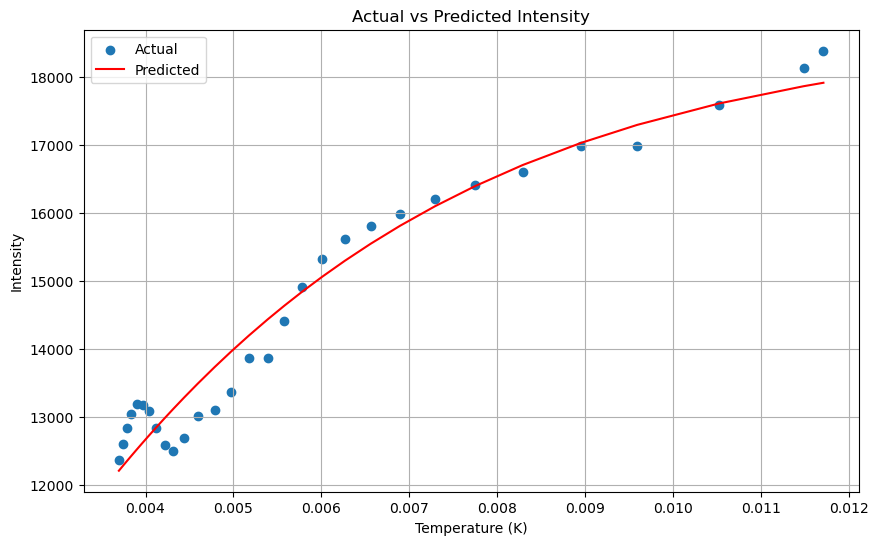

In [35]:
import matplotlib.pyplot as plt


# Assuming df contains 'T(K)' and 'B2' columns
df_ = pd.read_excel('Integral_Intensity_all_Temp.xlsx')

#def equation(T, A, B, E_a, m):
#    return 18688/(1+A*np.exp(-E_a/(8.617e-5*T))+B*(np.exp(290/T)-1)**(-m))

#def equation(T, A, B, E_a, m):
#    return 18385/(1+A*np.exp(-11605*E_a*T)+B*(np.exp(290*T)-1)**(-m))

def equation(T, I_0, dE, A, B, E_a, m):
    return (18385+I_0*np.exp(-dE*8,617e-5*T))/(1+A*np.exp(-11605*E_a*T)+B*(np.exp(290*T)-1)**(-m))

# Best parameters
#est_params = [-5.3676773581561275, 0.9298182941457029, 0.12178630009087679, 0.9159484612949389]
best_params = [0.5814433090401498, -0.8124160137353569, 0.7754386217081881, 0.5958047686141591, 0.033370983965025525, 0.8068879805672972]
#[2.015997420786423, 0.9889490666134972, 2.6994785131549697, 0.9307318956880416]

# Predicted values
y_pred = equation(1/df_['Temp'], *best_params)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(1/df_['Temp'], df_['S'], label='Actual')
plt.plot(1/df_['Temp'], y_pred, color='red', label='Predicted')
plt.xlabel('Temperature (K)')
plt.ylabel('Intensity')
plt.title('Actual vs Predicted Intensity')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
df_['Temp']

0      85.10424
1      85.13006
2      85.19346
3      85.24509
4      85.37417
5      87.05566
6      95.03533
7     104.23260
8     111.68950
9     120.60090
10    129.00950
11    137.11650
12    144.98190
13    152.41220
14    159.55140
15    166.34750
16    172.95540
17    179.27650
18    185.53710
19    193.26520
20    200.95260
21    208.94840
22    217.73760
23    225.25310
24    231.60600
25    237.20110
26    242.56990
27    247.56140
28    252.17990
29    256.56870
30    260.52380
31    264.12170
32    267.46210
33    270.52850
Name: Temp, dtype: float64